
# Graduação

**Importante!** Este notebook foi desenvolvido como parte de um projeto de iniciação científica em 2024. Devido à natureza sensível dos dados contidos nos dataframes utilizados para as análises, optamos por omiti-los. Assim, o notebook não é executável e tem como finalidade exclusivamente a apresentação dos resultados.

---



# Configurações

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Instalações

In [ ]:
!pip install plot-likert

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core import display as ICD
from tabulate import tabulate
import matplotlib as mp
import plot_likert
from scipy.stats import chi2_contingency
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [ ]:
cores =[
    plot_likert.colors.TRANSPARENT,
    #"salmon",
    'red',"lightgray", 'blue', #"cornflowerblue",
    'slategray']

sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

## Funções

In [ ]:
def qui_quadrado(var1, var2):

  chi = pd.crosstab(var1, var2) # tabela de contingência
  chi_scores = chi2_contingency(chi) # cálculo de qui-quadrado

  scores = pd.Series(chi_scores[0]) # valor da estatística
  pvalues = pd.Series(chi_scores[1]) # p-valor

  # Criar dataframe com resultado
  d = {'Qui2': scores, 'p-Valor': pvalues}
  chi_squared = pd.DataFrame(d)

  # Renomear
  d = {0: var2.name}
  chi_squared = chi_squared.rename(d)

  return chi_squared

In [ ]:
def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1] // 2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index] / 2

    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-0.9, 0.9)  # Ajuste o mínimo e o máximo conforme necessário
    ax.set_xticks(np.arange(-0.9, 1, 0.1))  # Ajuste o espaçamento conforme necessário
    ax.xaxis.set_major_formatter(lambda x,  pos: '{:.0f}%'.format(abs(x) * 100))

    # Y Axis
    ax.invert_yaxis()

    # Legend
    legenda = plt.legend(title='Impacto da USP na Saúde Mental', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)

    # Ajuste a posição da legenda
    plt.subplots_adjust(bottom=0.2)

    # Título
    #ax.set_title('')

    return fig, ax


## Dados graduação

In [ ]:
dicionario = {'Mulher cis (pessoa que nasceu com sexo feminino e se identifica com o gênero feminino)': 'Gênero Feminino',
              'Homem cis (pessoa que nasceu com sexo masculino e se identifica com o gênero masculino)': 'Gênero Masculino',
              'Homem trans (pessoa que nasceu com características sexuais femininas e se identifica com o gênero masculino)': 'Gênero Masculino',
              'Mulher trans (pessoa que nasceu com características sexuais masculinas e se identifica com o gênero feminino)': 'Gênero Feminino'}

generos_desejados = ['Gênero Feminino', 'Gênero Masculino']

df_graduacao['Qual é sua identidade de gênero?'].replace(dicionario, inplace=True)

# Filtrar DataFrame
df_graduacao = df_graduacao[df_graduacao['Qual é sua identidade de gênero?'].isin(generos_desejados)]


# Análises Cruzadas mantendo a variável Impacto na saúde mental fixa

## Análise 1: Saúde mental vs Vivências hostis/discriminatórias

In [ ]:
ordem_smental = ['A USP mais prejudica do que beneficia a minha saúde mental',
                   'A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau',
                   'A USP mais beneficia do que prejudica a minha saúde mental']

ordem_bolsas = ['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não']

In [ ]:
ordem_exp_hostis = ['Sim, e afetou meu bem-estar e/ou minhas atividades na USP.',
       'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.', 'Não']

In [ ]:
# sem normalizar
tab_exphostis_grad1 = pd.crosstab(df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_exphostis_grad1 = tab_exphostis_grad1.reindex(index=ordem_exp_hostis, columns = ordem_smental)

tab_exphostis_grad1


Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você já experimentou pessoalmente algum tipo de...                                                                                                               
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                                369            
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                                167            
Não                                                                                                                                               639            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você já experimentou pessoalmente algum tipo de...                                                                                                                                                                        
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                                116                                                                     
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                                113                                                                     
Não                                                                                                                                               787                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você já experimentou pessoalmente algum tipo de...                                                                                                              
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                                 56           
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                                 53           
Não                                                                                                                                               413

### Mosaic Plot


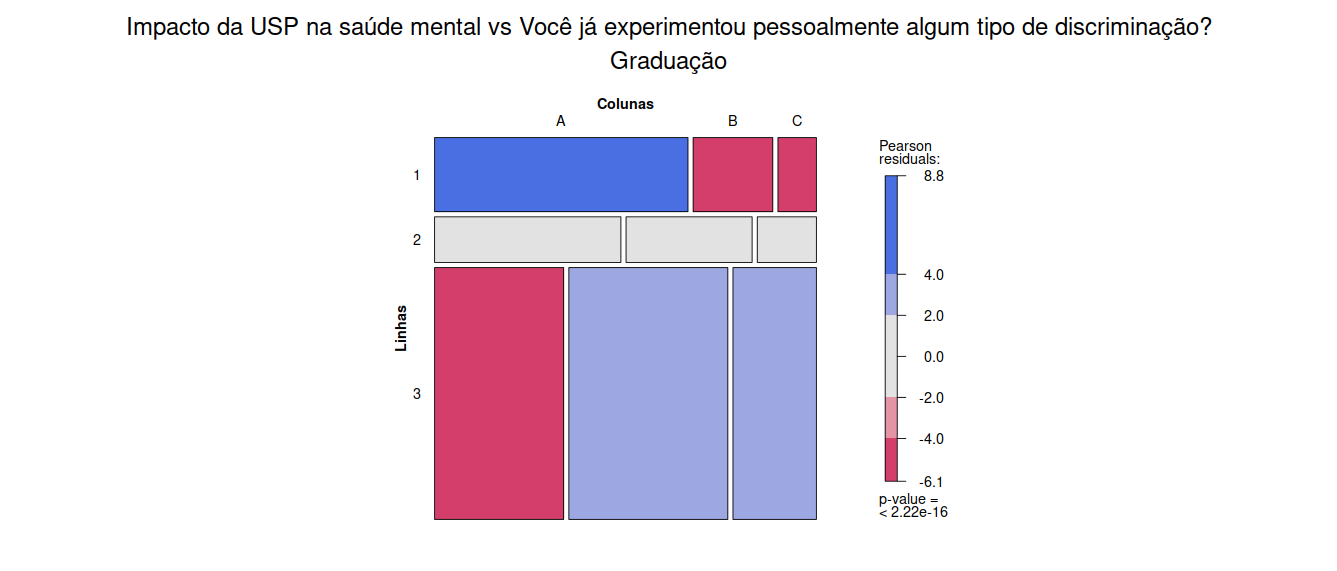

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental



In [ ]:
# normalizada
tab_exphostis_grad = pd.crosstab(df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_exphostis_grad = tab_exphostis_grad.astype(float)
tab_exphostis_grad = tab_exphostis_grad.reindex(index=ordem_exp_hostis, columns = ordem_smental)

tab_exphostis_grad


Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você já experimentou pessoalmente algum tipo de...                                                                                                               
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.674589            
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.492625            
Não                                                                                                                                          0.339894            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você já experimentou pessoalmente algum tipo de...                                                                                                                                                                        
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.212066                                                                     
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.333333                                                                     
Não                                                                                                                                          0.418617                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você já experimentou pessoalmente algum tipo de...                                                                                                              
Sim, e afetou meu bem-estar e/ou minhas ativida...                                                                                           0.102377           
Sim, mas não afetou meu bem-estar ou minhas ati...                                                                                           0.156342           
Não                                                                                                                                          0.219681

### Plot likert

/tmp/ipykernel_12033/3963900090.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',


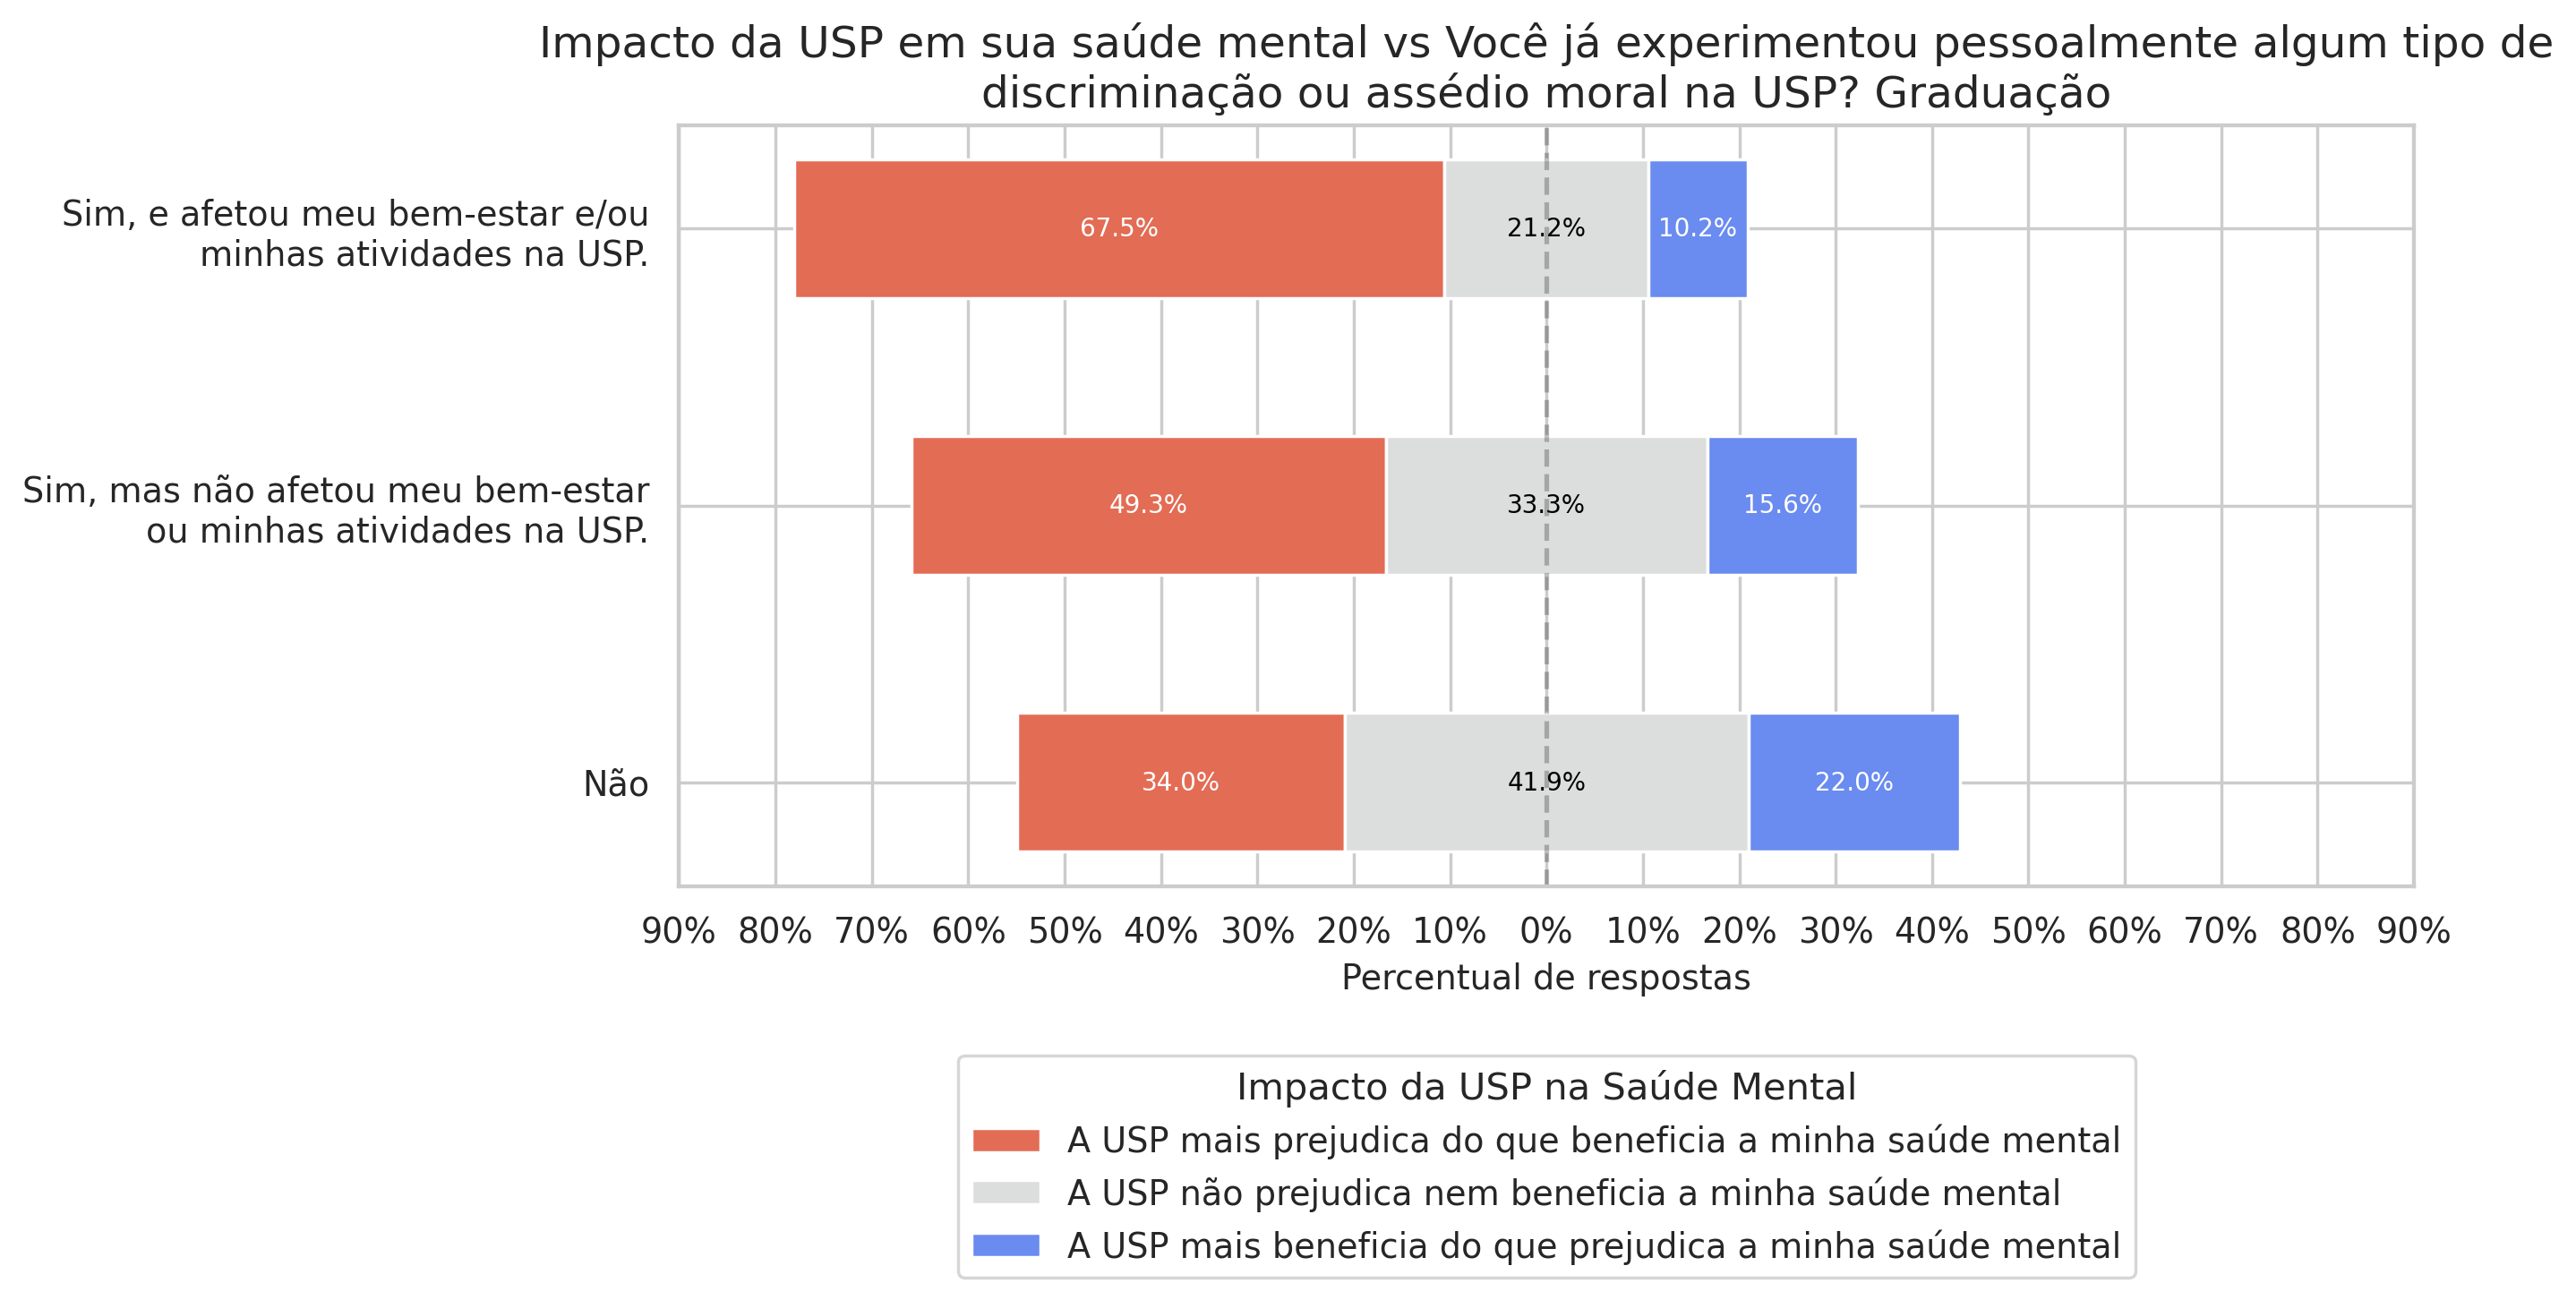

In [ ]:
df = tab_exphostis_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim, e afetou meu bem-estar e/ou minhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['White']+['Black']+['White']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Você já experimentou pessoalmente algum tipo de\ndiscriminação ou assédio moral na USP? Graduação', fontsize=14)

ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar\nou minhas atividades na USP.','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'])

Qui2       p-Valor
Você já experimentou pessoalmente algum tipo de...  219.066775  3.288471e-42

## Análise 2: Saúde mental vs Recorrência das vivências hostis/discriminatórias

In [ ]:
ordem_recorrencia = ['Mais de dez vezes',
                      'Entre cinco e dez vezes',
                      'Entre duas e quatro vezes',
                      'Uma única vez']

In [ ]:
tab_recorrencia_exphostis_grad1 = pd.crosstab(df_graduacao['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_recorrencia_exphostis_grad1 = tab_recorrencia_exphostis_grad1.reindex(index=ordem_recorrencia, columns = ordem_smental)

tab_recorrencia_exphostis_grad1


Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                               
Mais de dez vezes                                                                                                                                 102            
Entre cinco e dez vezes                                                                                                                           100            
Entre duas e quatro vezes                                                                                                                         215            
Uma única vez                                                                                                                                      89            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                                                                                        
Mais de dez vezes                                                                                                                                  29                                                                     
Entre cinco e dez vezes                                                                                                                            38                                                                     
Entre duas e quatro vezes                                                                                                                         109                                                                     
Uma única vez                                                                                                                                      53                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Quantas vezes ocorreram situações desse tipo, d...                                                                                                              
Mais de dez vezes                                                                                                                                   6           
Entre cinco e dez vezes                                                                                                                            17           
Entre duas e quatro vezes                                                                                                                          60           
Uma única vez                                                                                                                                      22

### Mosaic Plot

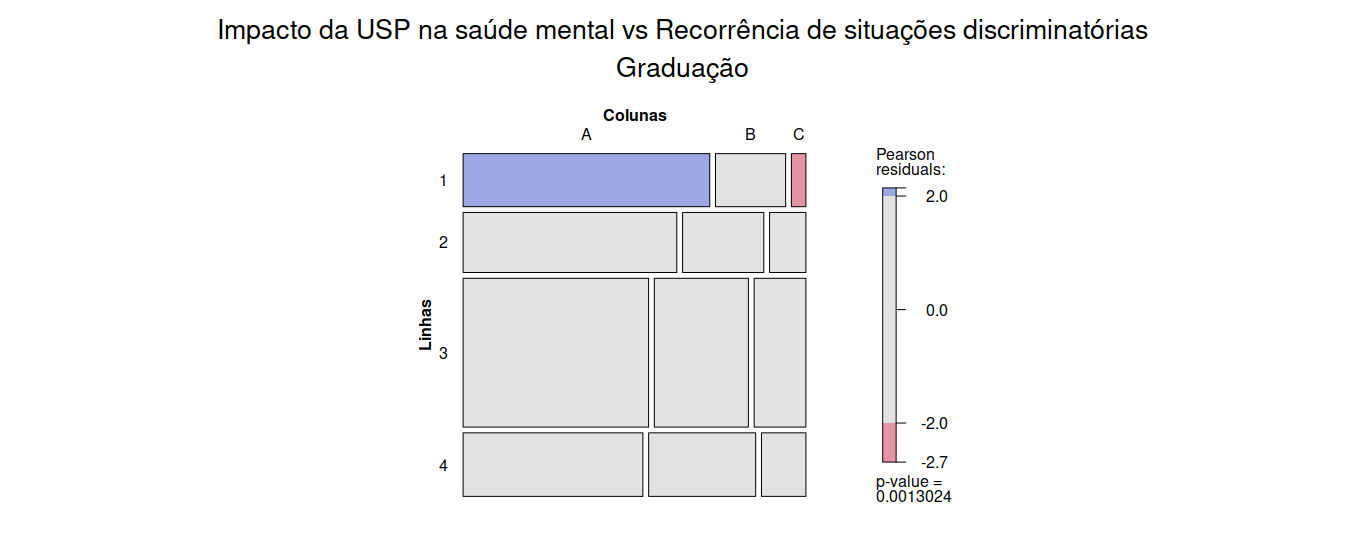

**Linhas** | **Colunas**
---|---|
1: Mais de dez vezes | A: A USP mais prejudica do que beneficia a minha saúde mental
2: Entre cinco e dez vezes | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Entre duas e quatro vezes | C: A USP mais beneficia do que prejudica a minha saúde mental
4: Uma única vez |


In [ ]:
# normalizada
tab_recorrencia_exphostis_grad = pd.crosstab(df_graduacao['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_recorrencia_exphostis_grad = tab_recorrencia_exphostis_grad.astype(float)
tab_recorrencia_exphostis_grad = tab_recorrencia_exphostis_grad.reindex(index=ordem_recorrencia, columns = ordem_smental)

tab_recorrencia_exphostis_grad


Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                               
Mais de dez vezes                                                                                                                            0.744526            
Entre cinco e dez vezes                                                                                                                      0.645161            
Entre duas e quatro vezes                                                                                                                    0.554124            
Uma única vez                                                                                                                                0.536145            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Quantas vezes ocorreram situações desse tipo, d...                                                                                                                                                                        
Mais de dez vezes                                                                                                                            0.211679                                                                     
Entre cinco e dez vezes                                                                                                                      0.245161                                                                     
Entre duas e quatro vezes                                                                                                                    0.280928                                                                     
Uma única vez                                                                                                                                0.319277                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Quantas vezes ocorreram situações desse tipo, d...                                                                                                              
Mais de dez vezes                                                                                                                            0.043796           
Entre cinco e dez vezes                                                                                                                      0.109677           
Entre duas e quatro vezes                                                                                                                    0.154639           
Uma única vez                                                                                                                                0.132530

### Plot likert

/tmp/ipykernel_12033/3280060859.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Mais de dez vezes',


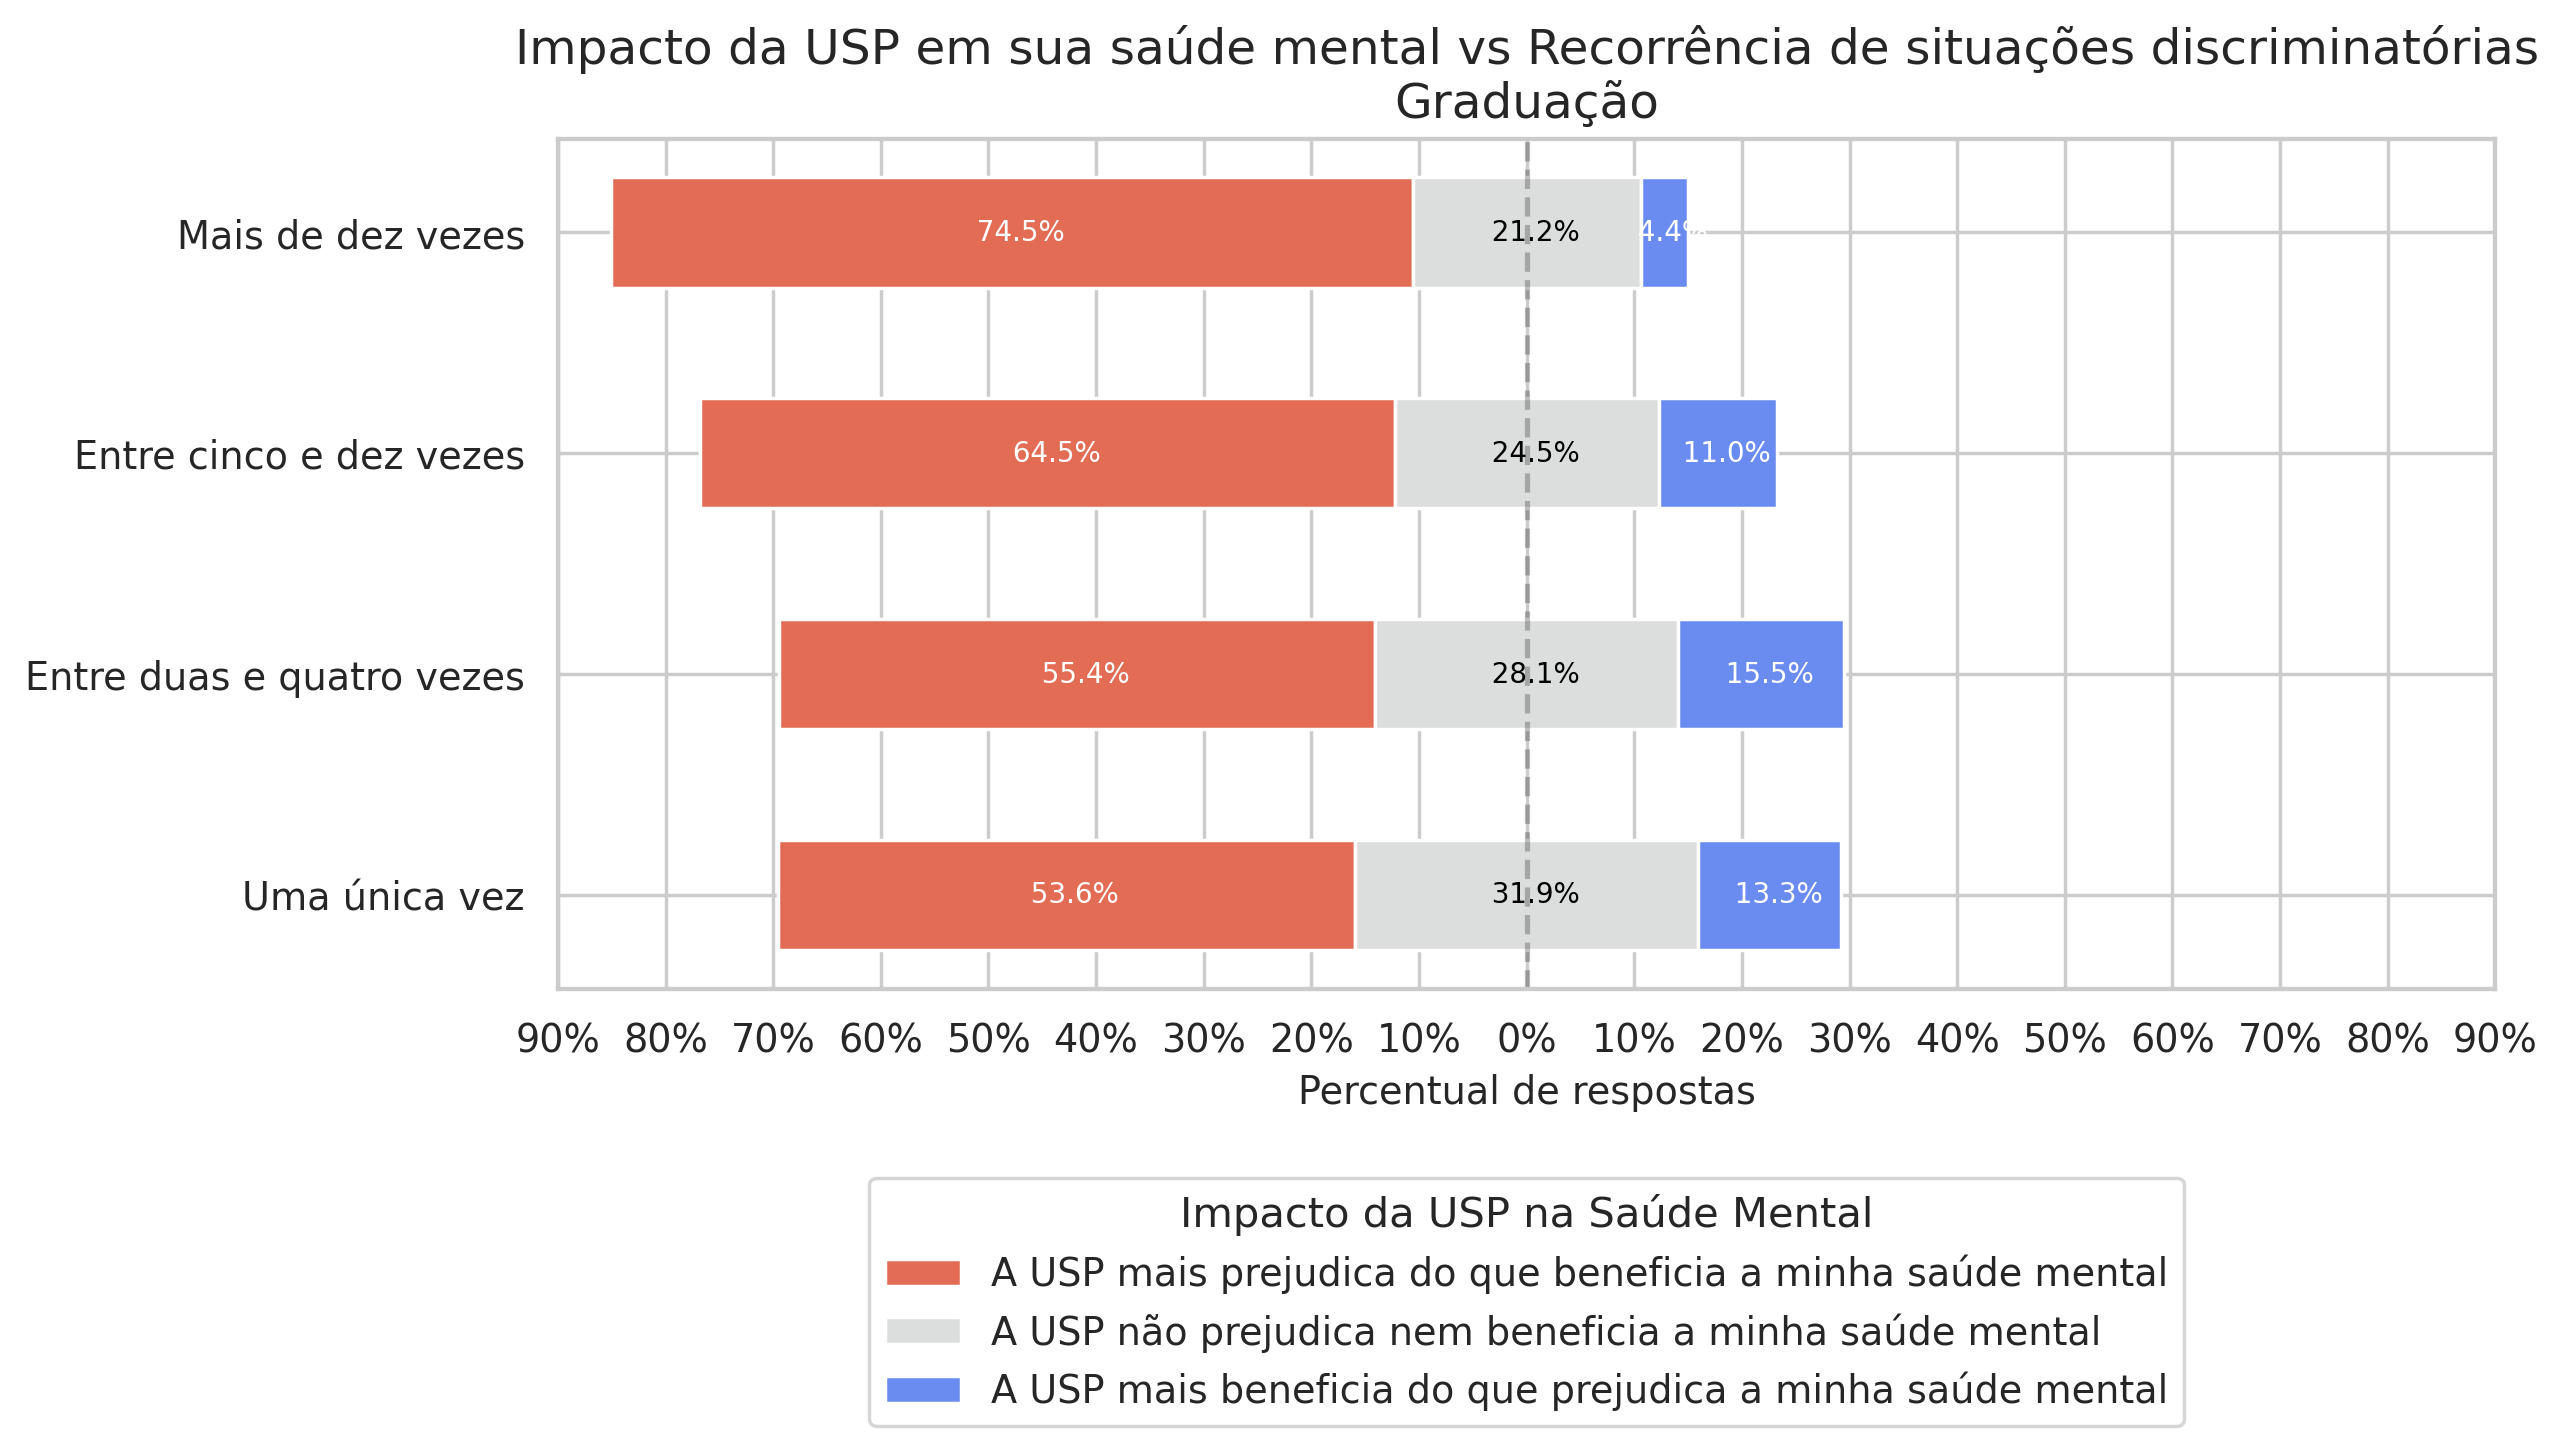

In [ ]:
df = tab_recorrencia_exphostis_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Mais de dez vezes',
 'Entre cinco e dez vezes',
 'Entre duas e quatro vezes',
 'Uma única vez'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)


for bars, color in zip(ax.containers[:],['White']+['Black']+['White']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"  {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Recorrência de situações discriminatórias\nGraduação', fontsize=14)

ax.set_yticklabels(['Mais de dez vezes',
 'Entre cinco e dez vezes',
 'Entre duas e quatro vezes',
 'Uma única vez'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_graduacao['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'])

Qui2       p-Valor
Quantas vezes ocorreram situações desse tipo, d...  230.984102  1.004199e-40

## Análise 3: Saúde mental vs Hostilidade dos ambientes

In [ ]:
tab_ambiente_grad1 = pd.crosstab(df_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_ambiente_grad1 = tab_ambiente_grad1.reindex(index=['1 Hostil','2', '3', '4', '5 Amigável'], columns=ordem_smental)

tab_ambiente_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
A partir da sua experiência dentro do campus da...                                                                                                               
1 Hostil                                                                                                                                           96            
2                                                                                                                                                 234            
3                                                                                                                                                 393            
4                                                                                                                                                 374            
5 Amigável                                                                                                                                        147            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
A partir da sua experiência dentro do campus da...                                                                                                                                                                        
1 Hostil                                                                                                                                           11                                                                     
2                                                                                                                                                  59                                                                     
3                                                                                                                                                 239                                                                     
4                                                                                                                                                 458                                                                     
5 Amigável                                                                                                                                        277                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
A partir da sua experiência dentro do campus da...                                                                                                              
1 Hostil                                                                                                                                            3           
2                                                                                                                                                  20           
3                                                                                                                                                  76           
4                                                                                                                                                 208           
5 Amigável                                                                                                                                        227

### Mosaic Plot

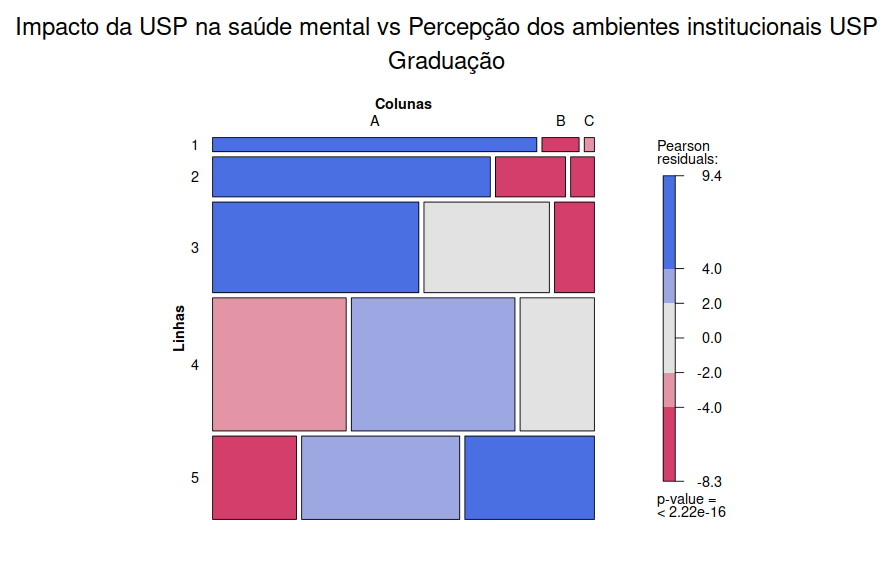

**Linhas** | **Colunas**
---|---|
1  Hostil | A: A USP mais prejudica do que beneficia a minha saúde mental
2 | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: | C: A USP mais beneficia do que prejudica a minha saúde mental
4 |
5 Amigável |


In [ ]:
# normalizado
tab_ambiente_grad = pd.crosstab(df_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_ambiente_grad = tab_ambiente_grad.astype(float)
tab_ambiente_grad = tab_ambiente_grad.reindex(index=['1 Hostil','2', '3', '4', '5 Amigável'], columns=ordem_smental)

tab_ambiente_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
A partir da sua experiência dentro do campus da...                                                                                                               
1 Hostil                                                                                                                                     0.864865            
2                                                                                                                                            0.728972            
3                                                                                                                                            0.542818            
4                                                                                                                                            0.351174            
5 Amigável                                                                                                                                   0.224427            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
A partir da sua experiência dentro do campus da...                                                                                                                                                                        
1 Hostil                                                                                                                                     0.099099                                                                     
2                                                                                                                                            0.183801                                                                     
3                                                                                                                                            0.330110                                                                     
4                                                                                                                                            0.430047                                                                     
5 Amigável                                                                                                                                   0.422901                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
A partir da sua experiência dentro do campus da...                                                                                                              
1 Hostil                                                                                                                                     0.027027           
2                                                                                                                                            0.062305           
3                                                                                                                                            0.104972           
4                                                                                                                                            0.195305           
5 Amigável                                                                                                                                   0.346565

### Plot

/tmp/ipykernel_12033/1398068017.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['1 Hostil','2', '3', '4', '5 Amigável'])


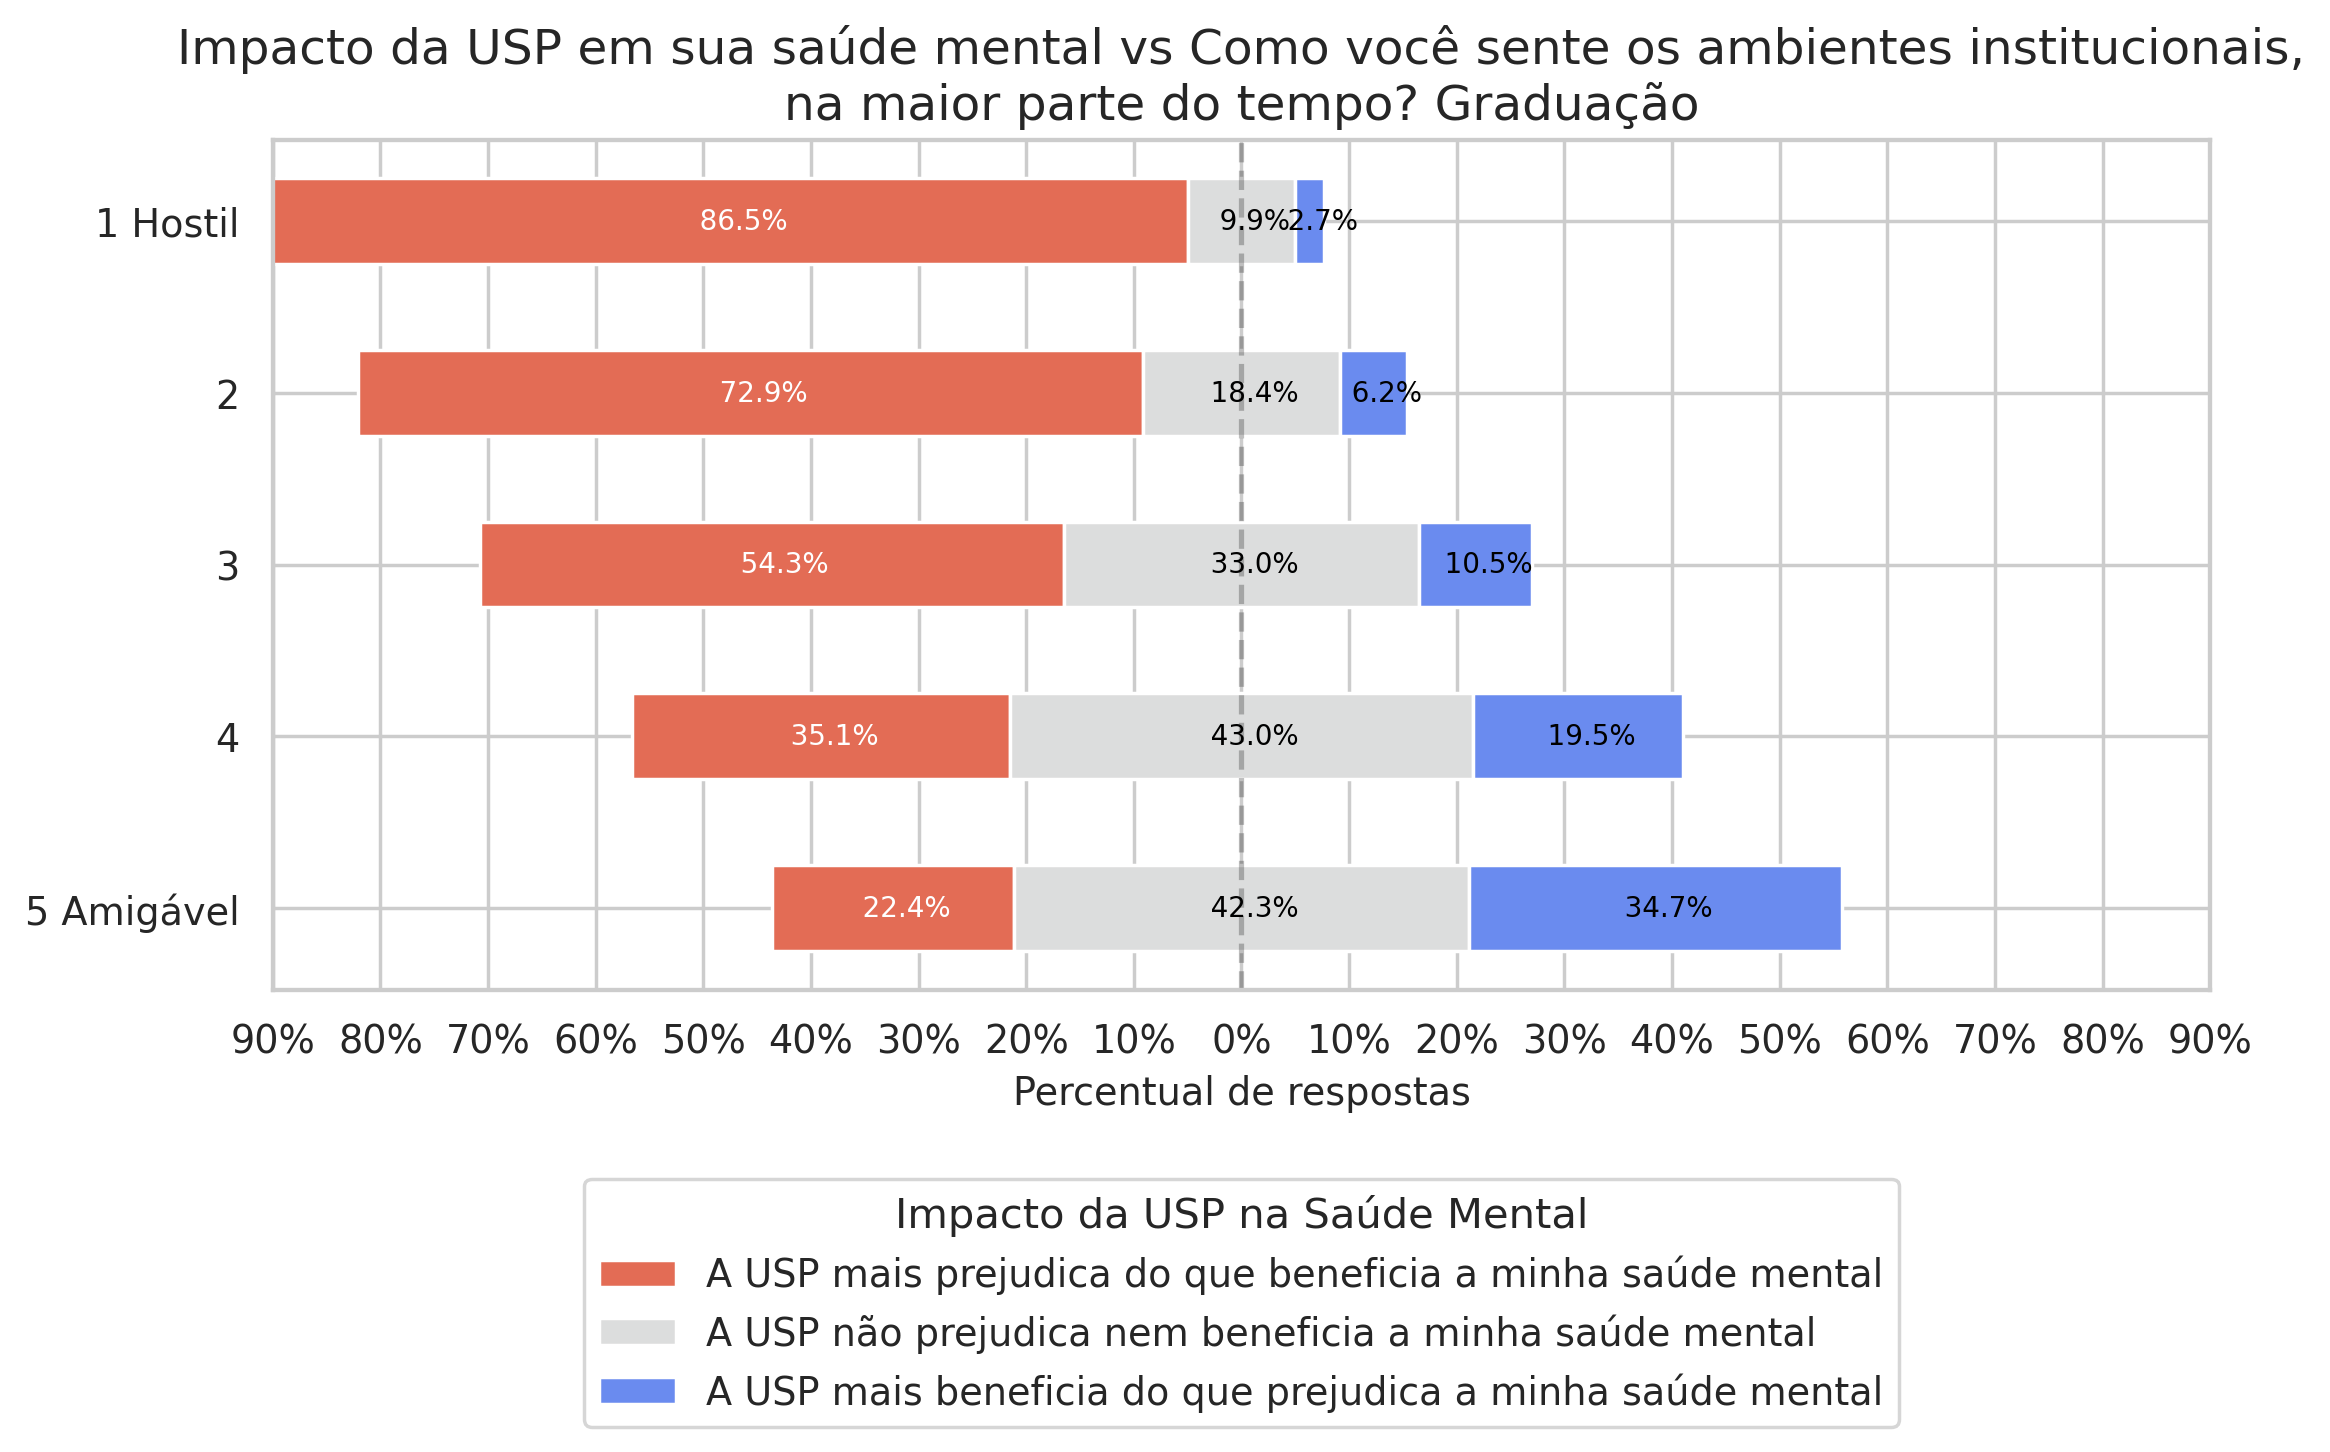

In [ ]:
df = tab_ambiente_grad .copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['1 Hostil','2', '3', '4', '5 Amigável'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['White']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Como você sente os ambientes institucionais,\nna maior parte do tempo? Graduação', fontsize=14)

ax.set_yticklabels(['1 Hostil','2', '3', '4', '5 Amigável'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

## Análise 4. Saúde mental vs Recebeu ou recebe bolsa de pesquisa (graduação)

In [ ]:
ordem_bolsas = ['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não']

In [ ]:
tab_bolsa_grad1 = pd.crosstab(df_graduacao['Recebeu ou recebe bolsa de pesquisa?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_bolsa_grad1 = tab_bolsa_grad1.reindex(index=ordem_bolsas, columns=ordem_smental)

tab_bolsa_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                             
Solicitei e não fui contemplado(a)                                                                                                                 83            
Solicitei e fui contemplado(a)                                                                                                                    394            
Não                                                                                                                                               767            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                                                                                      
Solicitei e não fui contemplado(a)                                                                                                                 66                                                                     
Solicitei e fui contemplado(a)                                                                                                                    276                                                                     
Não                                                                                                                                               702                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Recebeu ou recebe bolsa de pesquisa?                                                                                                                            
Solicitei e não fui contemplado(a)                                                                                                                 12           
Solicitei e fui contemplado(a)                                                                                                                    119           
Não                                                                                                                                               403

### Mosaic Plot

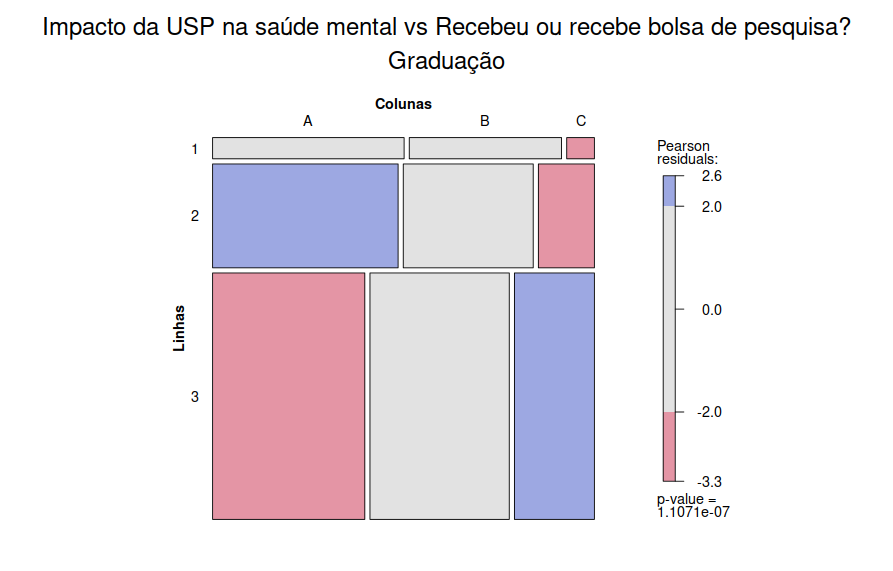

**Linhas** | **Colunas**
---|---|
1: Solicitei e não fui contemplado(a) | A: A USP mais prejudica do que beneficia a minha saúde mental
2: Solicitei e fui contemplado(a) | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

    

In [ ]:
# normalizado
tab_bolsa_grad = pd.crosstab(df_graduacao['Recebeu ou recebe bolsa de pesquisa?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')

tab_bolsa_grad  = tab_bolsa_grad.astype(float)
tab_bolsa_grad = tab_bolsa_grad.reindex(index=ordem_bolsas, columns=ordem_smental)

tab_bolsa_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                             
Solicitei e não fui contemplado(a)                                                                                                           0.512346            
Solicitei e fui contemplado(a)                                                                                                               0.490050            
Não                                                                                                                                          0.401571            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Recebeu ou recebe bolsa de pesquisa?                                                                                                                                                                                      
Solicitei e não fui contemplado(a)                                                                                                           0.407407                                                                     
Solicitei e fui contemplado(a)                                                                                                               0.343284                                                                     
Não                                                                                                                                          0.367539                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Recebeu ou recebe bolsa de pesquisa?                                                                                                                            
Solicitei e não fui contemplado(a)                                                                                                           0.074074           
Solicitei e fui contemplado(a)                                                                                                               0.148010           
Não                                                                                                                                          0.210995

### Plot

/tmp/ipykernel_12033/1676653391.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])


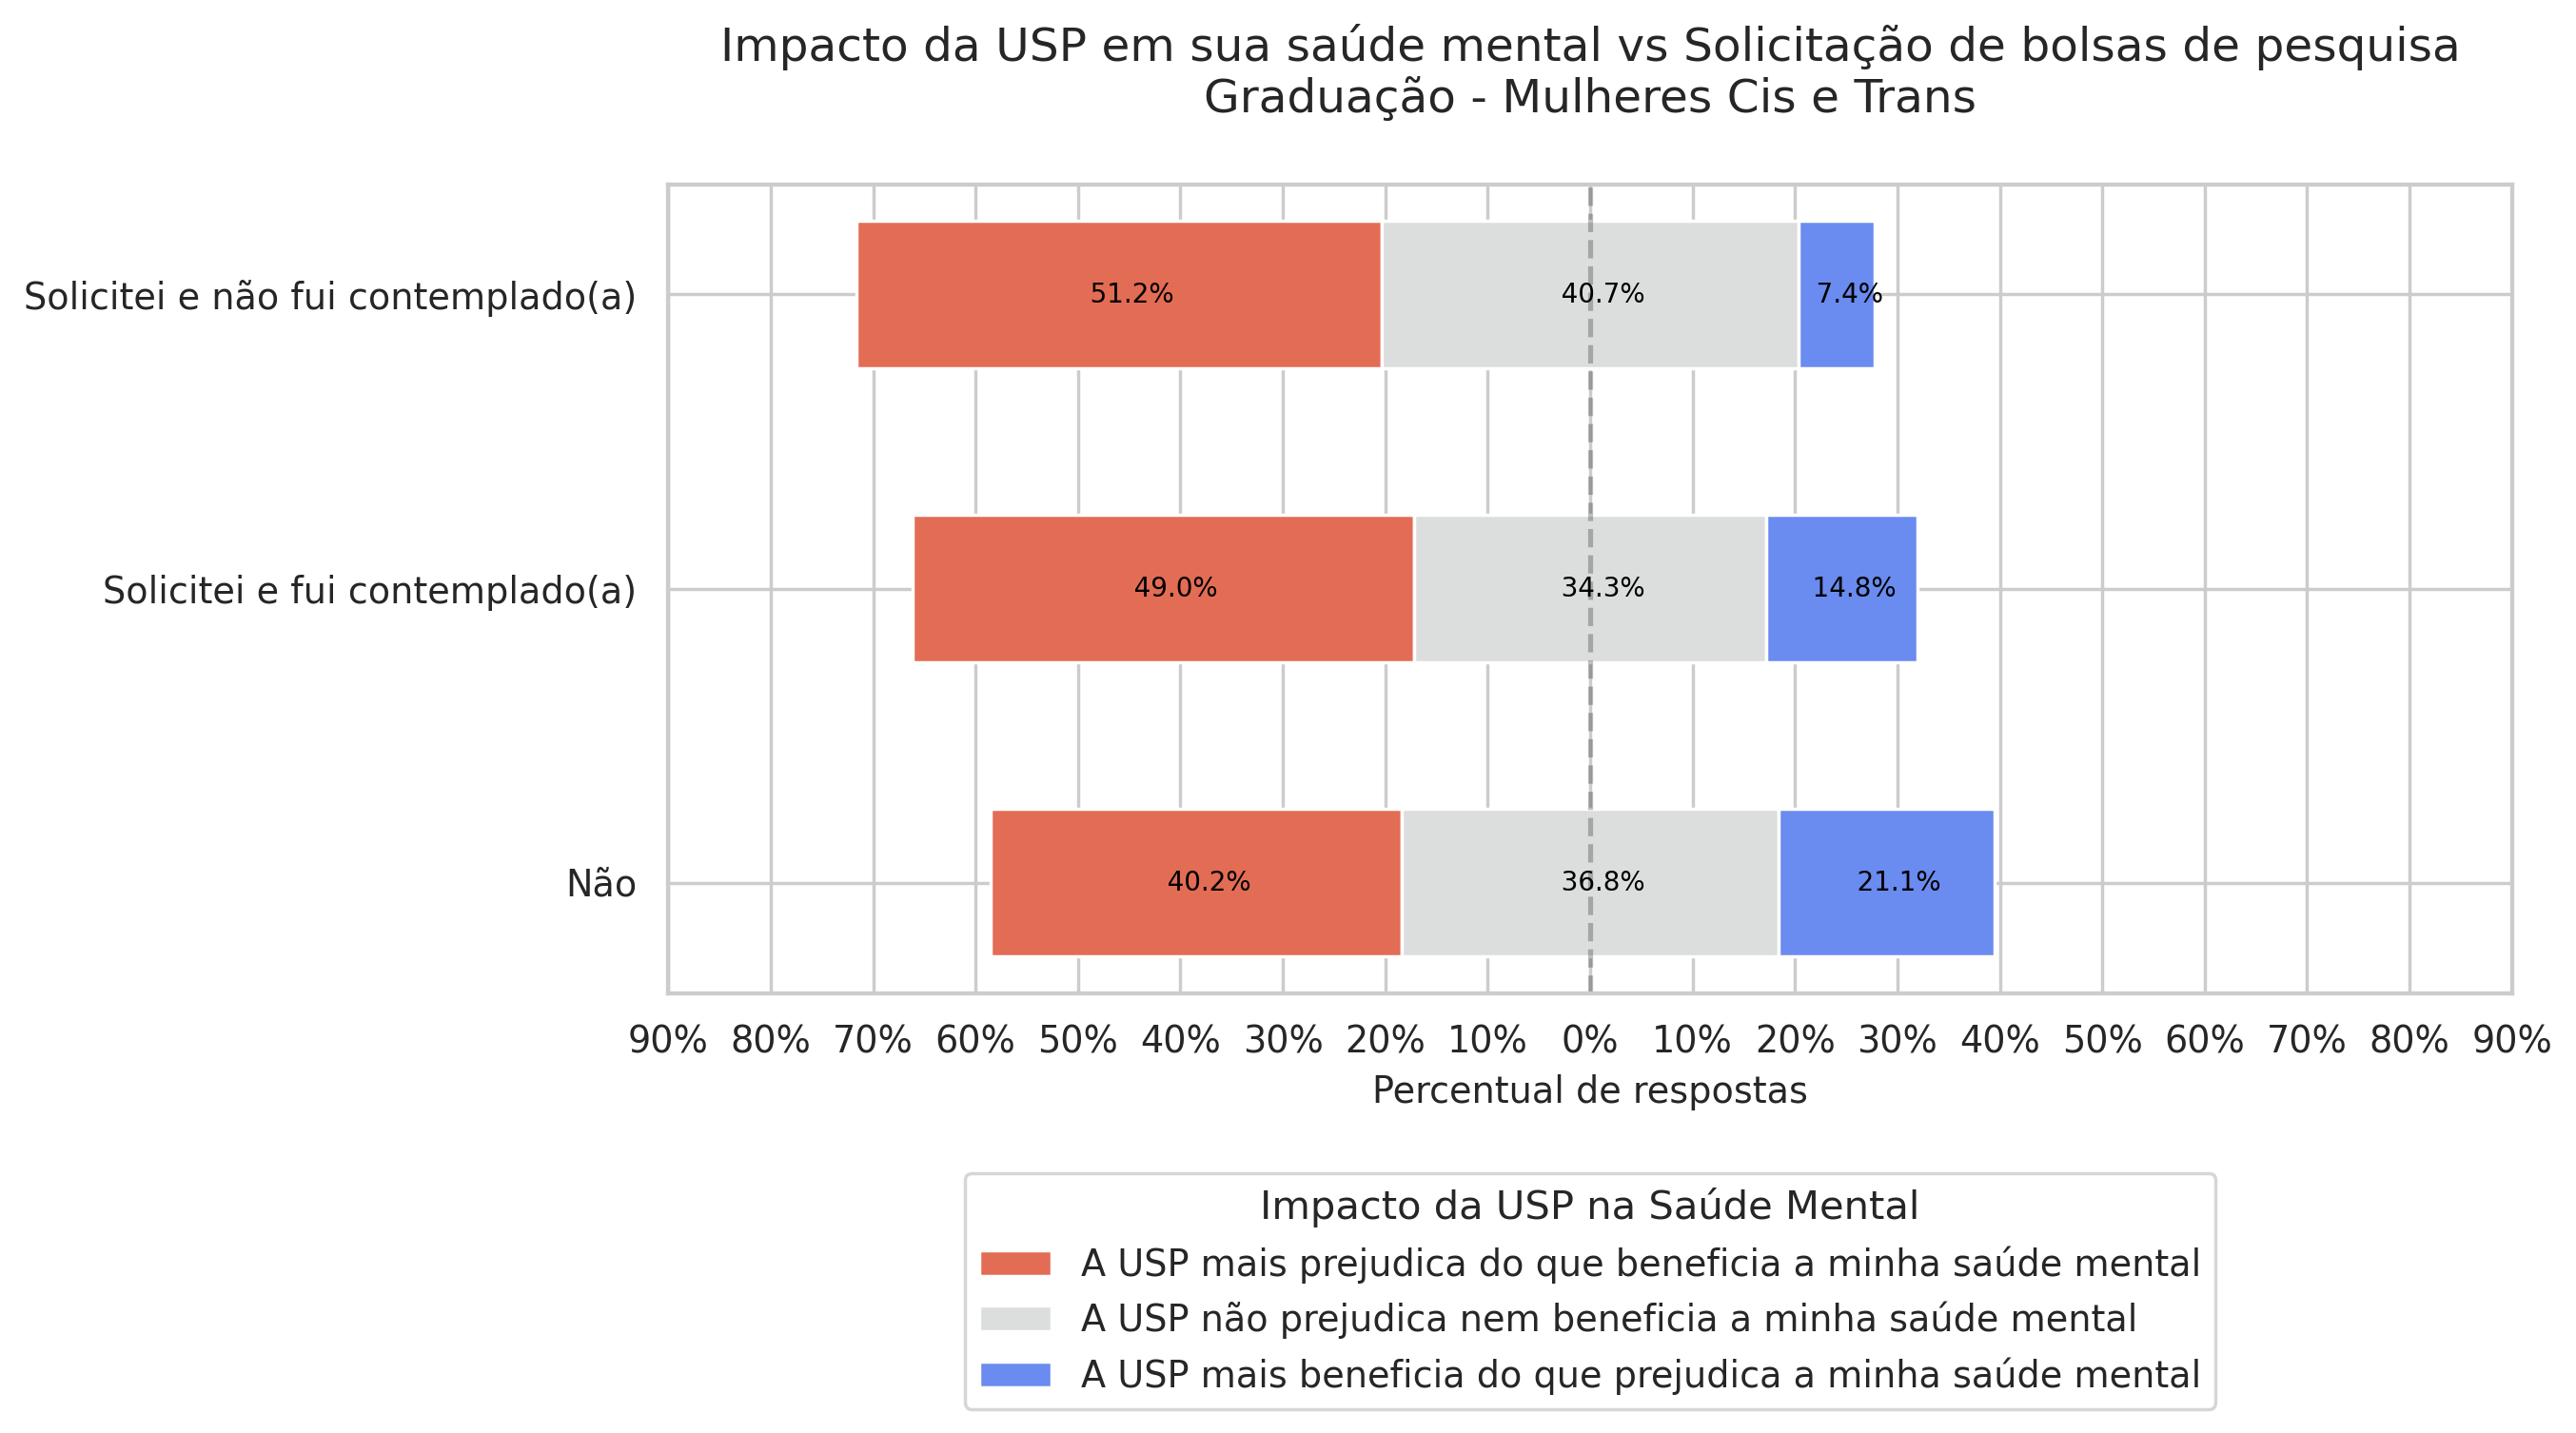

In [ ]:
df = tab_bolsa_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Solicitação de bolsas de pesquisa\nGraduação - Mulheres Cis e Trans\n', fontsize=14)

ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_graduacao['Recebeu ou recebe bolsa de pesquisa?'])

Qui2       p-Valor
Recebeu ou recebe bolsa de pesquisa?  39.720578  5.168846e-07

## Análise 5. Em algum momento você pensou em deixar a USP? VS Percepção de saúde mental (graduação)

In [ ]:
ordem_evasao = ['Sim', 'Não', 'Prefiro não responder']

In [ ]:
tab_evasao_grad1 = pd.crosstab(df_graduacao['Em algum momento você pensou em deixar a USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_evasao_grad1 = tab_evasao_grad1.reindex(index=['Sim', 'Não'], columns=ordem_smental)

tab_evasao_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Em algum momento você pensou em deixar a USP?                                                                                                                    
Sim                                                                                                                                               856            
Não                                                                                                                                               361            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Em algum momento você pensou em deixar a USP?                                                                                                                                                                             
Sim                                                                                                                                               395                                                                     
Não                                                                                                                                               623                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Em algum momento você pensou em deixar a USP?                                                                                                                   
Sim                                                                                                                                               143           
Não                                                                                                                                               383

### Mosaic plot

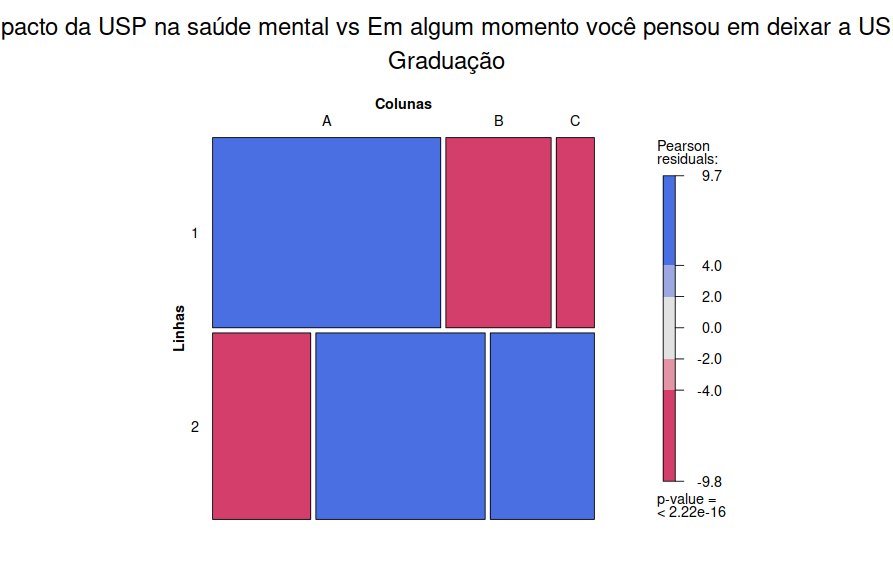

**Linhas** | **Colunas**
---|---|
1: Sim | A: A USP mais prejudica do que beneficia a minha saúde mental
2: Não | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
 | C: A USP mais beneficia do que prejudica a minha saúde mental



In [ ]:
# normalizado
tab_evasao_grad = pd.crosstab(df_graduacao['Em algum momento você pensou em deixar a USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_evasao_grad = tab_evasao_grad.astype(float)
tab_evasao_grad = tab_evasao_grad.reindex(index=['Sim', 'Não'], columns=ordem_smental)

tab_evasao_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Em algum momento você pensou em deixar a USP?                                                                                                                    
Sim                                                                                                                                          0.601969            
Não                                                                                                                                          0.259712            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Em algum momento você pensou em deixar a USP?                                                                                                                                                                             
Sim                                                                                                                                          0.277778                                                                     
Não                                                                                                                                          0.448201                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Em algum momento você pensou em deixar a USP?                                                                                                                   
Sim                                                                                                                                          0.100563           
Não                                                                                                                                          0.275540

### Plot

/tmp/ipykernel_12033/2336415162.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim', 'Não'])


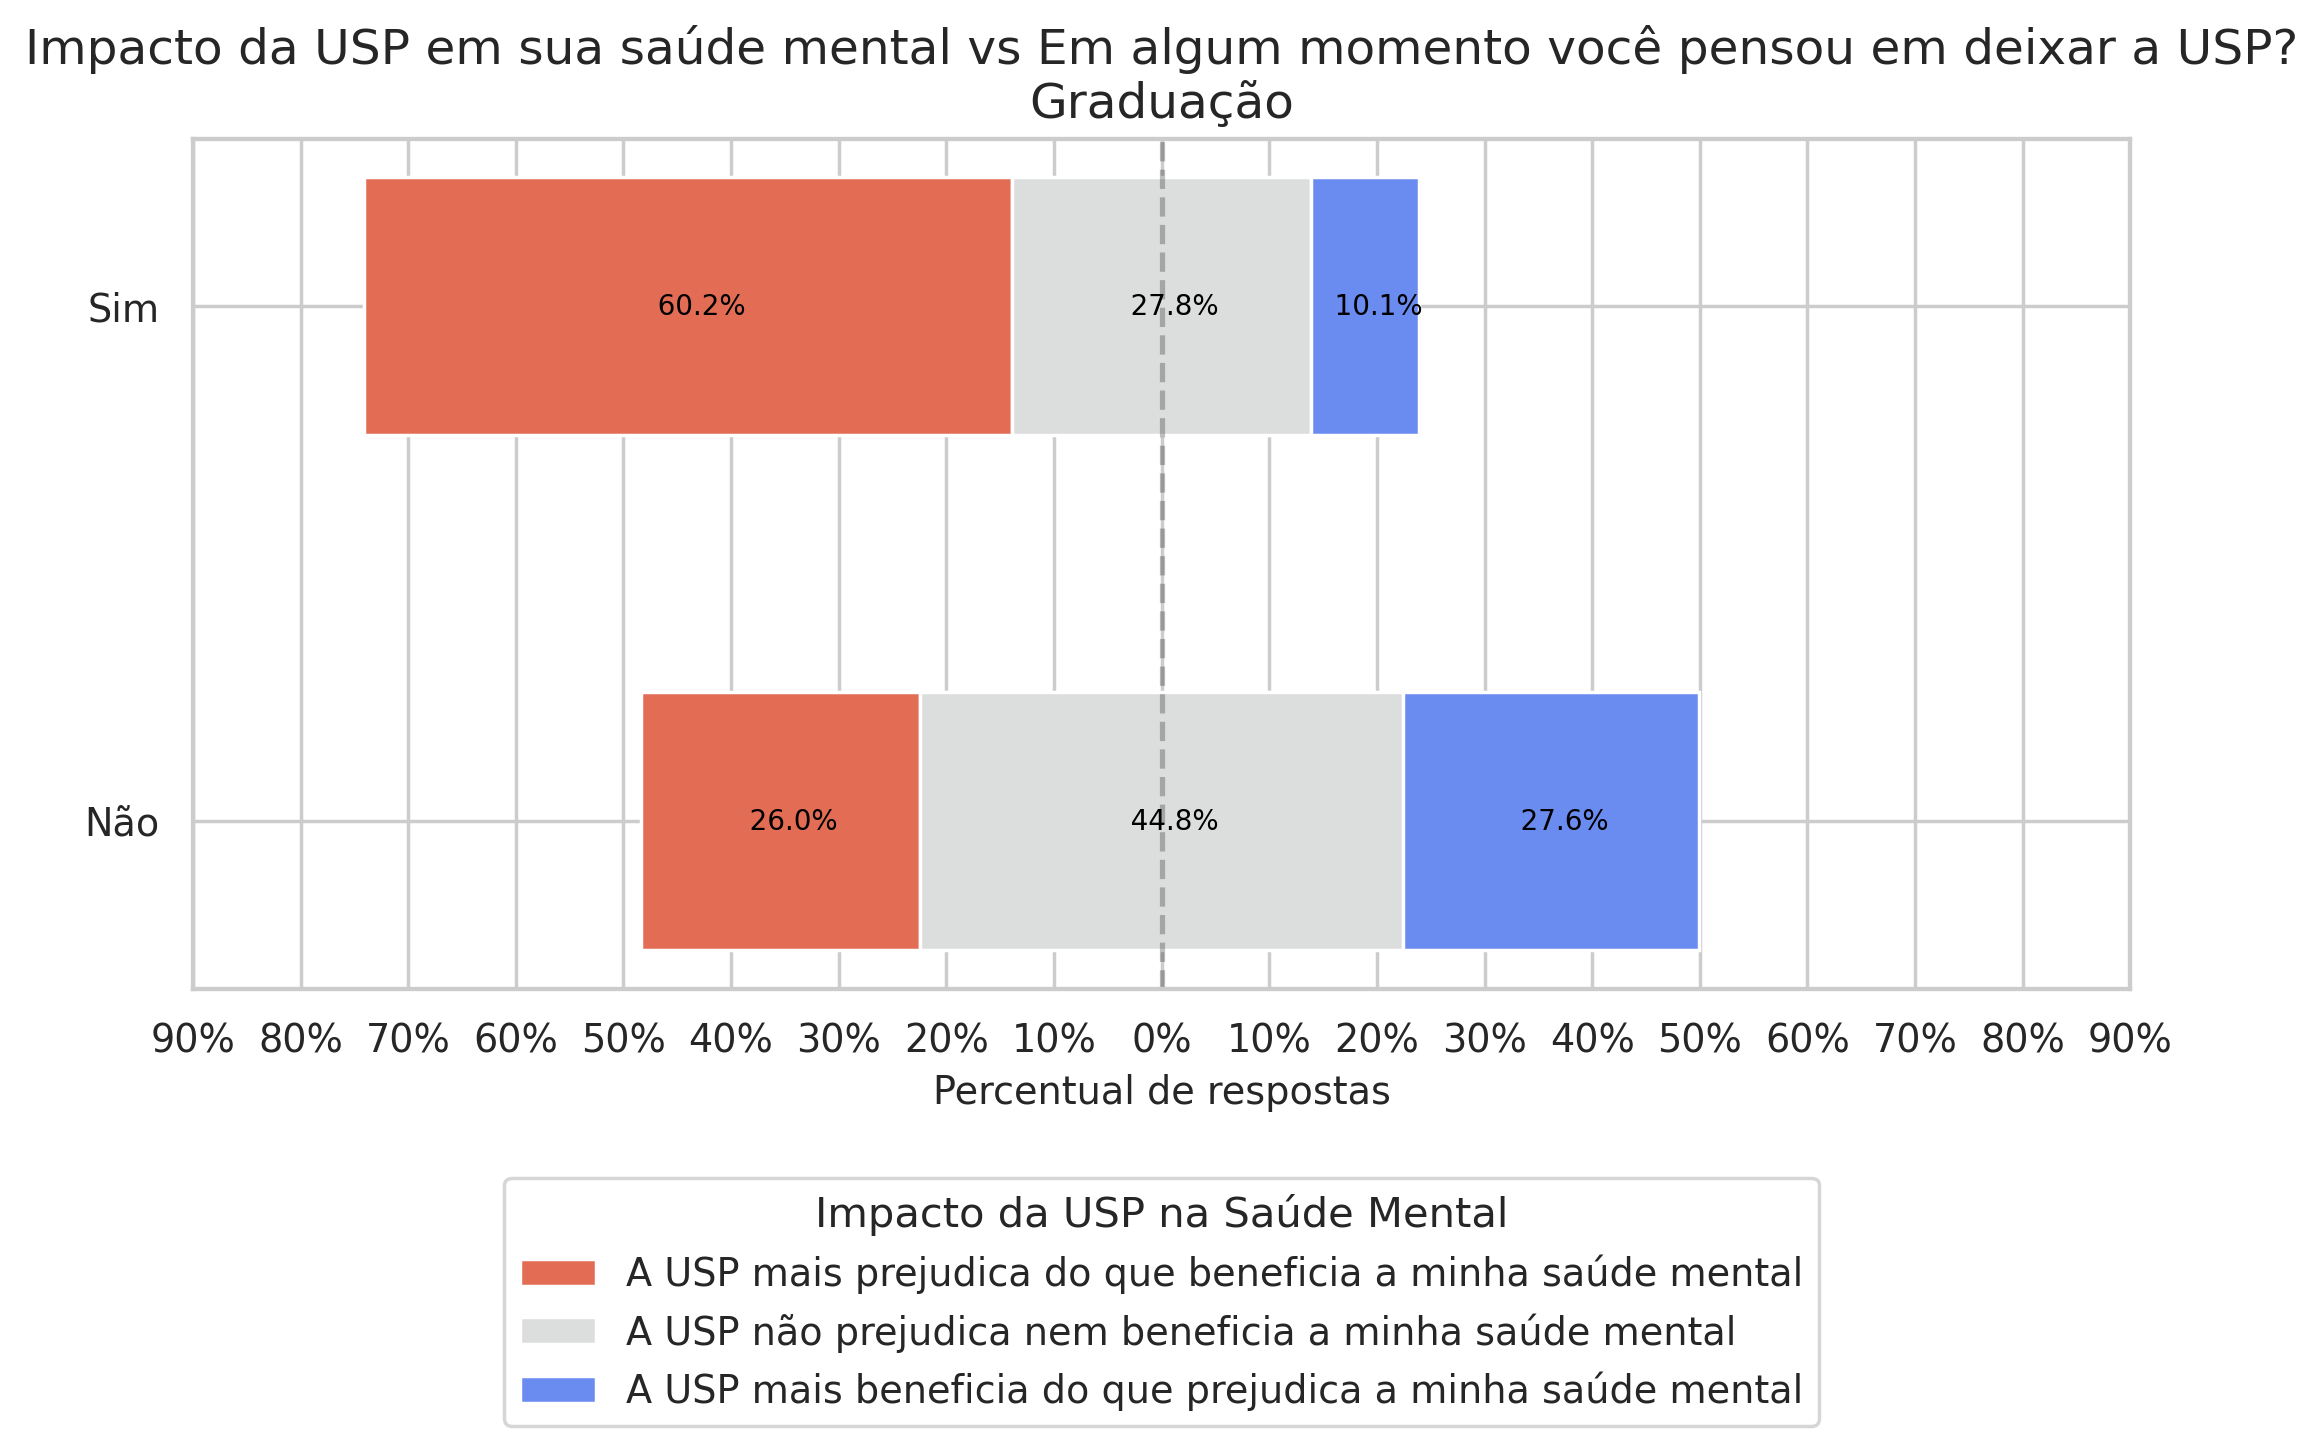

In [ ]:
df = tab_evasao_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Sim', 'Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)
ax.set_title('Impacto da USP em sua saúde mental vs Em algum momento você pensou em deixar a USP?\nGraduação', fontsize=14)

ax.set_yticklabels(['Sim', 'Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Em algum momento você pensou em deixar a USP?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2       p-Valor
Considerando o impacto da USP em sua saúde ment...  367.280043  3.004598e-76

## Análise 06. Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)? vs Saúde mental (graduação)\


In [ ]:
tab_papfe_grad1 = pd.crosstab(df_graduacao['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_papfe_grad1 = tab_papfe_grad1.reindex(index=['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'], columns=ordem_smental)

tab_papfe_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                               
Sim, e fui contemplado                                                                                                                            567            
Sim, mas não fui contemplado                                                                                                                       84            
Não                                                                                                                                               593            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                                                                                        
Sim, e fui contemplado                                                                                                                            352                                                                     
Sim, mas não fui contemplado                                                                                                                       71                                                                     
Não                                                                                                                                               621                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Nos últimos dois anos, você se inscreveu para a...                                                                                                              
Sim, e fui contemplado                                                                                                                            133           
Sim, mas não fui contemplado                                                                                                                       32           
Não                                                                                                                                               369

### Mosaic plot

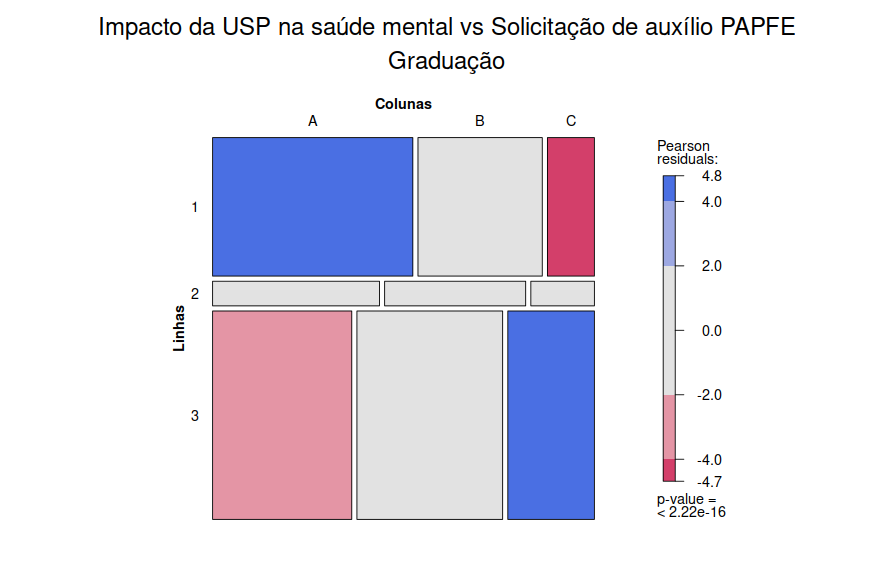

**Linhas** | **Colunas**
---|---|
1: Sim, e fui contemplado | A: A USP mais prejudica do que beneficia a minha saúde mental
2:  Sim, mas não fui contemplado | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental


In [ ]:
#normalizado
tab_papfe_grad = pd.crosstab(df_graduacao['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_papfe_grad = tab_papfe_grad.astype(float)
tab_papfe_grad = tab_papfe_grad.reindex(index=['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'], columns=ordem_smental)

tab_papfe_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                               
Sim, e fui contemplado                                                                                                                       0.531396            
Sim, mas não fui contemplado                                                                                                                 0.437500            
Não                                                                                                                                          0.366729            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Nos últimos dois anos, você se inscreveu para a...                                                                                                                                                                        
Sim, e fui contemplado                                                                                                                       0.329897                                                                     
Sim, mas não fui contemplado                                                                                                                 0.369792                                                                     
Não                                                                                                                                          0.384045                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Nos últimos dois anos, você se inscreveu para a...                                                                                                              
Sim, e fui contemplado                                                                                                                       0.124649           
Sim, mas não fui contemplado                                                                                                                 0.166667           
Não                                                                                                                                          0.228200

### Plot

/tmp/ipykernel_12033/364832706.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])


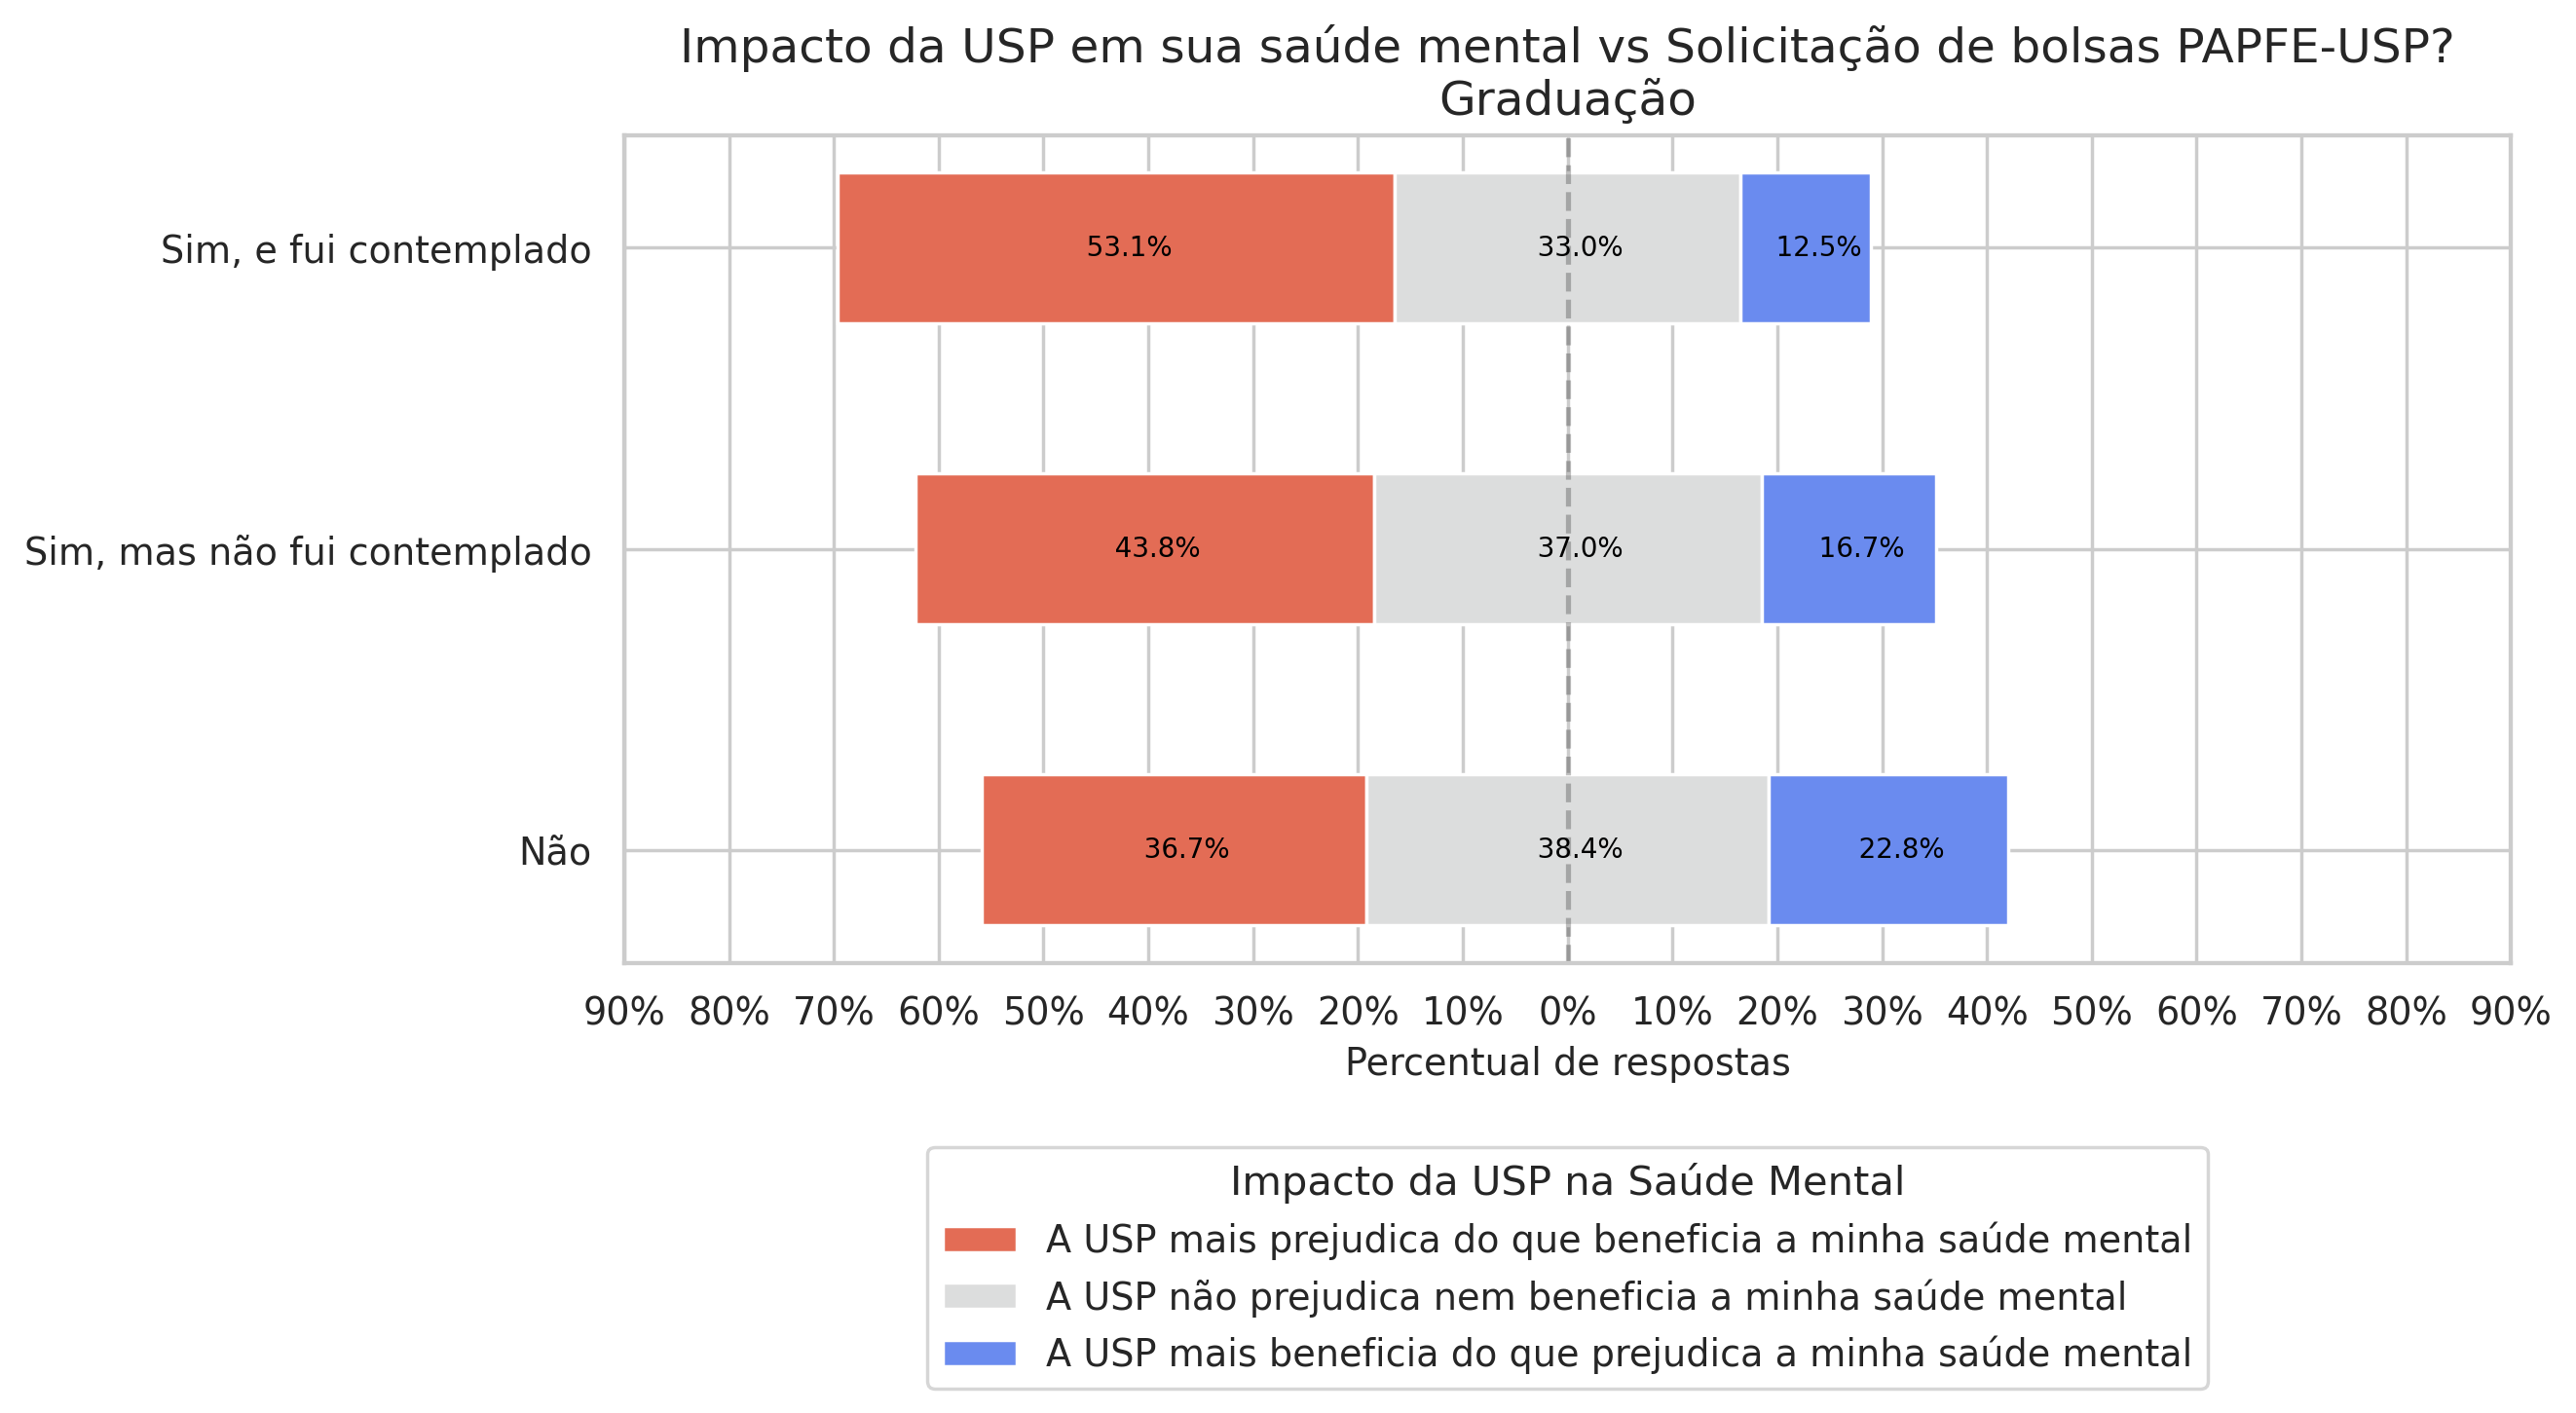

In [ ]:
df = tab_papfe_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x:['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Solicitação de bolsas PAPFE-USP?\nGraduação', fontsize=14)

ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2       p-Valor
Considerando o impacto da USP em sua saúde ment...  85.292663  2.870959e-16

## Análise 07. Impacto saúde mental vs Quantidade de horas trabalhadas (graduação)

In [ ]:
lista = []
for idx, valor in df_graduacao[['Você trabalha?','Quantas horas semanais?']].iterrows():
  if valor['Você trabalha?'] == "Não":
    lista.append(0)
  elif valor['Você trabalha?'] == "Prefiro não responder":
    lista.append("Prefiro não responder")
  else:
    lista.append(valor['Quantas horas semanais?'])

In [ ]:
# Retirar o primeiro número da string
import re

horas_lista = []
for horas in lista:
  string = f'{horas}'
  match = re.search(r'\d+\.\d+|\d+', string)

  # Verifique se houve uma correspondência
  if match:
      primeiro_numero = match.group()
      horas_lista.append(int(primeiro_numero))
  else:
      horas_lista.append("Não informado")

In [ ]:
# Há 27 horas trabalhadas distintas, vamos classificá-las em "Não informado", "Não trabalho", "Menos de 20h", "Entre 20h e 30h" e "Mais de 30h"
horas_agrupada_lista = []
for horas in horas_lista:
  if isinstance(horas, str):
    horas_agrupada_lista.append("Não informado")
  elif horas == 0:
    horas_agrupada_lista.append("Não trabalho")
  elif horas <= 20:
    horas_agrupada_lista.append("Menos de 20h")
  elif horas <= 30:
    horas_agrupada_lista.append("Entre 20h e 30h")
  else:
    horas_agrupada_lista.append("Mais de 30h")

In [ ]:
df_graduacao['horas_agrupadas'] = horas_agrupada_lista

In [ ]:
ordem_horas_trabalhadas =['Não informado',
                            'Não trabalho',
                            'Menos de 20h',
                            'Entre 20h e 30h',
                            'Mais de 30h']


In [ ]:
tab_horas_grad1 = pd.crosstab(df_graduacao['horas_agrupadas'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_horas_grad1 = tab_horas_grad1.reindex(index=['Não trabalho','Menos de 20h', 'Entre 20h e 30h', 'Mais de 30h'], columns=ordem_smental)

tab_horas_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
horas_agrupadas                                                                                                                                                  
Não trabalho                                                                                                                                      778            
Menos de 20h                                                                                                                                       97            
Entre 20h e 30h                                                                                                                                   216            
Mais de 30h                                                                                                                                       123            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
horas_agrupadas                                                                                                                                                                                                           
Não trabalho                                                                                                                                      689                                                                     
Menos de 20h                                                                                                                                       89                                                                     
Entre 20h e 30h                                                                                                                                   128                                                                     
Mais de 30h                                                                                                                                       103                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
horas_agrupadas                                                                                                                                                 
Não trabalho                                                                                                                                      287           
Menos de 20h                                                                                                                                       55           
Entre 20h e 30h                                                                                                                                    97           
Mais de 30h                                                                                                                                        76

### Mosaic Plot

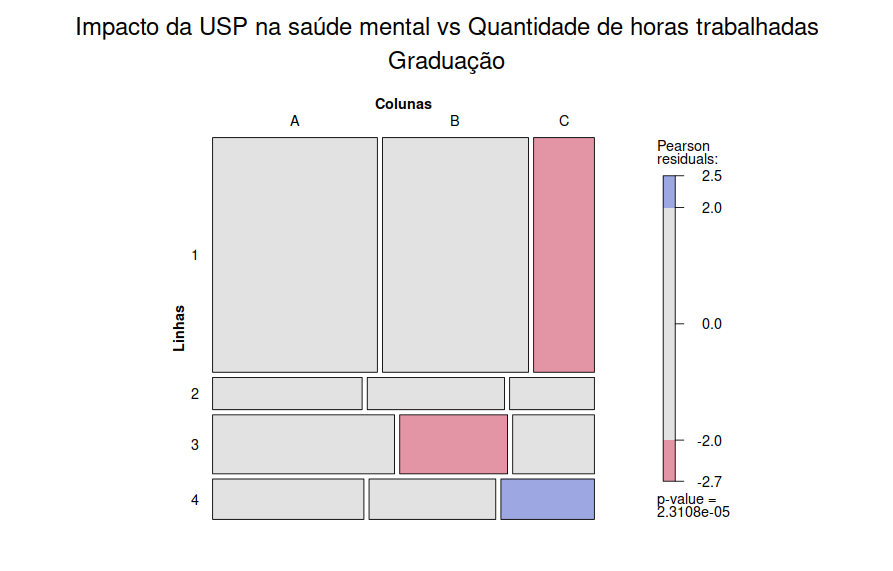

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

mudar aq

In [ ]:
#normalizado
tab_horas_grad = pd.crosstab(df_graduacao['horas_agrupadas'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_horas_grad = tab_horas_grad.astype(float)
tab_horas_grad = tab_horas_grad.reindex(index=['Não trabalho','Menos de 20h', 'Entre 20h e 30h', 'Mais de 30h'], columns=ordem_smental)

tab_horas_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
horas_agrupadas                                                                                                                                                  
Não trabalho                                                                                                                                 0.436833            
Menos de 20h                                                                                                                                 0.395918            
Entre 20h e 30h                                                                                                                              0.477876            
Mais de 30h                                                                                                                                  0.392971            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
horas_agrupadas                                                                                                                                                                                                           
Não trabalho                                                                                                                                 0.386861                                                                     
Menos de 20h                                                                                                                                 0.363265                                                                     
Entre 20h e 30h                                                                                                                              0.283186                                                                     
Mais de 30h                                                                                                                                  0.329073                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
horas_agrupadas                                                                                                                                                 
Não trabalho                                                                                                                                 0.161145           
Menos de 20h                                                                                                                                 0.224490           
Entre 20h e 30h                                                                                                                              0.214602           
Mais de 30h                                                                                                                                  0.242812

### Plot

/tmp/ipykernel_12033/231118723.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Mais de 30h', 'Entre 20h e 30h', 'Menos de 20h', 'Não trabalho'])


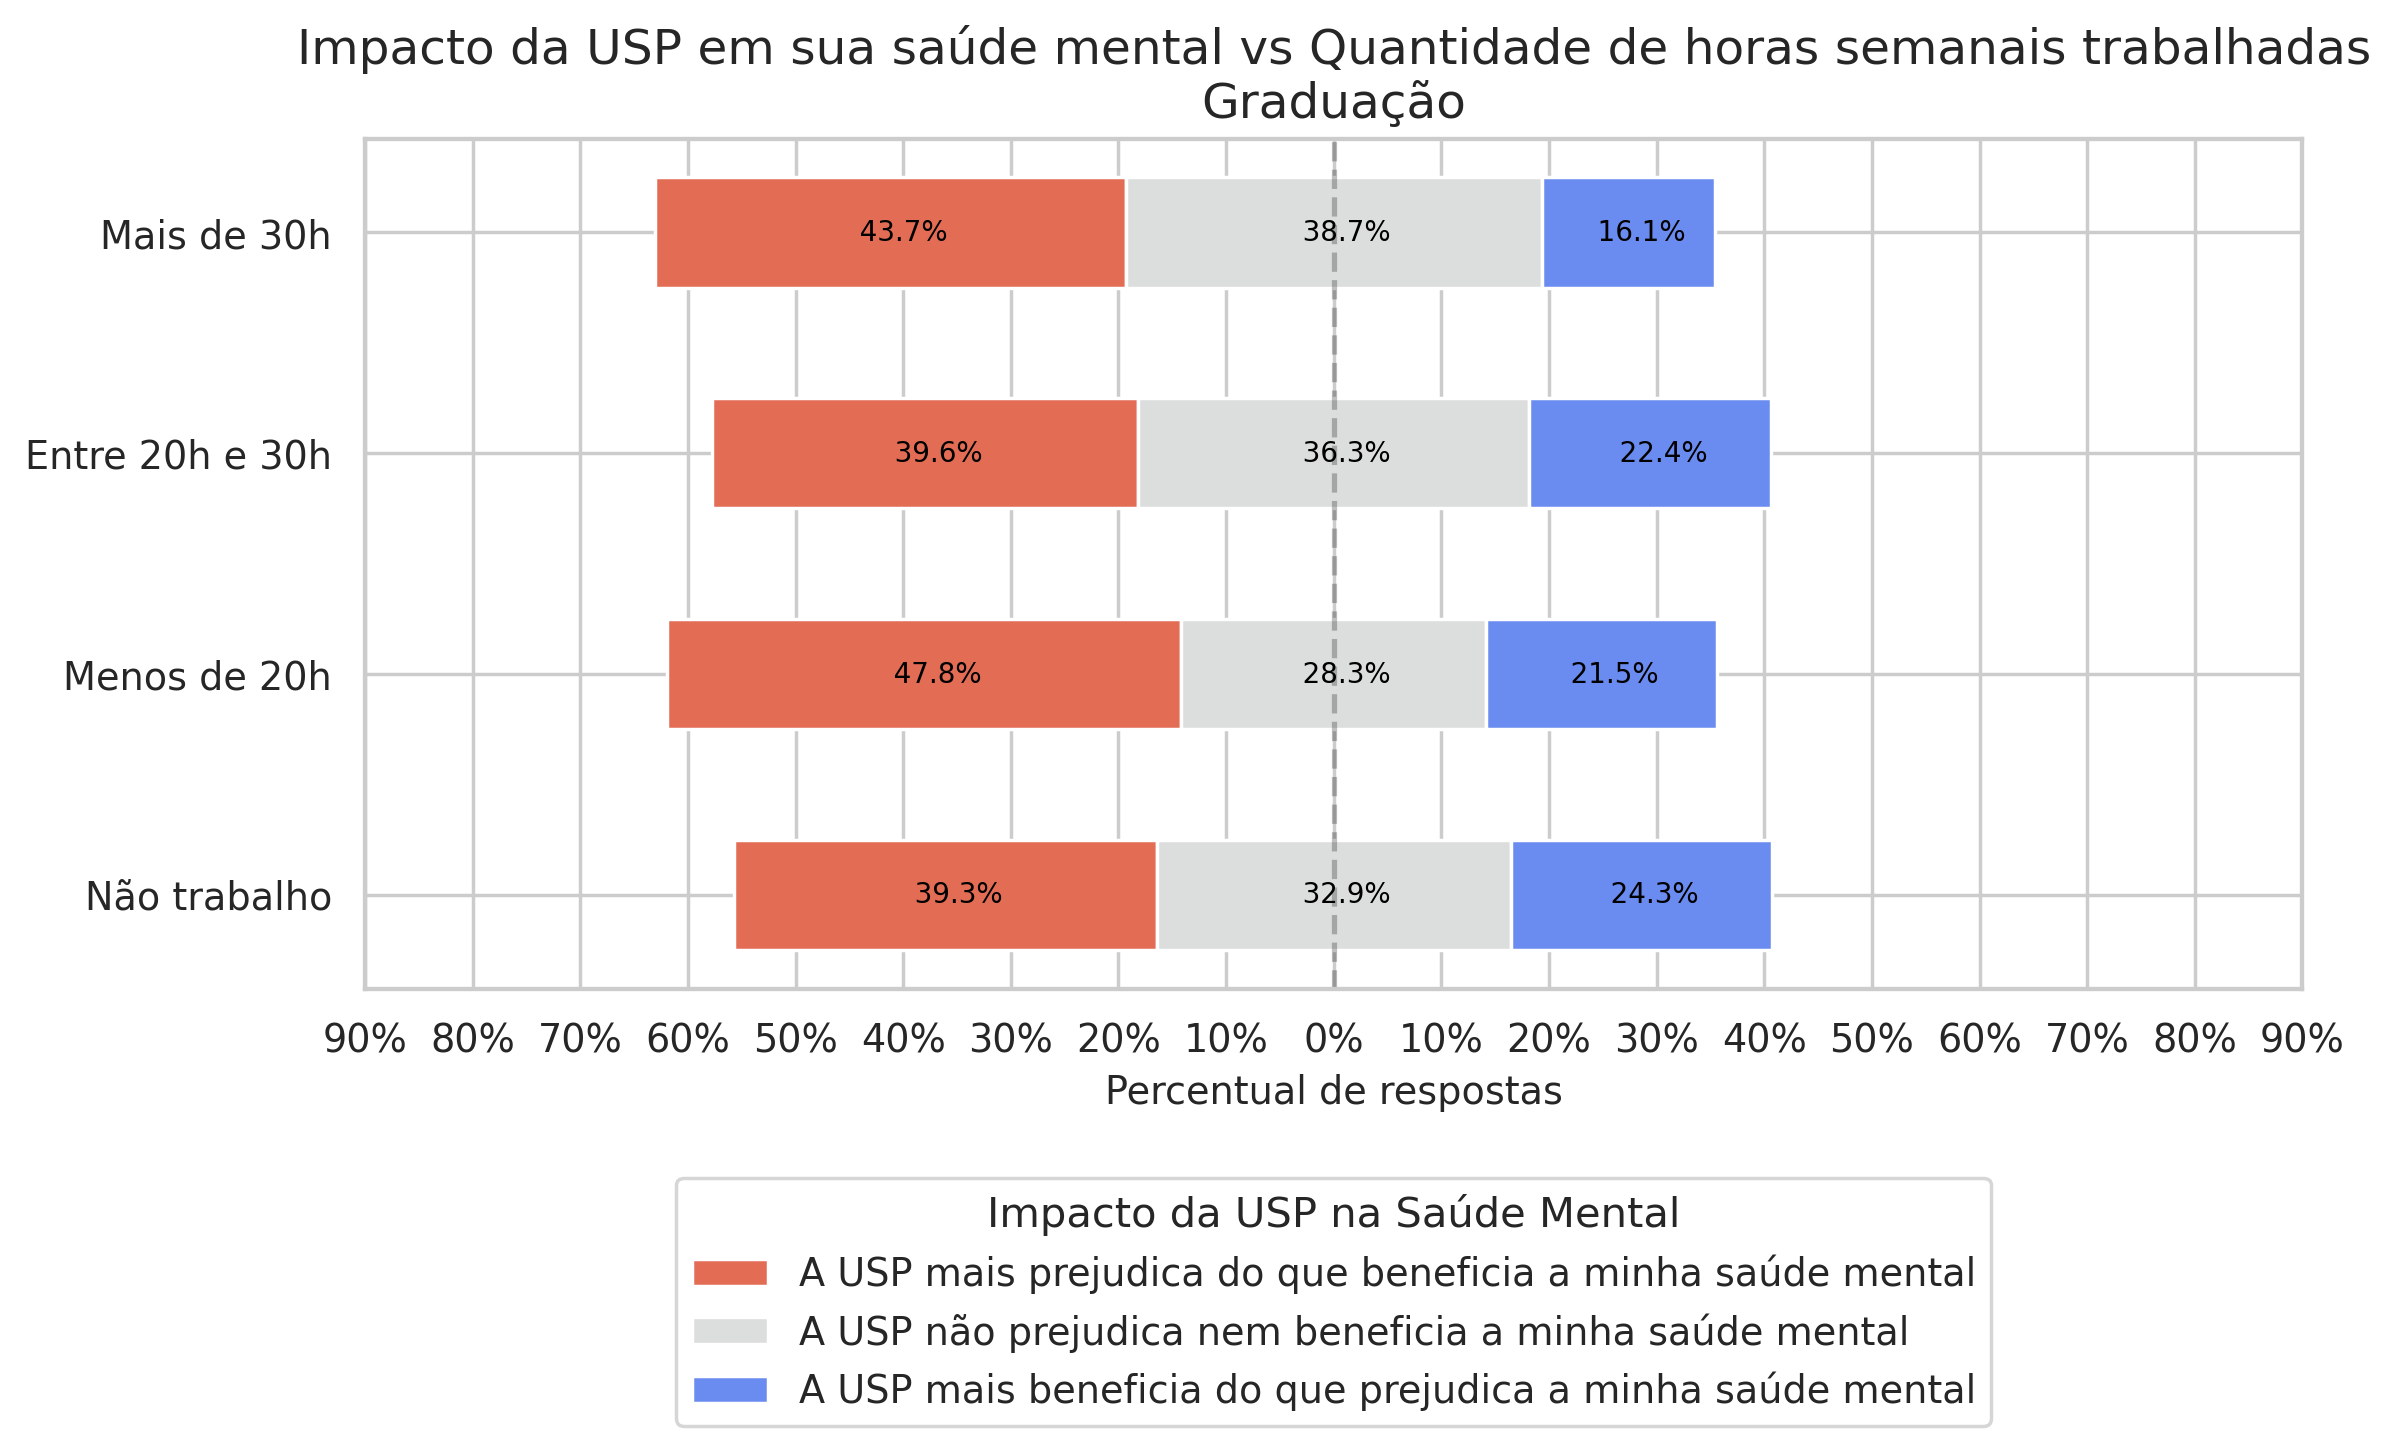

In [ ]:
df = tab_horas_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Não trabalho',
                            'Menos de 20h',
                            'Entre 20h e 30h',
                            'Mais de 30h'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Quantidade de horas semanais trabalhadas\nGraduação', fontsize=14)

ax.set_yticklabels(['Mais de 30h', 'Entre 20h e 30h', 'Menos de 20h', 'Não trabalho'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(horas_agrupada_lista, df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  40.343323  0.000063

## Análise 8. Saúde mental  vs Você é atualmente financeiramente dependente/independente? (graduação)

In [ ]:
ordem_dependencia = ['Dependente',	'Independente', 'Prefiro não responder']

In [ ]:
tab_financeiro_grad1 = pd.crosstab(df_graduacao['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_financeiro_grad1 = tab_financeiro_grad1.reindex(index=['Dependente',	'Independente'], columns=ordem_smental)

tab_financeiro_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você é atualmente dependente financeiramente (f...                                                                                                               
Dependente                                                                                                                                        979            
Independente                                                                                                                                      248            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você é atualmente dependente financeiramente (f...                                                                                                                                                                        
Dependente                                                                                                                                        858                                                                     
Independente                                                                                                                                      170                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você é atualmente dependente financeiramente (f...                                                                                                              
Dependente                                                                                                                                        386           
Independente                                                                                                                                      142

### Mosaic plot

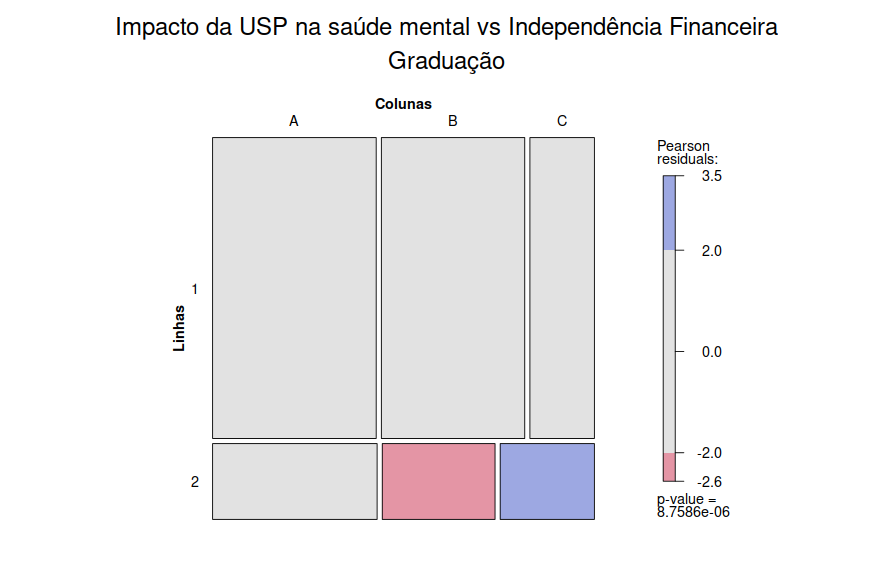

In [ ]:
tab_financeiro_grad = pd.crosstab(df_graduacao['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_financeiro_grad = tab_financeiro_grad.astype(float)
tab_financeiro_grad = tab_financeiro_grad.reindex(index=['Dependente',	'Independente'], columns=ordem_smental)

tab_financeiro_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Você é atualmente dependente financeiramente (f...                                                                                                               
Dependente                                                                                                                                   0.433378            
Independente                                                                                                                                 0.430556            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Você é atualmente dependente financeiramente (f...                                                                                                                                                                        
Dependente                                                                                                                                   0.379814                                                                     
Independente                                                                                                                                 0.295139                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Você é atualmente dependente financeiramente (f...                                                                                                              
Dependente                                                                                                                                   0.170872           
Independente                                                                                                                                 0.246528

### Plot

/tmp/ipykernel_12033/4286546232.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Dependente', 'Independente'])


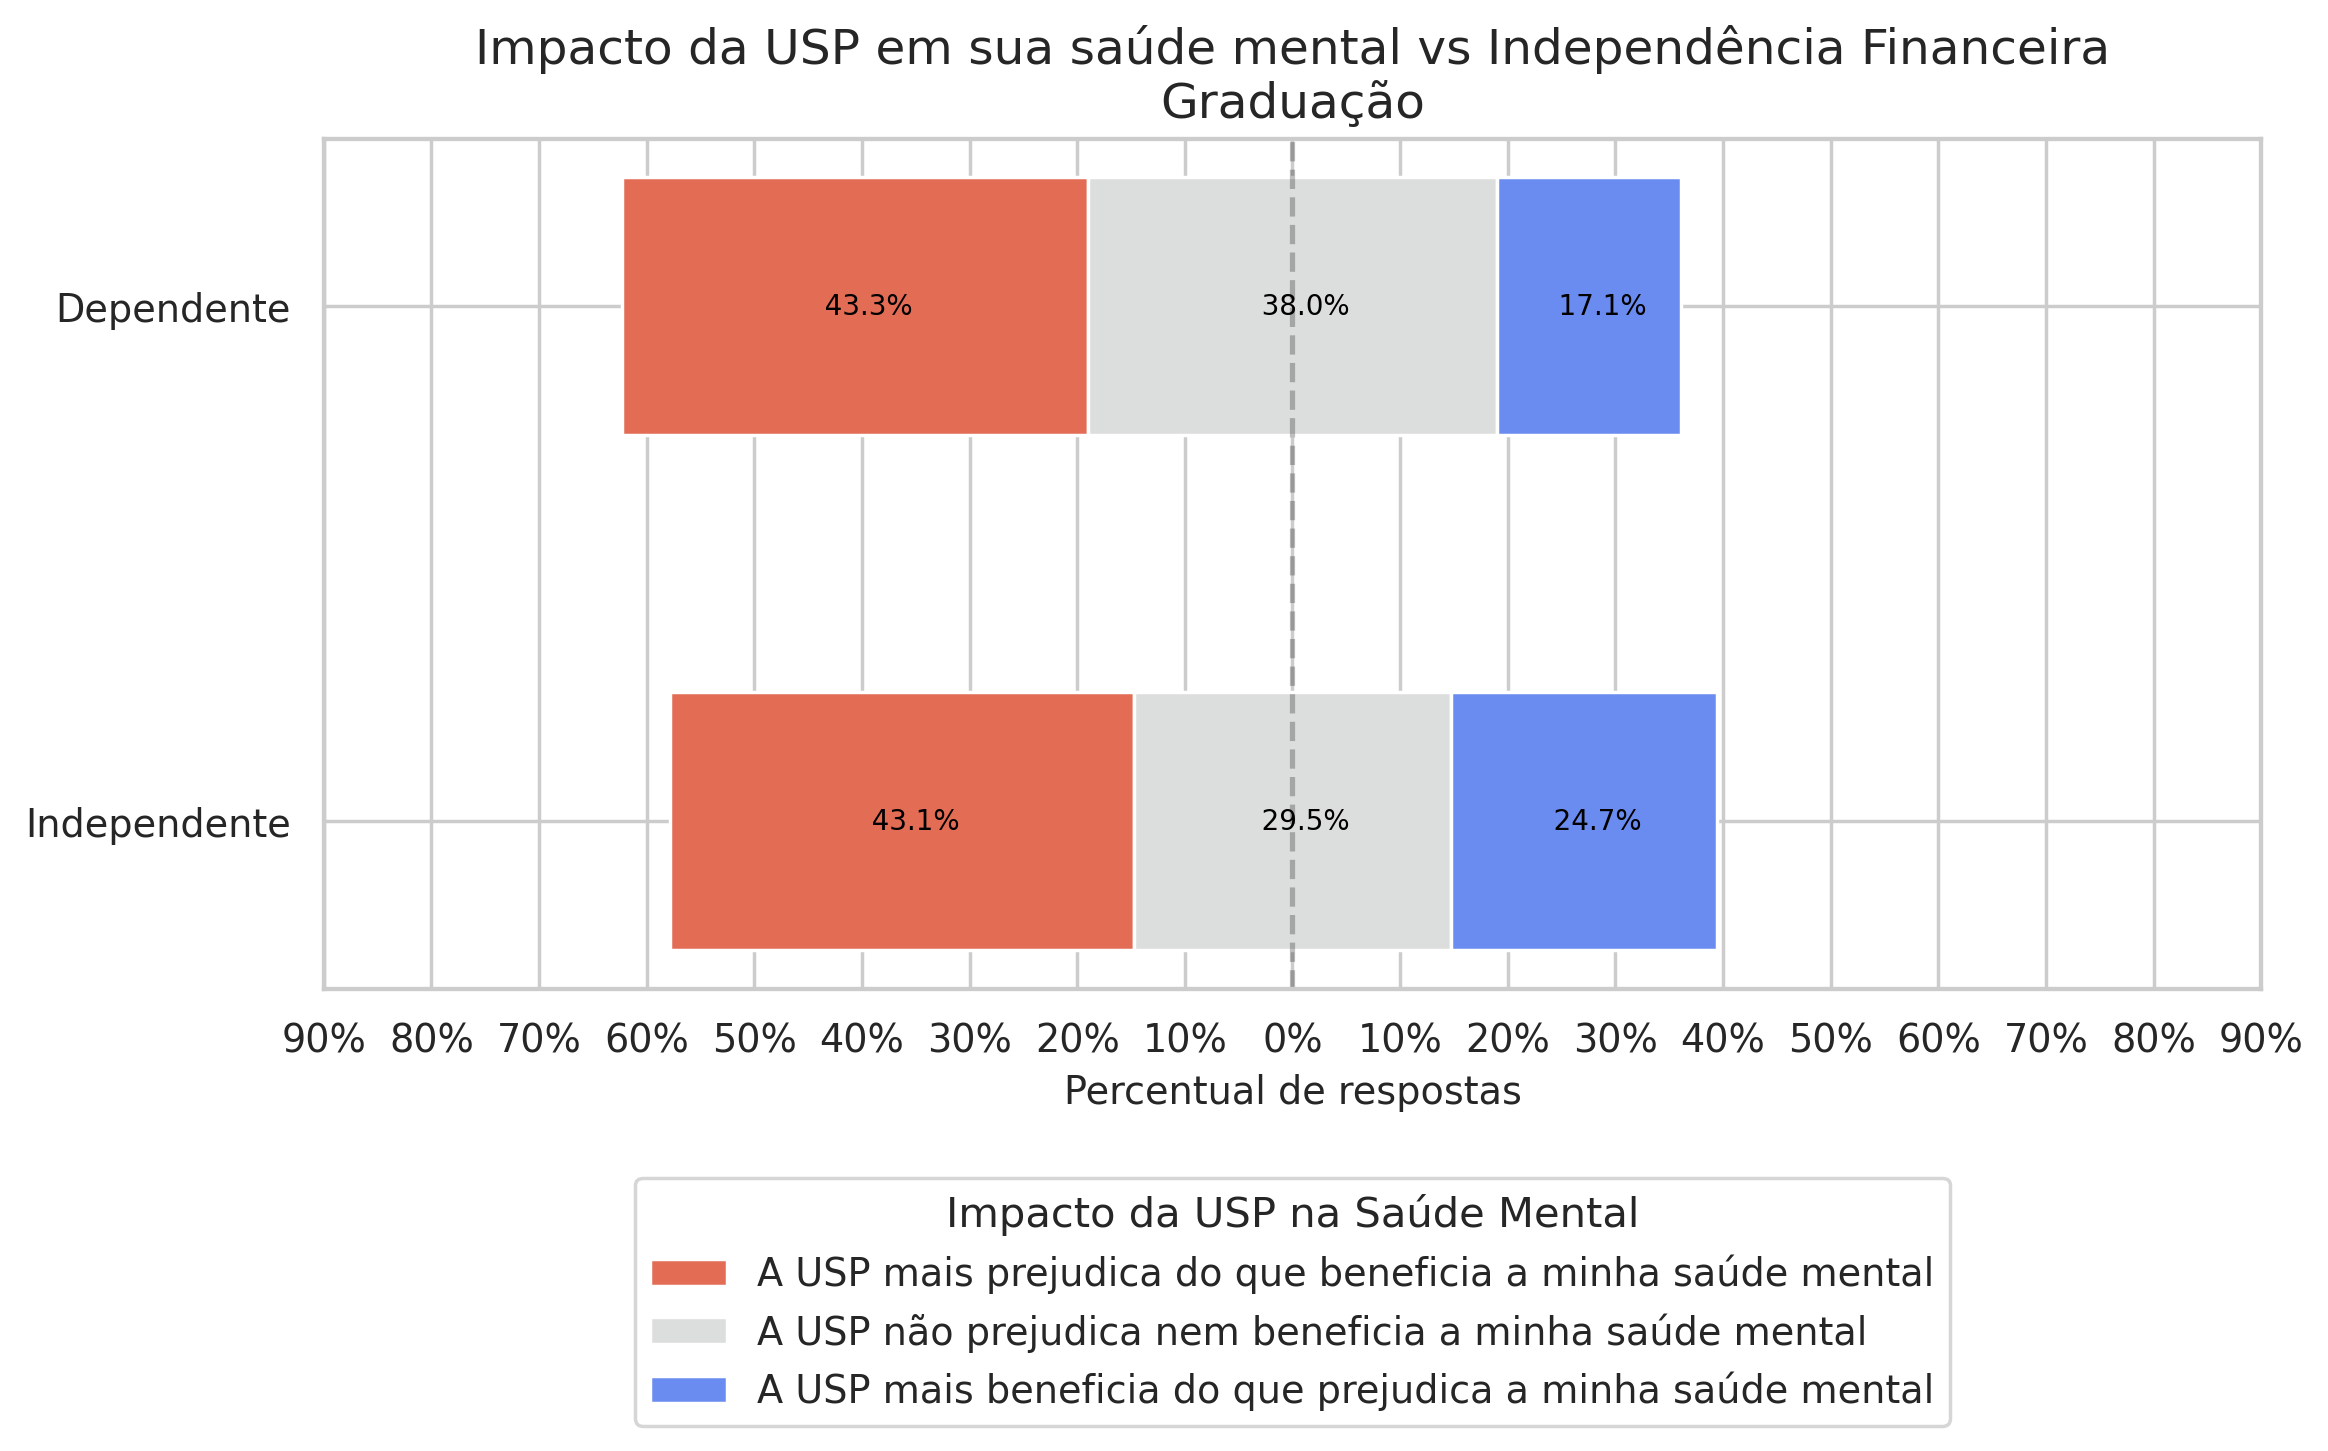

In [ ]:
df = tab_financeiro_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Dependente', 'Independente'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Independência Financeira\nGraduação', fontsize=14)

ax.set_yticklabels(['Dependente', 'Independente'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Você é atualmente dependente financeiramente (família/responsável está ajudando com suas despesas) ou independente (você é o único provedor para as suas despesas)?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  29.106894  0.000058

## Análise 9. Impacto na saúde mental vs Qual o seu tipo de ensino médio? (graduação)

In [ ]:
ordem_ensinomedio = ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica',
                    'Educação de Jovens e Adultos', 'Prefiro não responder']

In [ ]:
# Substituir a resposta desejada
df_graduacao['Tipo de ensino médio'] = df_graduacao['Tipo de ensino médio'].replace('Curso regular, em escola escola regular', 'Curso regular, em escola regular')


In [ ]:

df_graduacao['Tipo de ensino médio'] = pd.np.where(
    df_graduacao['Tipo de ensino médio'].str.contains('Integral|integral'),
    'Curso integral, em escola regular',
    df_graduacao['Tipo de ensino médio']
)

df_graduacao['Tipo de ensino médio'] = pd.np.where(
    df_graduacao['Tipo de ensino médio'].str.contains('militar|Militar'),
    'Curso regular, em escola escola regular',
    df_graduacao['Tipo de ensino médio']
)

df_graduacao['Tipo de ensino médio'] = pd.np.where(
    df_graduacao['Tipo de ensino médio'].str.contains('encceja|Encceja|ENCCEJA|Exame Nacional para Certificação de Competências de Jovens e Adultos'),
    'ENCCEJA',
    df_graduacao['Tipo de ensino médio']
)

df_graduacao['Tipo de ensino médio'] = pd.np.where(
    df_graduacao['Tipo de ensino médio'].str.contains('EJA|eja|Ensino de Jovens Adultos|Supletivo|supletivo'),
    'Educação de Jovens e Adultos',
    df_graduacao['Tipo de ensino médio']
)

/tmp/ipykernel_12033/2454427176.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_graduacao['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_12033/2454427176.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_graduacao['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_12033/2454427176.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_graduacao['Tipo de ensino médio'] = pd.np.where(
/tmp/ipykernel_12033/2454427176.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_graduacao['Tipo de ensino médio'] = pd.np.where(


In [ ]:
tab_tipomedio_grad1 = pd.crosstab(df_graduacao['Tipo de ensino médio'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_tipomedio_grad1 = tab_tipomedio_grad1.reindex(index= ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'], columns=ordem_smental)

tab_tipomedio_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Tipo de ensino médio                                                                                                                                             
Curso regular, em escola regular                                                                                                                  780            
Curso integral, em escola regular                                                                                                                   3            
Curso regular, em escola técnica                                                                                                                  137            
Curso regular e técnico em escola técnica                                                                                                         313            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Tipo de ensino médio                                                                                                                                                                                                      
Curso regular, em escola regular                                                                                                                  722                                                                     
Curso integral, em escola regular                                                                                                                   7                                                                     
Curso regular, em escola técnica                                                                                                                   87                                                                     
Curso regular e técnico em escola técnica                                                                                                         218                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Tipo de ensino médio                                                                                                                                            
Curso regular, em escola regular                                                                                                                  398           
Curso integral, em escola regular                                                                                                                   3           
Curso regular, em escola técnica                                                                                                                   35           
Curso regular e técnico em escola técnica                                                                                                          86

### Mosaic plot

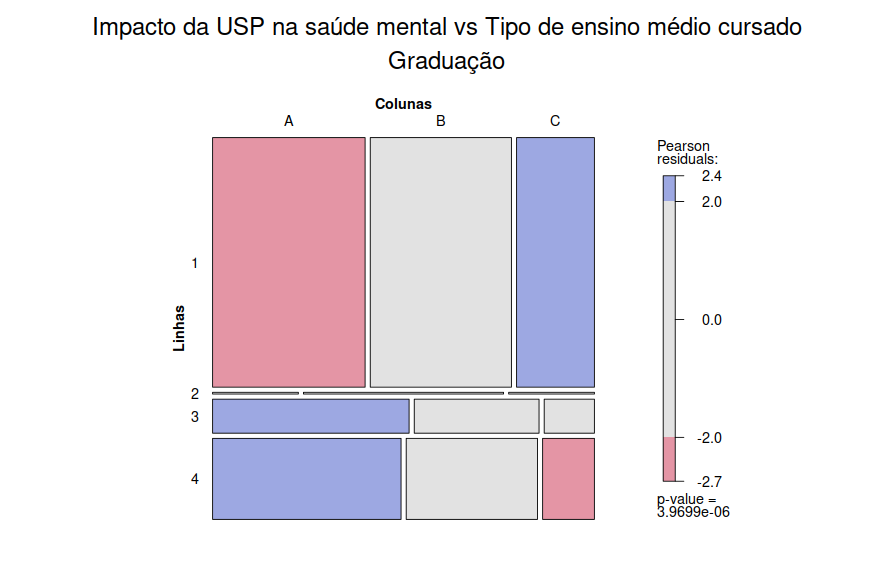

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

mudar aq

In [ ]:
tab_tipomedio_grad = pd.crosstab(df_graduacao['Tipo de ensino médio'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_tipomedio_grad = tab_tipomedio_grad.astype(float)
tab_tipomedio_grad = tab_tipomedio_grad.reindex(index= ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'], columns=ordem_smental)

tab_tipomedio_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Tipo de ensino médio                                                                                                                                             
Curso regular, em escola regular                                                                                                             0.402477            
Curso integral, em escola regular                                                                                                            0.230769            
Curso regular, em escola técnica                                                                                                             0.515038            
Curso regular e técnico em escola técnica                                                                                                    0.500000            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Tipo de ensino médio                                                                                                                                                                                                      
Curso regular, em escola regular                                                                                                             0.372549                                                                     
Curso integral, em escola regular                                                                                                            0.538462                                                                     
Curso regular, em escola técnica                                                                                                             0.327068                                                                     
Curso regular e técnico em escola técnica                                                                                                    0.348243                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Tipo de ensino médio                                                                                                                                            
Curso regular, em escola regular                                                                                                             0.205366           
Curso integral, em escola regular                                                                                                            0.230769           
Curso regular, em escola técnica                                                                                                             0.131579           
Curso regular e técnico em escola técnica                                                                                                    0.137380

### Plot likert

/tmp/ipykernel_12033/3774955204.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Curso regular, em escola regular',


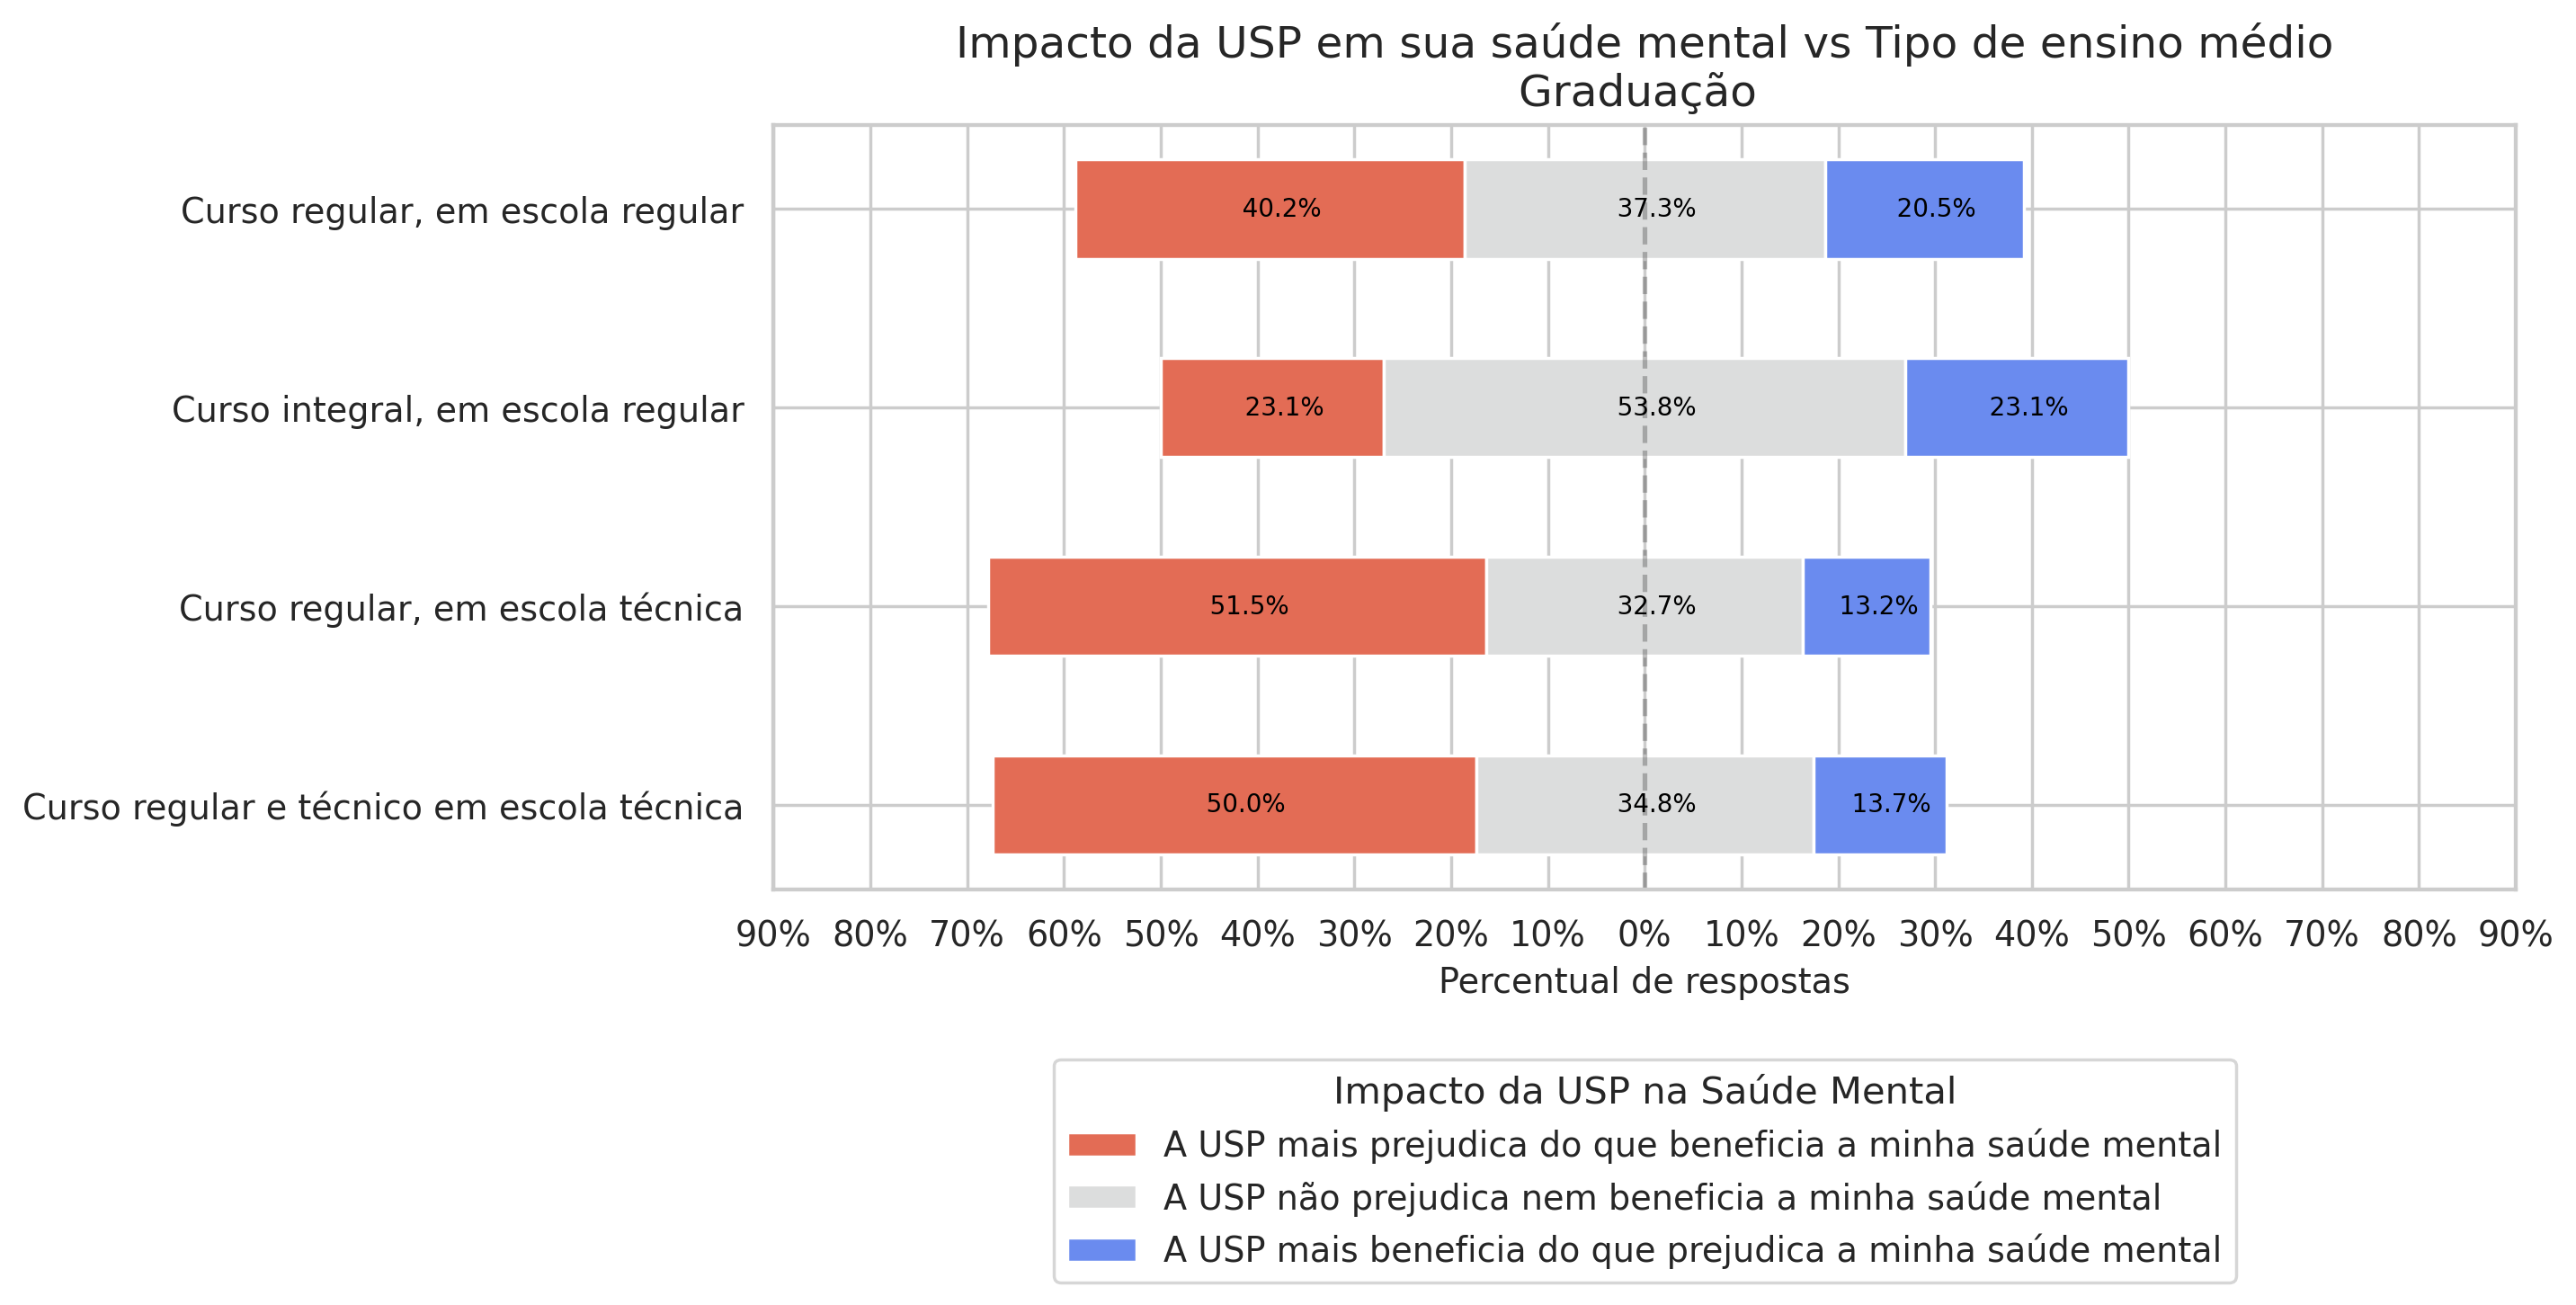

In [ ]:
df = tab_tipomedio_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Tipo de ensino médio\nGraduação ', fontsize=14)

ax.set_yticklabels(['Curso regular, em escola regular',
                     'Curso integral, em escola regular',
                    'Curso regular, em escola técnica',
                    'Curso regular e técnico em escola técnica'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_graduacao['Tipo de ensino médio'])

Qui2   p-Valor
Tipo de ensino médio  76.332509  0.044591

## Análise 10. Impacto na saúde mental vs Onde cursou o seu ensino médio? (graduação)

In [ ]:
tab_ondecursou_grad1 = pd.crosstab(df_graduacao['Onde cursou o seu ensino médio?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_ondecursou_grad1 = tab_ondecursou_grad1.reindex(index=['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'], columns=ordem_smental)

tab_ondecursou_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Onde cursou o seu ensino médio?                                                                                                                                  
Só em escola(s) pública(s)                                                                                                                        765            
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                                 12            
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                                 25            
Só em escola(a) privada(s), com bolsa integral                                                                                                    132            
Só em escola(s) privada(s), sem bolsa integral                                                                                                    308            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Onde cursou o seu ensino médio?                                                                                                                                                                                           
Só em escola(s) pública(s)                                                                                                                        558                                                                     
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                                 10                                                                     
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                                 30                                                                     
Só em escola(a) privada(s), com bolsa integral                                                                                                    119                                                                     
Só em escola(s) privada(s), sem bolsa integral                                                                                                    327                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Onde cursou o seu ensino médio?                                                                                                                                 
Só em escola(s) pública(s)                                                                                                                        249           
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                                 10           
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                                 24           
Só em escola(a) privada(s), com bolsa integral                                                                                                     55           
Só em escola(s) privada(s), sem bolsa integral                                                                                                    196

In [ ]:
tab_ondecursou_grad = pd.crosstab(df_graduacao['Onde cursou o seu ensino médio?'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_ondecursou_grad = tab_ondecursou_grad.astype(float)
tab_ondecursou_grad = tab_ondecursou_grad.reindex(index=['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'], columns=ordem_smental)

tab_ondecursou_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Onde cursou o seu ensino médio?                                                                                                                                  
Só em escola(s) pública(s)                                                                                                                   0.477230            
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.352941            
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.312500            
Só em escola(a) privada(s), com bolsa integral                                                                                               0.425806            
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.363636            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Onde cursou o seu ensino médio?                                                                                                                                                                                           
Só em escola(s) pública(s)                                                                                                                   0.348097                                                                     
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.294118                                                                     
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.375000                                                                     
Só em escola(a) privada(s), com bolsa integral                                                                                               0.383871                                                                     
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.386068                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Onde cursou o seu ensino médio?                                                                                                                                 
Só em escola(s) pública(s)                                                                                                                   0.155334           
Em escola(s) pública(s) e privada(s), com bolsa...                                                                                           0.294118           
Em escola(s) pública(s) e privada(s), sem bolsa...                                                                                           0.300000           
Só em escola(a) privada(s), com bolsa integral                                                                                               0.177419           
Só em escola(s) privada(s), sem bolsa integral                                                                                               0.231405

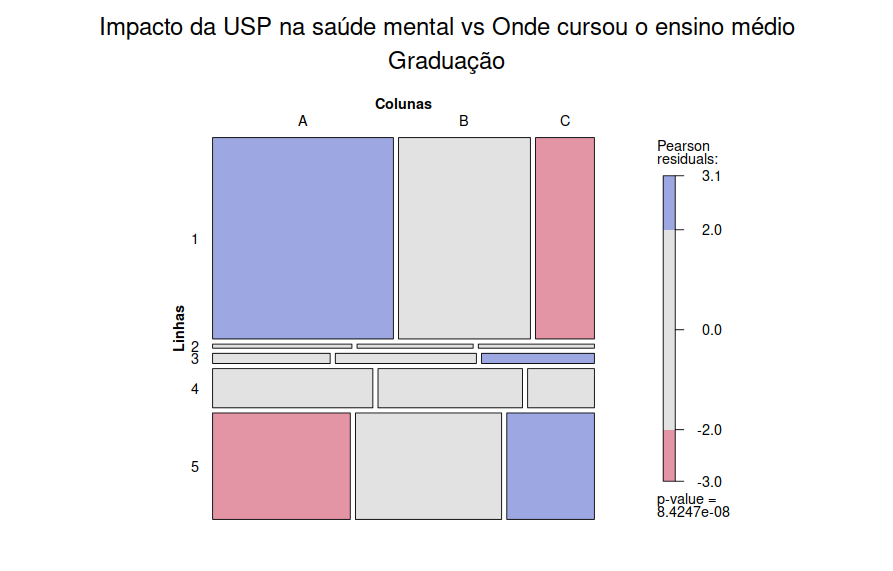

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

mudar aq

/tmp/ipykernel_12033/604579831.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Só em escola(s) pública(s)',


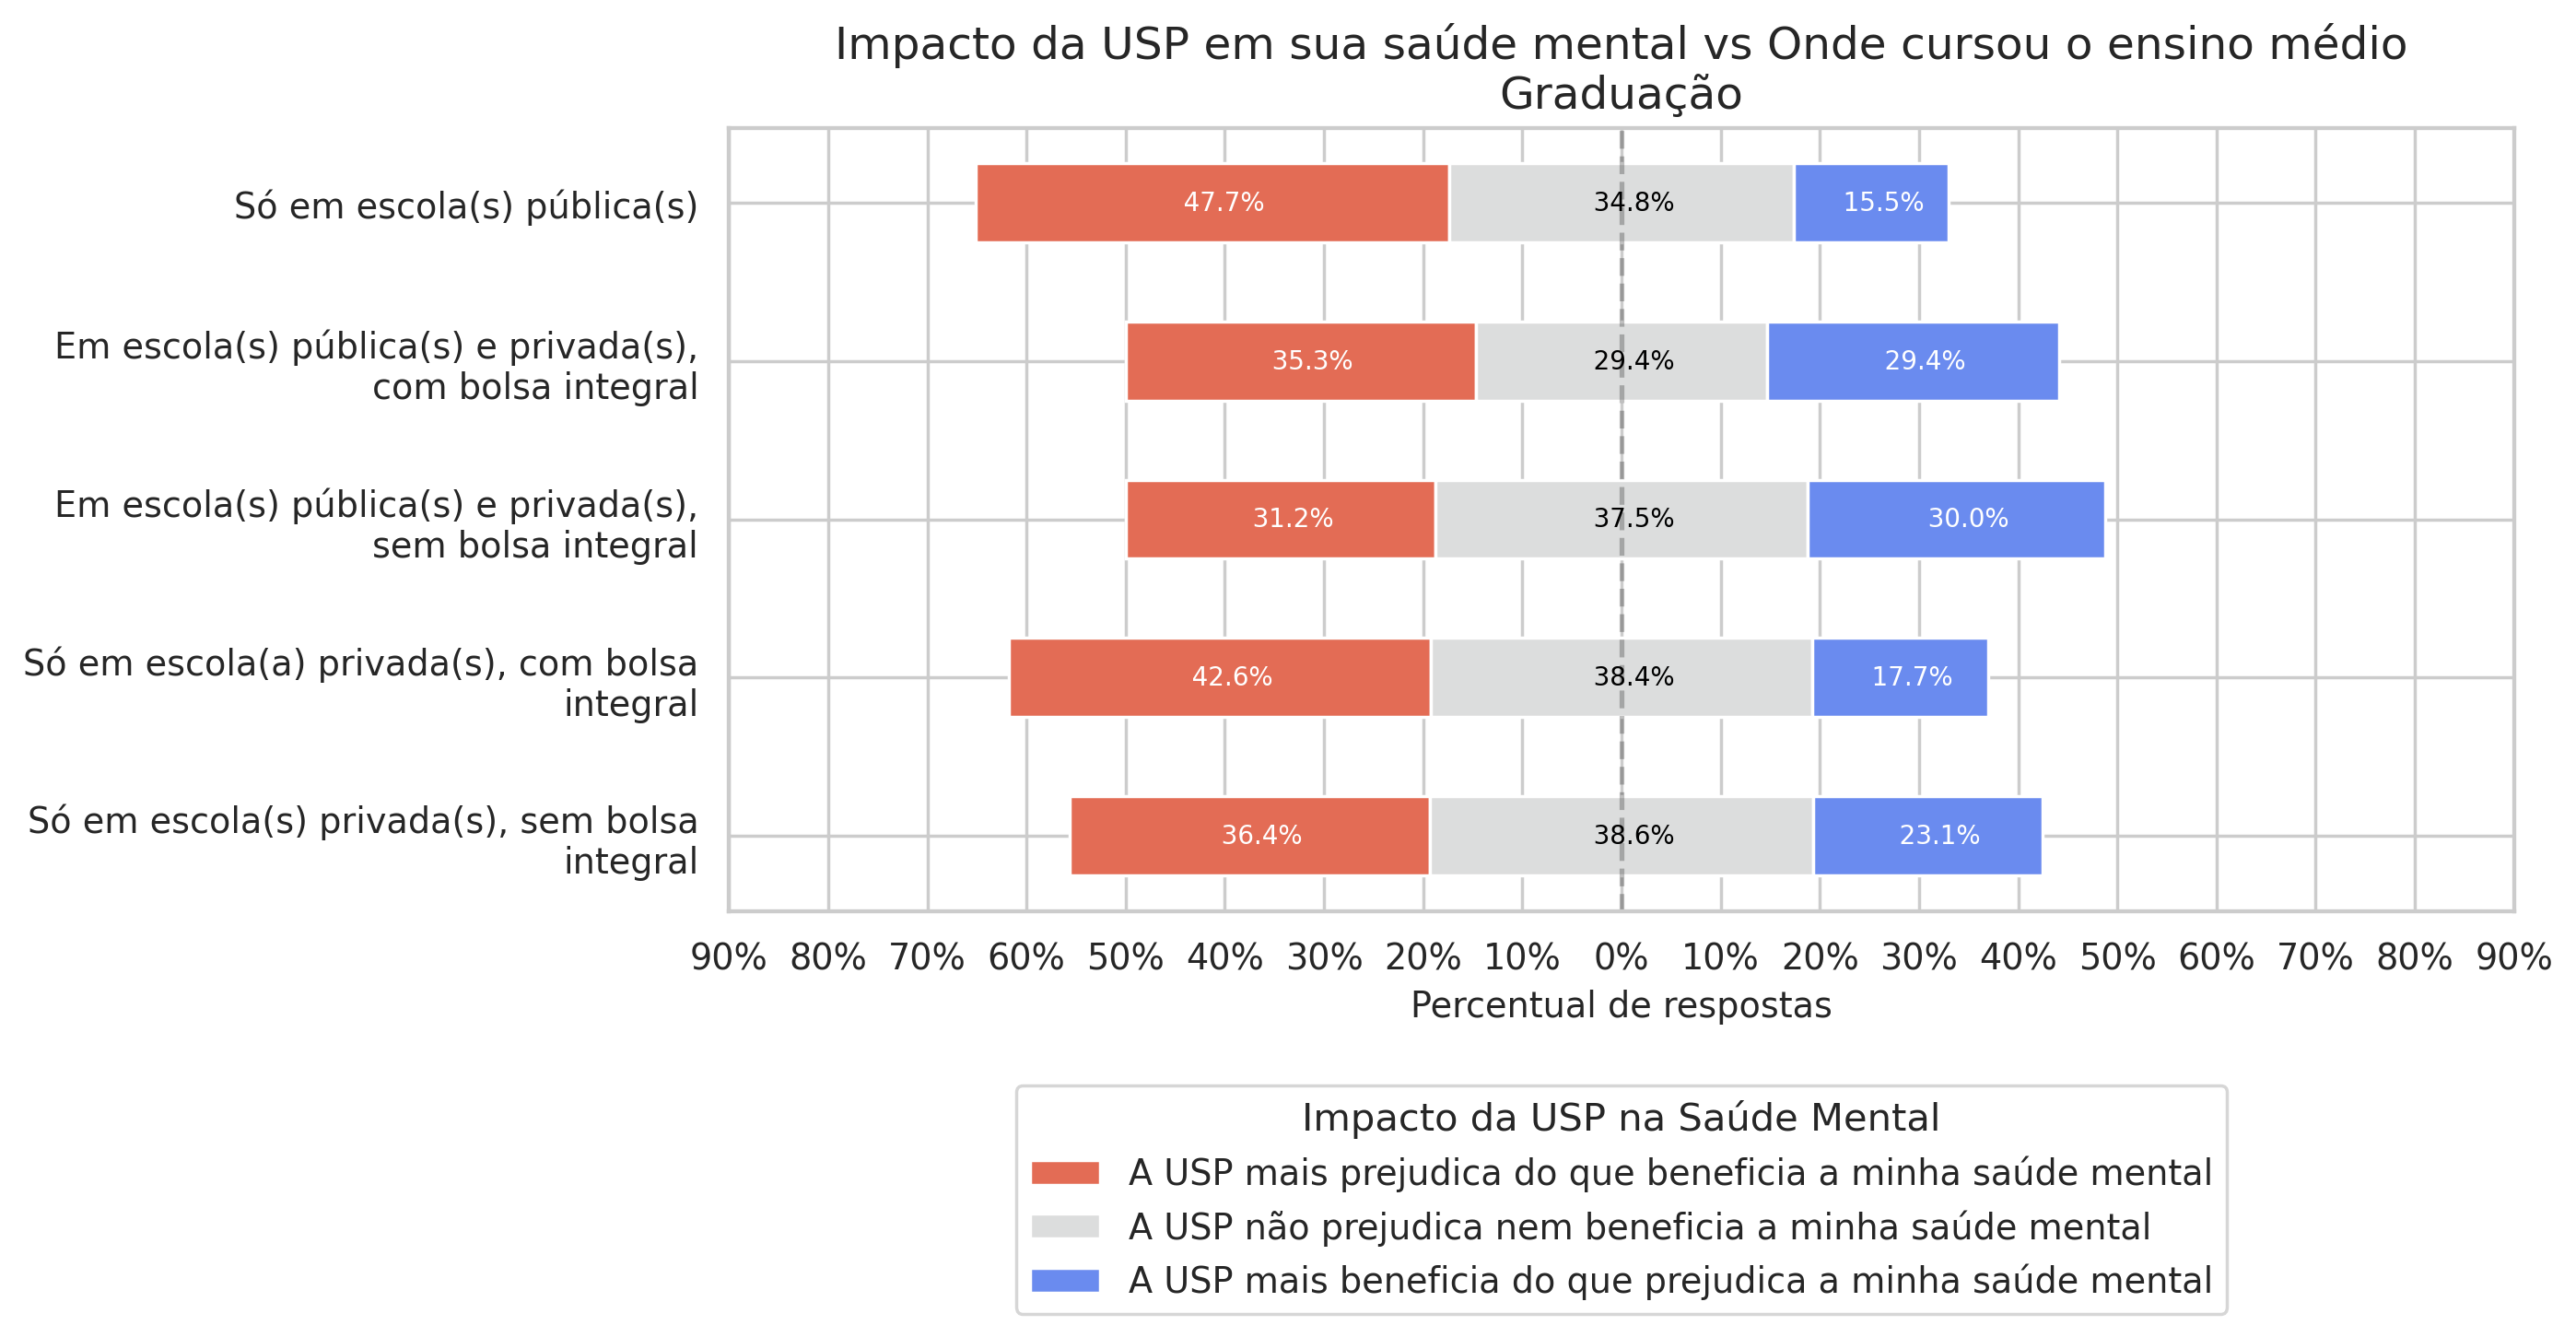

In [ ]:
df = tab_ondecursou_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s), com bolsa integral',
'Em escola(s) pública(s) e privada(s), sem bolsa integral',
'Só em escola(a) privada(s), com bolsa integral',
'Só em escola(s) privada(s), sem bolsa integral'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['White']+['Black']+['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Onde cursou o ensino médio\nGraduação', fontsize=14)

ax.set_yticklabels(['Só em escola(s) pública(s)',
'Em escola(s) pública(s) e privada(s),\ncom bolsa integral',
'Em escola(s) pública(s) e privada(s),\nsem bolsa integral',
'Só em escola(a) privada(s), com bolsa\nintegral',
'Só em escola(s) privada(s), sem bolsa\nintegral'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], df_graduacao['Onde cursou o seu ensino médio?'])

Qui2   p-Valor
Onde cursou o seu ensino médio?  54.643642  0.000002

## Análise 11. Impacto na saúde mental vs Cor/Raça (graduação)

In [ ]:
df_graduacao['Qual sua cor/raça (critério IBGE)'].unique()

array(['branca', 'parda', 'preta', 'amarela', 'prefiro não responder',
       'marrom', nan, 'Mestiço', 'Branca '], dtype=object)

In [ ]:
tab_raca_grad1 = pd.crosstab(df_graduacao['Qual sua cor/raça (critério IBGE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_raca_grad1 = tab_raca_grad1.reindex(index=['preta', 'parda', 'indígena', 'amarela', 'branca'], columns=ordem_smental)

tab_raca_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual sua cor/raça (critério IBGE)                                                                                                                                
preta                                                                                                                                             172            
parda                                                                                                                                             282            
indígena                                                                                                                                            1            
amarela                                                                                                                                            53            
branca                                                                                                                                            713            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual sua cor/raça (critério IBGE)                                                                                                                                                                                         
preta                                                                                                                                              94                                                                     
parda                                                                                                                                             219                                                                     
indígena                                                                                                                                            3                                                                     
amarela                                                                                                                                            47                                                                     
branca                                                                                                                                            669                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Qual sua cor/raça (critério IBGE)                                                                                                                               
preta                                                                                                                                              45           
parda                                                                                                                                             105           
indígena                                                                                                                                            0           
amarela                                                                                                                                            23           
branca                                                                                                                                            358

In [ ]:
df_graduacao['Qual sua cor/raça (critério IBGE)'] = df_graduacao['Qual sua cor/raça (critério IBGE)'].loc[df_graduacao['Qual sua cor/raça (critério IBGE)'] != 'indígena']

In [ ]:
tab_raca_grad1 = pd.crosstab(df_graduacao['Qual sua cor/raça (critério IBGE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_raca_grad1 = tab_raca_grad1.reindex(index=['preta', 'parda', 'amarela', 'branca'], columns=ordem_smental)

tab_raca_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual sua cor/raça (critério IBGE)                                                                                                                                
preta                                                                                                                                             172            
parda                                                                                                                                             282            
amarela                                                                                                                                            53            
branca                                                                                                                                            713            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual sua cor/raça (critério IBGE)                                                                                                                                                                                         
preta                                                                                                                                              94                                                                     
parda                                                                                                                                             219                                                                     
amarela                                                                                                                                            47                                                                     
branca                                                                                                                                            669                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Qual sua cor/raça (critério IBGE)                                                                                                                               
preta                                                                                                                                              45           
parda                                                                                                                                             105           
amarela                                                                                                                                            23           
branca                                                                                                                                            358

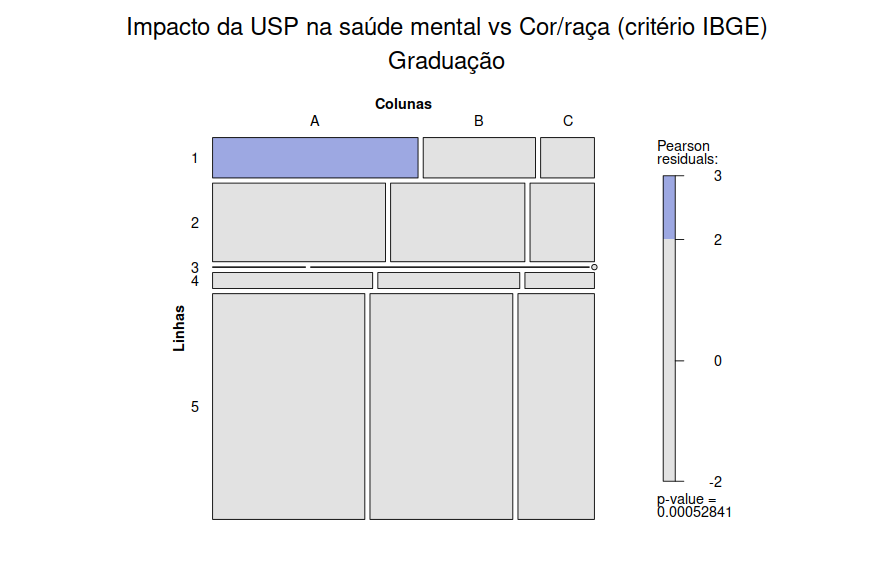

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

mudar aq

In [ ]:
tab_raca_grad = pd.crosstab(df_graduacao['Qual sua cor/raça (critério IBGE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_raca_grad = tab_raca_grad.astype(float)
tab_raca_grad = tab_raca_grad.reindex(index=['preta', 'parda',  'amarela', 'branca'], columns=ordem_smental)

tab_raca_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual sua cor/raça (critério IBGE)                                                                                                                                
preta                                                                                                                                        0.544304            
parda                                                                                                                                        0.456311            
amarela                                                                                                                                      0.420635            
branca                                                                                                                                       0.401917            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual sua cor/raça (critério IBGE)                                                                                                                                                                                         
preta                                                                                                                                        0.297468                                                                     
parda                                                                                                                                        0.354369                                                                     
amarela                                                                                                                                      0.373016                                                                     
branca                                                                                                                                       0.377114                                                                     

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais beneficia do que prejudica a minha saúde mental  
Qual sua cor/raça (critério IBGE)                                                                                                                               
preta                                                                                                                                        0.142405           
parda                                                                                                                                        0.169903           
amarela                                                                                                                                      0.182540           
branca                                                                                                                                       0.201804

/tmp/ipykernel_12033/3734280834.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Preta', 'Parda', 'Amarela', 'Branca'])


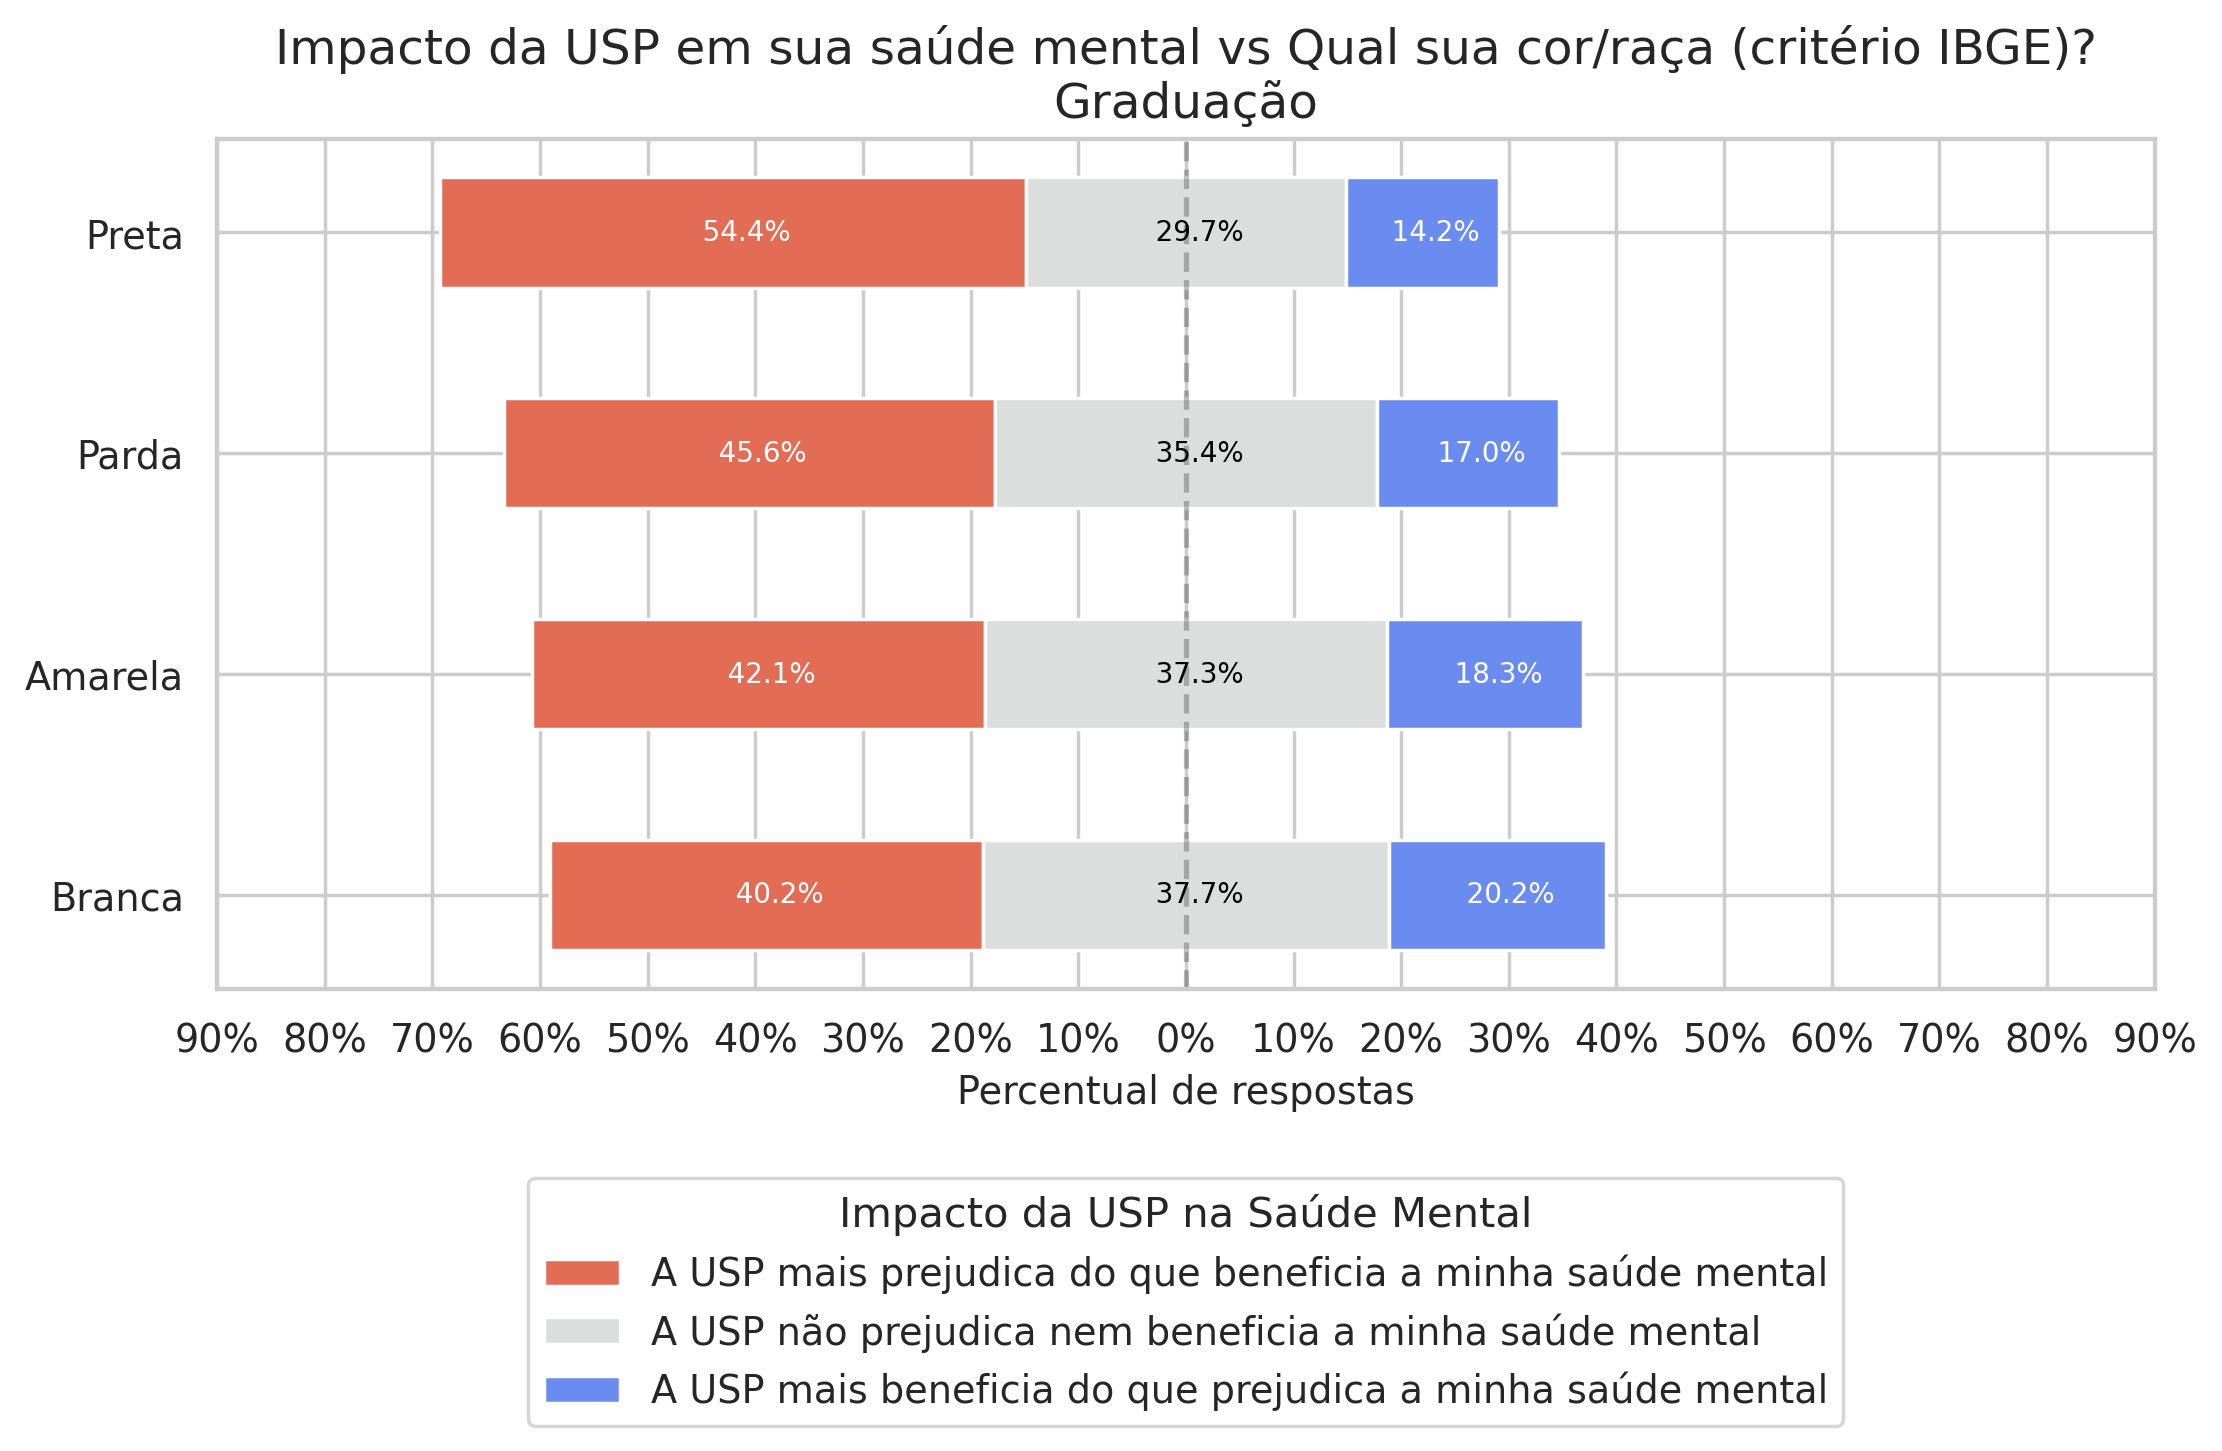

In [ ]:
df = tab_raca_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['preta', 'parda', 'indígena', 'amarela', 'branca'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['White']+['Black']+['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Impacto da USP em sua saúde mental vs Qual sua cor/raça (critério IBGE)?\nGraduação', fontsize=14)

ax.set_yticklabels(['Preta', 'Parda', 'Amarela', 'Branca'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual sua cor/raça (critério IBGE)'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  38.60829  0.010927

## Análise 12.  Impacto na saúde mental vs Nível educacional mais alto responsável 1? (graduação)

In [ ]:
# Dicionário de mapeamento para as substituições
mapeamento = {
    'Técnico em enfermagem': 'Ensino técnico completo',
    'Ensino Médio e Técnico de Nível Médio completos': 'Ensino técnico completo',
    'Ensino médio Completo e Nível Técnico': 'Ensino técnico completo',
    'Supletivo + Ensino Técnico ': 'Ensino técnico completo',
    'Ensino técnico completo': 'Ensino técnico completo',
    'Ensino técnico de enfermagem ': 'Ensino técnico completo',
    'Ensino Tecnico em Enfermagem': 'Ensino técnico completo',
    'Magisterio': 'Ensino técnico completo',
    'Até o ano passado, nível médio incompleto. Agora, depois de mais de 20 anos sem estudar, ensino médio completo - porquê incentivei a realização da prova do Encceja.': 'Ensino médio completo',
    'Minha mãe e responsável legal é graduada em farmácia. Minha vó, com quem moro, tem ensino fundamental incompleto.': 'Graduação completa',
    'Ensino superior completo': 'Graduação completa',
    'Livre-docência ': 'Doutorado completo',
    'Ensino superior incompleto': 'Graduação incompleta',
    'Graduação': 'Graduação completa',
    'Mestrado':'Mestrado completo',
    'Doutorado':'Doutorado completo',
    'Técnico' : 'Ensino técnico completo',
    'Não sei' : 'Não se aplica',
    'MInha mãe faleceu em 2019, eu tenho 58 anos de idade.' : 'Não se aplica'
}

df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'] = df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'].replace(mapeamento)

In [ ]:
tab_mae_grad1 = pd.crosstab(df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_mae_grad1 = tab_mae_grad1.reindex(index=['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'], columns=ordem_smental)

tab_mae_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                     121            
Ensino fundamental completo                                                                                                                        61            
Ensino médio incompleto                                                                                                                            51            
Ensino médio completo                                                                                                                             339            
Ensino técnico completo                                                                                                                             5            
Graduação incompleta                                                                                                                               88            
Graduação completa                                                                                                                                321            
Mestrado completo                                                                                                                                  30            
Doutorado completo                                                                                                                                 21            
Pós-graduação incompleta                                                                                                                           21            
Pós-graduação completa                                                                                                                            177            
Não frequentou escola                                                                                                                               7            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                      98                                                                     
Ensino fundamental completo                                                                                                                        51                                                                     
Ensino médio incompleto                                                                                                                            43                                                                     
Ensino médio completo                                                                                                                             251                                                                     
Ensino técnico completo                                                                                                                             2                                                                     
Graduação incompleta                                                                                                                               76                                                 

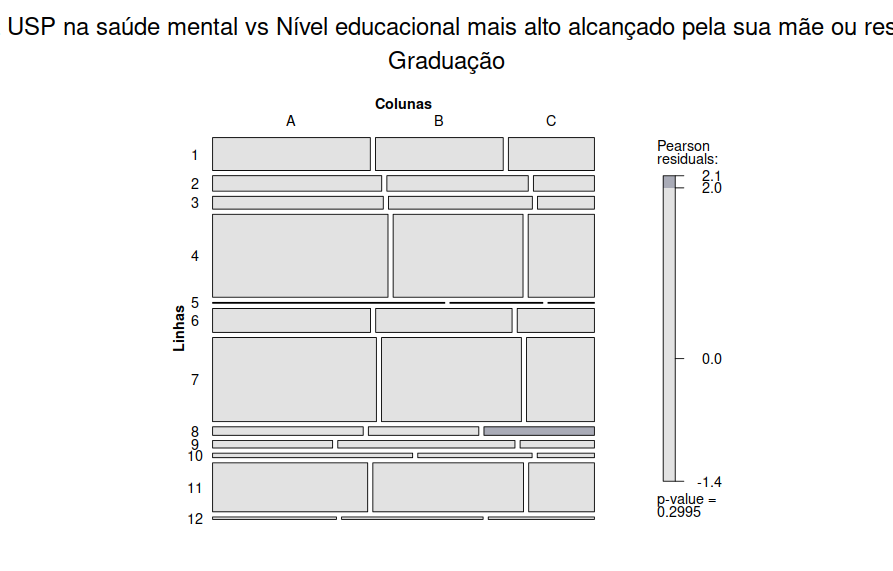

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

mudar aq

In [ ]:
tab_mae_grad = pd.crosstab(df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_mae_grad = tab_mae_grad.astype(float)
tab_mae_grad = tab_mae_grad.reindex(index=['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'], columns=ordem_smental)

tab_mae_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                0.418685            
Ensino fundamental completo                                                                                                                  0.438849            
Ensino médio incompleto                                                                                                                      0.439655            
Ensino médio completo                                                                                                                        0.466300            
Ensino técnico completo                                                                                                                      0.625000            
Graduação incompleta                                                                                                                         0.421053            
Graduação completa                                                                                                                           0.430295            
Mestrado completo                                                                                                                            0.394737            
Doutorado completo                                                                                                                           0.323077            
Pós-graduação incompleta                                                                                                                     0.525000            
Pós-graduação completa                                                                                                                       0.410673            
Não frequentou escola                                                                                                                        0.318182            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                0.339100                                                                     
Ensino fundamental completo                                                                                                                  0.366906                                                                     
Ensino médio incompleto                                                                                                                      0.370690                                                                     
Ensino médio completo                                                                                                                        0.345254                                                                     
Ensino técnico completo                                                                                                                      0.250000                                                                     
Graduação incompleta                                                                                                                         0.363636                                                 

/tmp/ipykernel_12033/713871517.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Ensino fundamental incompleto',


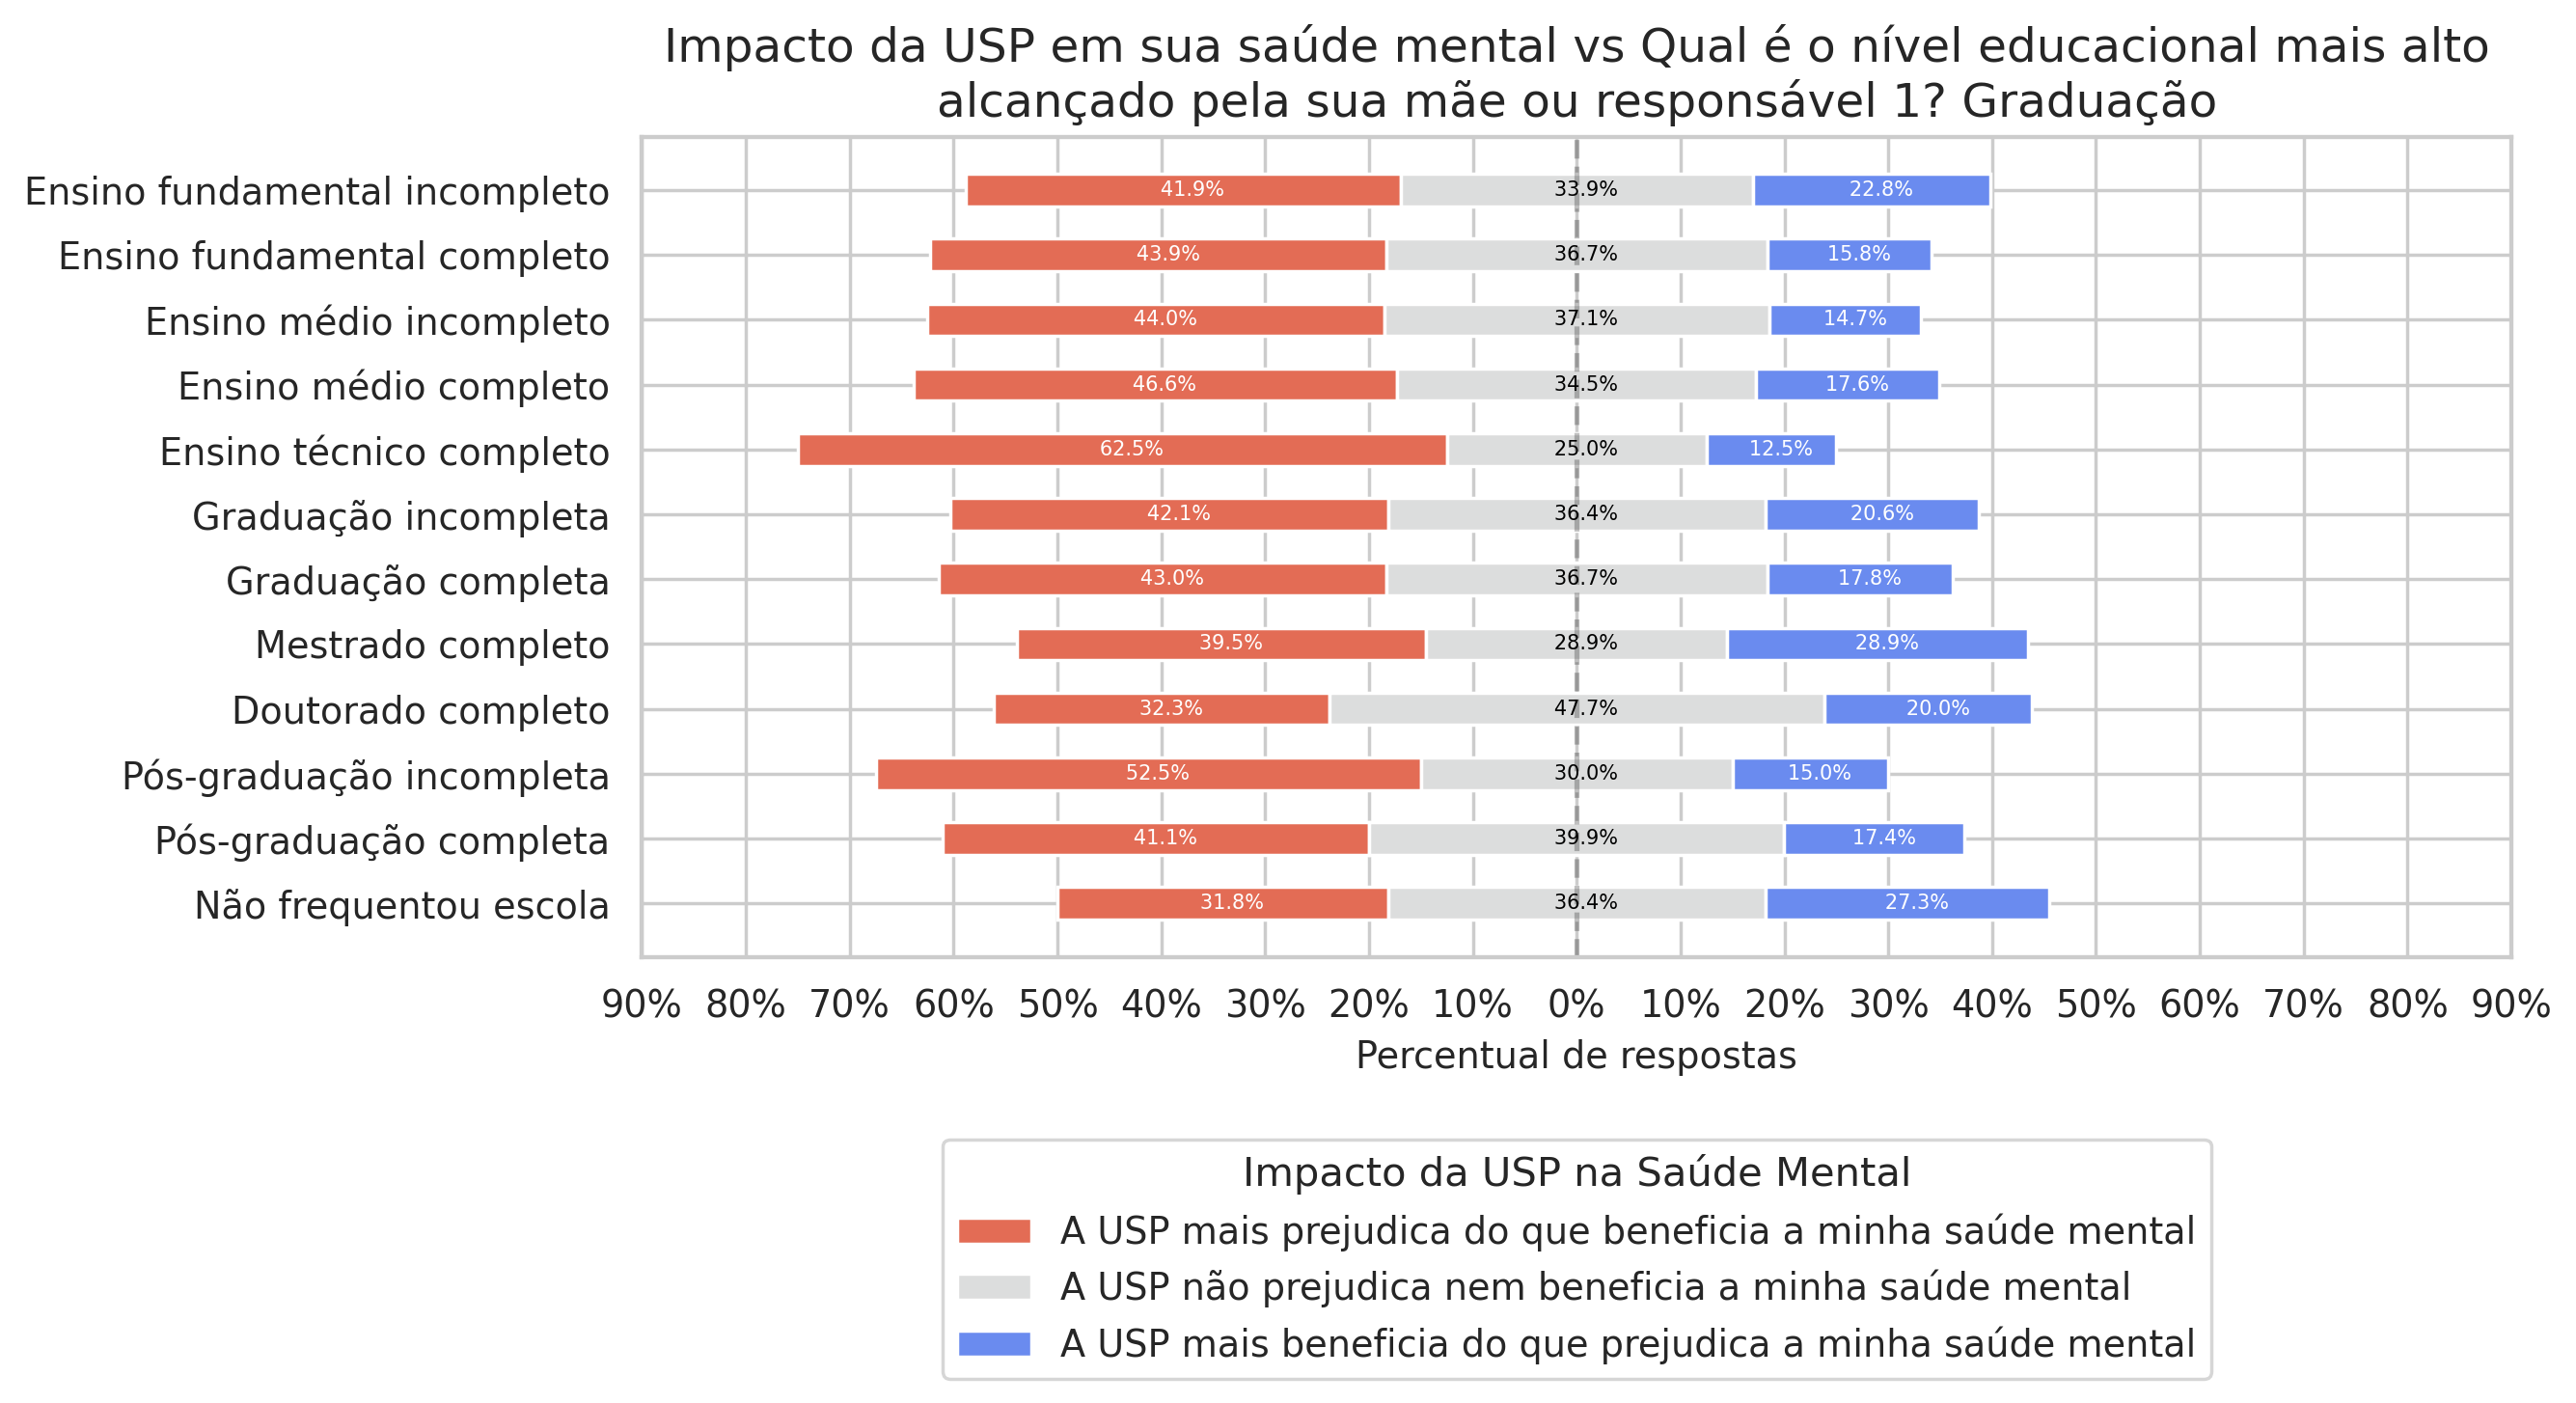

In [ ]:
df = tab_mae_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['White']+['Black']+['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=6)

ax.set_title('Impacto da USP em sua saúde mental vs Qual é o nível educacional mais alto\nalcançado pela sua mãe ou responsável 1? Graduação', fontsize=14)

ax.set_yticklabels(['Ensino fundamental incompleto',
 'Ensino fundamental completo',
 'Ensino médio incompleto',
 'Ensino médio completo',
 'Ensino técnico completo',
 'Graduação incompleta',
 'Graduação completa',
 'Mestrado completo',
 'Doutorado completo',
 'Pós-graduação incompleta',
 'Pós-graduação completa',
 'Não frequentou escola'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é o nível educacional mais alto alcançado pela sua mãe ou responsável 1? Assinale aquela que mais se adequa.'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2   p-Valor
Considerando o impacto da USP em sua saúde ment...  39.107202  0.332044

## Análise 13. Impacto na saúde mental vs Nível educacional mais alto responsável 2? (graduação)


In [ ]:
# Dicionário de mapeamento para as substituições
mapeamento = {
    'Técnico em enfermagem': 'Ensino técnico completo',
    'Ensino Médio e Técnico de Nível Médio completos': 'Ensino técnico completo',
    'Ensino médio Completo e Nível Técnico': 'Ensino técnico completo',
    'Supletivo + Ensino Técnico ': 'Ensino técnico completo',
    'Ensino técnico completo': 'Ensino técnico completo',
    'Ensino técnico de enfermagem ': 'Ensino técnico completo',
    'Ensino Tecnico em Enfermagem': 'Ensino técnico completo',
    'Magisterio': 'Ensino técnico completo',
    'Até o ano passado, nível médio incompleto. Agora, depois de mais de 20 anos sem estudar, ensino médio completo - porquê incentivei a realização da prova do Encceja.': 'Ensino médio completo',
    'Minha mãe e responsável legal é graduada em farmácia. Minha vó, com quem moro, tem ensino fundamental incompleto.': 'Graduação completa',
    'Ensino superior completo': 'Graduação completa',
    'Livre-docência ': 'Doutorado completo',
    'Ensino superior incompleto': 'Graduação incompleta',
    'Graduação': 'Graduação completa',
    'Mestrado':'Mestrado completo',
    'Doutorado':'Doutorado completo',
    'Técnico' : 'Ensino técnico completo',
    'Não sei' : 'Não se aplica',
    'Livre-docência' : 'Doutorado completo',
    'Ensino técnico' : 'Ensino técnico completo',
    'Residência de Urologia' : 'Graduação completa',
    'Alfabetização/mobral' : 'Ensino fundamental incompleto',
    'Ensino Técnico completo ' : 'Ensino técnico completo',
    'Técnico ' : 'Ensino técnico completo',
    'cursando ensino superior' : 'Ensino médio completo',
    'Nível médio e técnico ' : 'Ensino médio completo',
    'Ensino Técnico' : 'Ensino técnico completo',
    'Técnico em Enfermagem' : 'Ensino técnico completo',
    'Ensino Técnico ' : 'Ensino técnico completo',
    'Ensino técnico ' : 'Ensino técnico completo',
    '.' : 'Não se aplica',
    'minha avó morreu mas ela tinha o médio incompleto ' : 'Ensino médio incompleto',
    'Ensino técnico completo ' : 'Ensino técnico completo',
    'Mue pai faleceu em 2014, eu tenho 58 anos de idade.' : 'Não se aplica'
}

df_graduacao['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'] = df_graduacao['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'].replace(mapeamento)

In [ ]:
tab_pai_grad1 = pd.crosstab(df_graduacao['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])
tab_pai_grad1 = tab_pai_grad1.reindex(index=['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'], columns=ordem_smental)

tab_pai_grad1

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                     178            
Ensino fundamental completo                                                                                                                        59            
Ensino médio incompleto                                                                                                                            48            
Ensino médio completo                                                                                                                             320            
Ensino técnico completo                                                                                                                             3            
Graduação incompleta                                                                                                                               94            
Graduação completa                                                                                                                                278            
Mestrado completo                                                                                                                                  34            
Doutorado completo                                                                                                                                 21            
Pós-graduação incompleta                                                                                                                           12            
Pós-graduação completa                                                                                                                            125            
Não frequentou escola                                                                                                                              11            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                     143                                                                     
Ensino fundamental completo                                                                                                                        52                                                                     
Ensino médio incompleto                                                                                                                            47                                                                     
Ensino médio completo                                                                                                                             249                                                                     
Ensino técnico completo                                                                                                                             6                                                                     
Graduação incompleta                                                                                                                               58                                                 

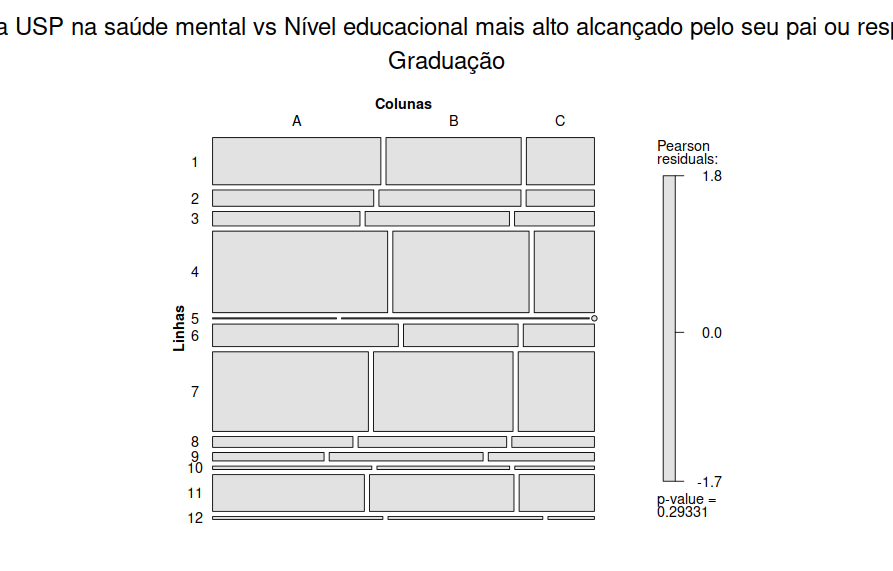

**Linhas** | **Colunas**
---|---|
1: Sim, e afetou meu bem-estar e/ou minhas atividades na USP.| A: A USP mais prejudica do que beneficia a minha saúde mental
2: Sim, mas não afetou meu bem-estar ou minhas atividades na USP. | B:	A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau
3: Não | C: A USP mais beneficia do que prejudica a minha saúde mental

mudar aq

In [ ]:
tab_pai_grad = pd.crosstab(df_graduacao['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'], normalize = 'index')
tab_pai_grad = tab_pai_grad.astype(float)
tab_pai_grad = tab_pai_grad.reindex(index=['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'], columns=ordem_smental)

tab_pai_grad

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP mais prejudica do que beneficia a minha saúde mental  \
Qual é o nível educacional mais alto alcançado ...                                                                                                               
Ensino fundamental incompleto                                                                                                                0.445000            
Ensino fundamental completo                                                                                                                  0.433824            
Ensino médio incompleto                                                                                                                      0.396694            
Ensino médio completo                                                                                                                        0.465116            
Ensino técnico completo                                                                                                                      0.333333            
Graduação incompleta                                                                                                                         0.484536            
Graduação completa                                                                                                                           0.407625            
Mestrado completo                                                                                                                            0.377778            
Doutorado completo                                                                                                                           0.295775            
Pós-graduação incompleta                                                                                                                     0.400000            
Pós-graduação completa                                                                                                                       0.404531            
Não frequentou escola                                                                                                                        0.423077            

Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?  A USP não prejudica nem beneficia a minha saúde mental, ou prejudica e beneficia a minha saúde mental em mesmo grau  \
Qual é o nível educacional mais alto alcançado ...                                                                                                                                                                        
Ensino fundamental incompleto                                                                                                                0.357500                                                                     
Ensino fundamental completo                                                                                                                  0.382353                                                                     
Ensino médio incompleto                                                                                                                      0.388430                                                                     
Ensino médio completo                                                                                                                        0.361919                                                                     
Ensino técnico completo                                                                                                                      0.666667                                                                     
Graduação incompleta                                                                                                                         0.298969                                                 

/tmp/ipykernel_12033/1129169581.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Ensino fundamental incompleto',


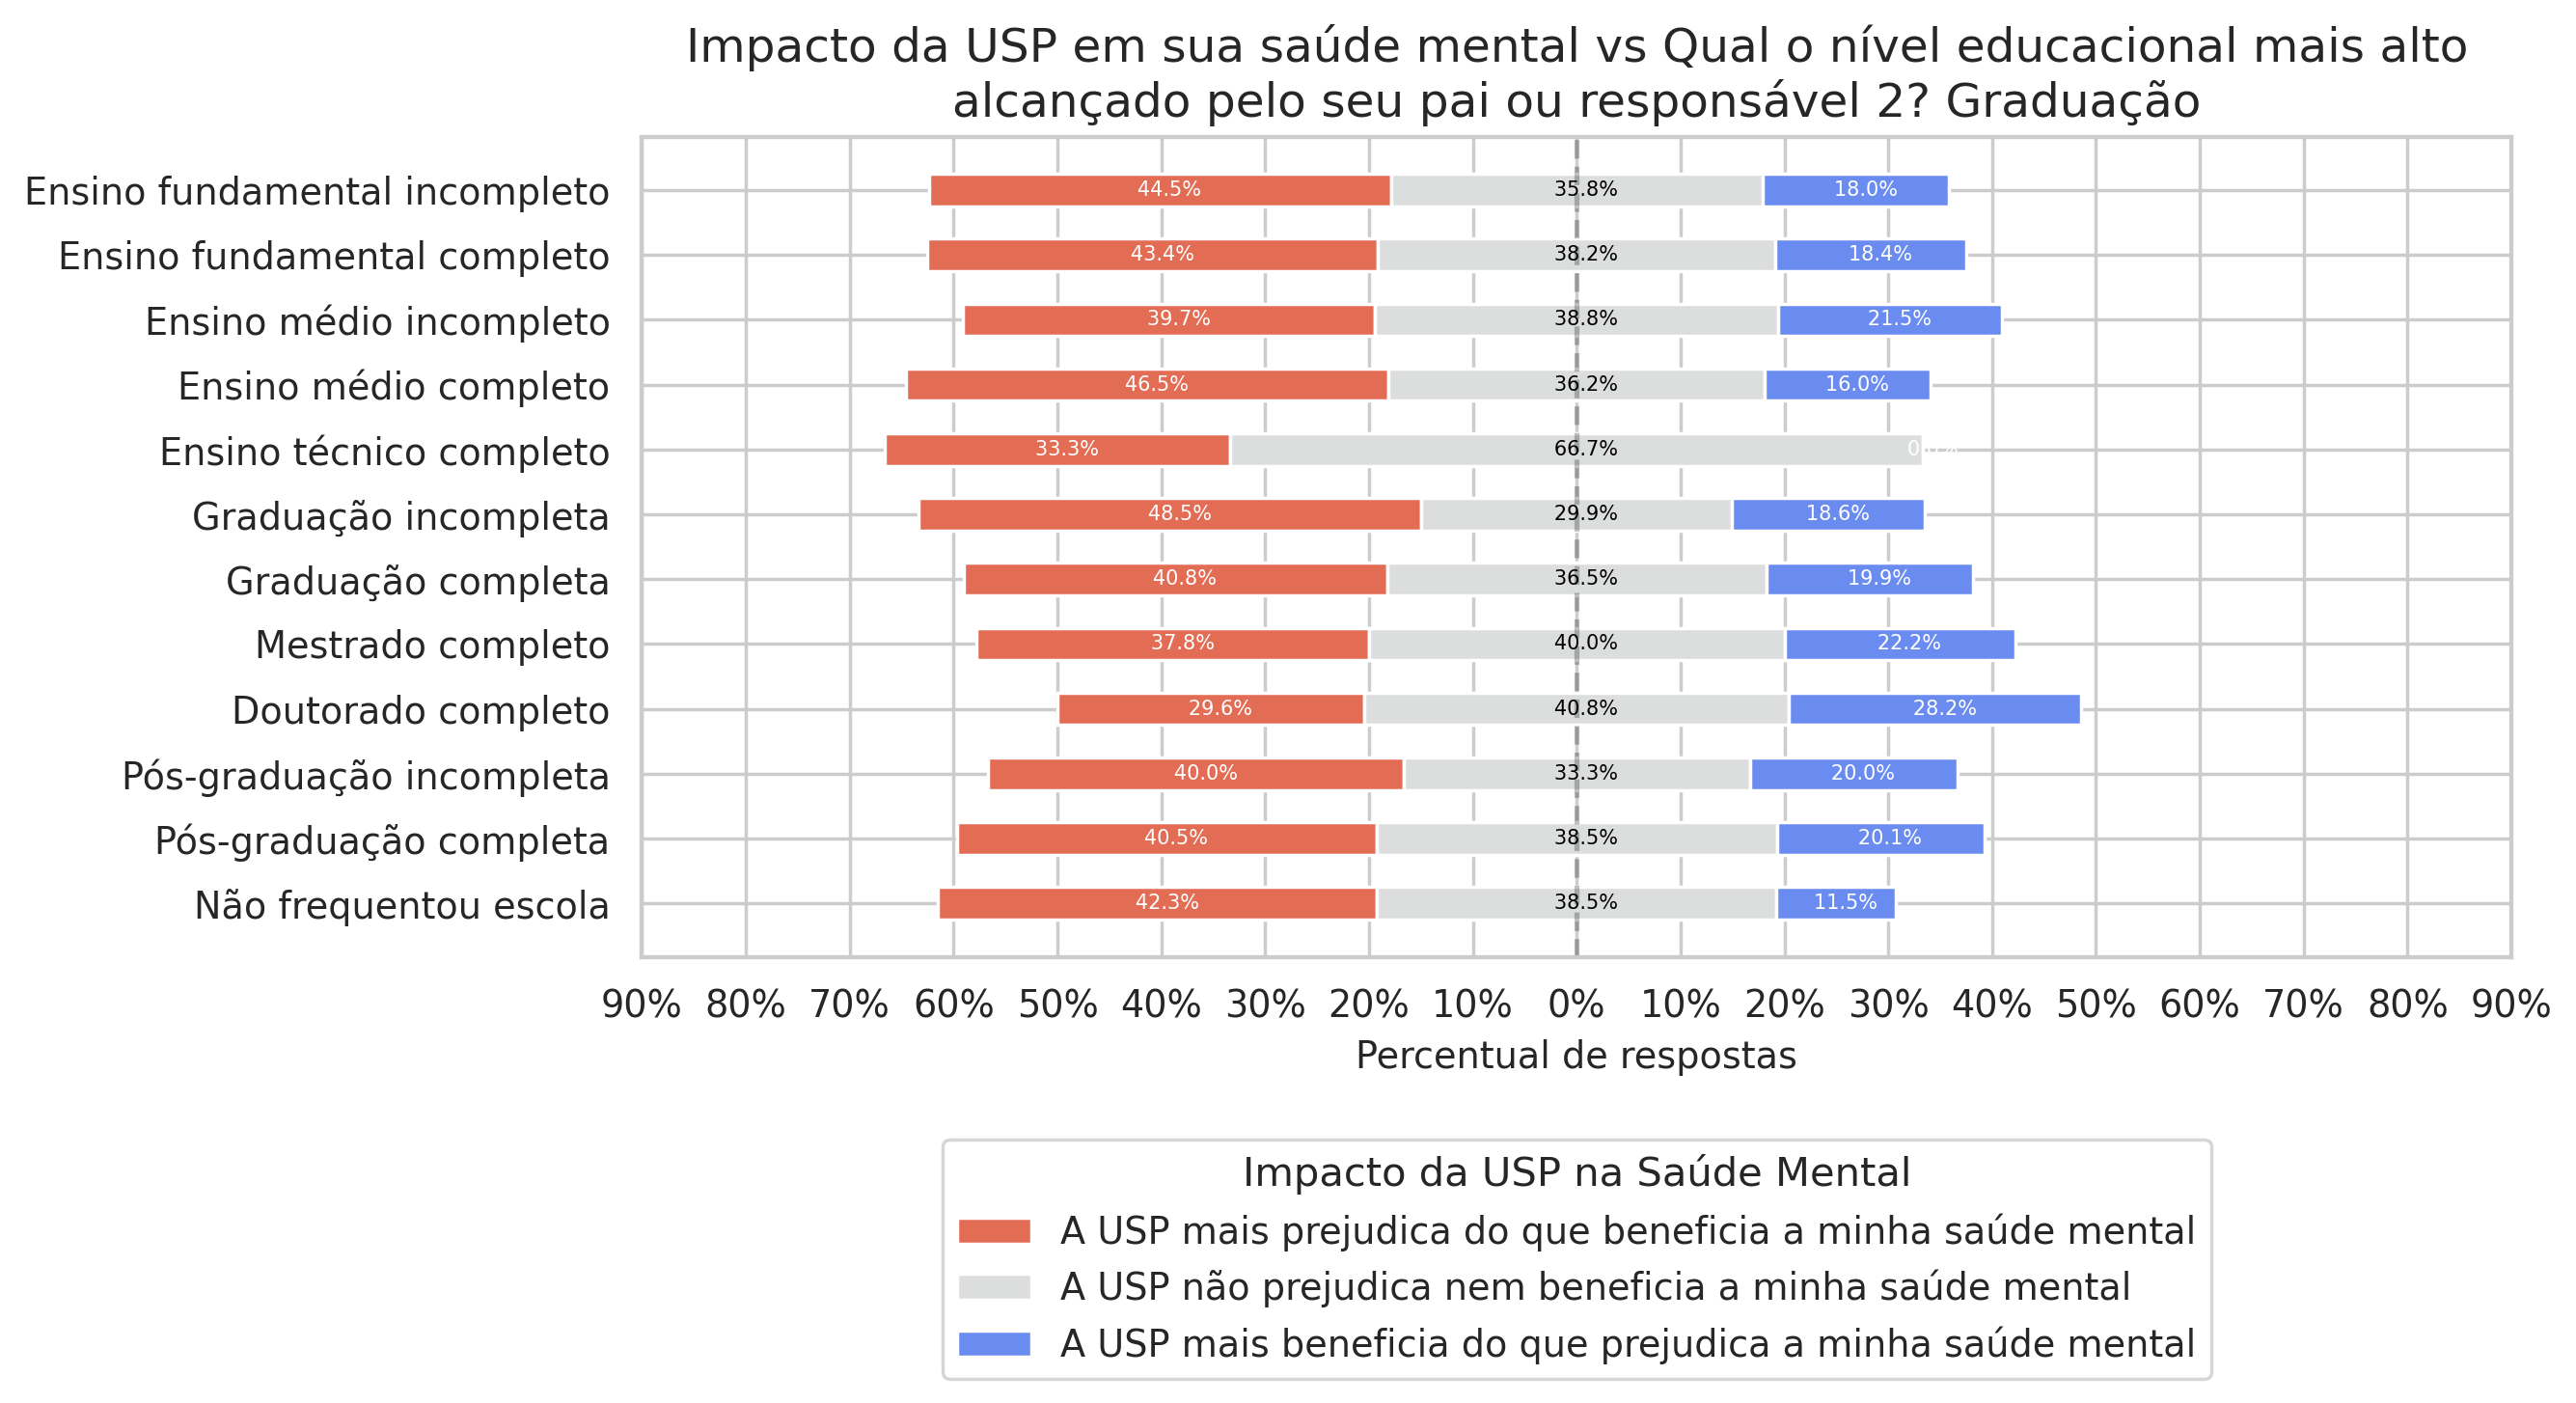

In [ ]:
df = tab_pai_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'].index(x[0])))


category_names = ['A USP mais prejudica do que beneficia a minha saúde mental', 'A USP não prejudica nem beneficia a minha saúde mental', 'A USP mais beneficia do que prejudica a minha saúde mental']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['White']+['Black']+['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"   {x*100:.1f}%", color=color, fontsize=6)

ax.set_title('Impacto da USP em sua saúde mental vs Qual o nível educacional mais alto\nalcançado pelo seu pai ou responsável 2? Graduação', fontsize=14)

ax.set_yticklabels(['Ensino fundamental incompleto',
'Ensino fundamental completo',
'Ensino médio incompleto',
'Ensino médio completo',
'Ensino técnico completo',
'Graduação incompleta',
'Graduação completa',
'Mestrado completo',
'Doutorado completo',
'Pós-graduação incompleta',
'Pós-graduação completa',
'Não frequentou escola'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é o nível educacional mais alto alcançado pelo seu pai ou responsável 2? Assinale aquela que mais se adequa.'], df_graduacao['Considerando o impacto da USP em sua saúde mental, qual das afirmações faz mais sentido para você?'])

Qui2  p-Valor
Considerando o impacto da USP em sua saúde ment...  55.081256  0.02182

# Análises gênero

In [ ]:

dicionario = {'Mulher cis (pessoa que nasceu com sexo feminino e se identifica com o gênero feminino)': 'Gênero Feminino',
              'Homem cis (pessoa que nasceu com sexo masculino e se identifica com o gênero masculino)': 'Gênero Masculino',
              'Homem trans (pessoa que nasceu com características sexuais femininas e se identifica com o gênero masculino)': 'Gênero Masculino',
              'Mulher trans (pessoa que nasceu com características sexuais masculinas e se identifica com o gênero feminino)': 'Gênero Feminino'}

generos_desejados = ['Gênero Feminino', 'Gênero Masculino']

df_graduacao['Qual é sua identidade de gênero?'].replace(dicionario, inplace=True)

# Filtrar DataFrame
df_graduacao = df_graduacao[df_graduacao['Qual é sua identidade de gênero?'].isin(generos_desejados)]


## Análise 14. Difusão de informações institucionais e decisões tomadas nos órgãos colegiados

In [ ]:
ordem = [ '1 nada adequada', '2','3', '4', '5 muito adequada']

In [ ]:
ordem_exp_hostis = ['Sim, e afetou meu bem-estar e/ou minhas atividades na USP.','Sim, mas não afetou meu bem-estar ou minhas atividades na USP.','Não']

In [ ]:
tab_difusao_grad1 = pd.crosstab(df_graduacao['Difusão de informações institucionais e decisões tomadas nos órgãos colegiados'], df_graduacao['Qual é sua identidade de gênero?'])
tab_difusao_grad1 = tab_difusao_grad1.reindex(index=ordem)#, columns=ordem_saude_mental)

tab_difusao_grad1


Qual é sua identidade de gênero?                    Gênero Feminino  \
Difusão de informações institucionais e decisõe...                    
1 nada adequada                                                 138   
2                                                               327   
3                                                               629   
4                                                               372   
5 muito adequada                                                149   

Qual é sua identidade de gênero?                    Gênero Masculino  
Difusão de informações institucionais e decisõe...                    
1 nada adequada                                                  110  
2                                                                256  
3                                                                434  
4                                                                339  
5 muito adequada                                                 122

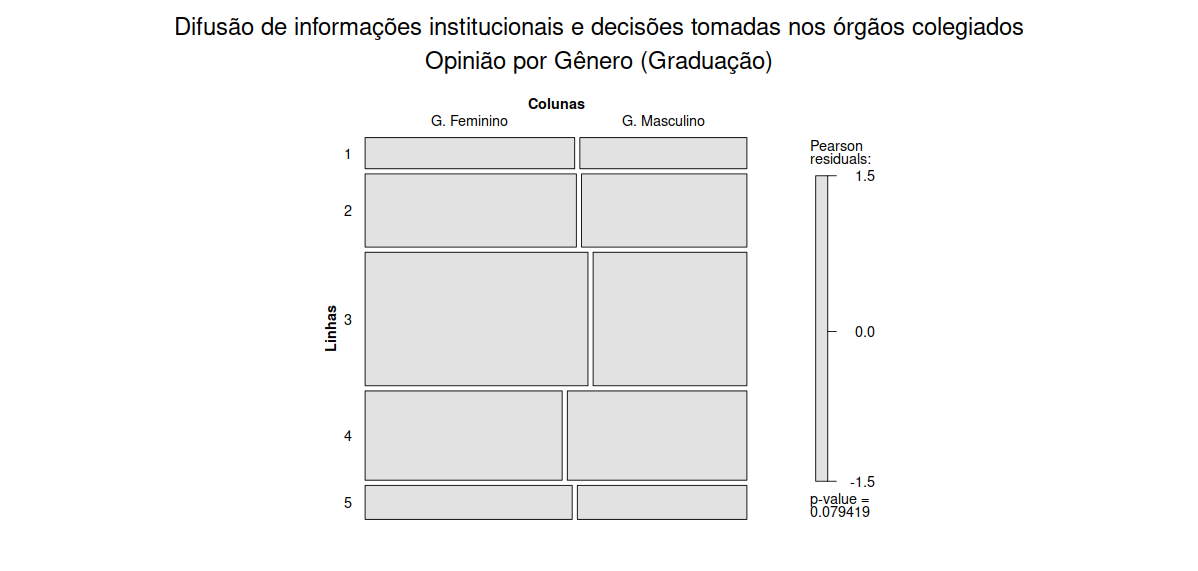

In [ ]:
tab_difusao_grad = pd.crosstab(df_graduacao['Qual é sua identidade de gênero?'], df_graduacao['Difusão de informações institucionais e decisões tomadas nos órgãos colegiados'], normalize = 'index')
tab_difusao_grad = tab_difusao_grad.astype(float)
#tabcruzada_a33 = tabcruzada_a33 .reindex(index)#, columns=ordem_saude_mental)

tab_difusao_grad


Difusão de informações institucionais e decisões tomadas nos órgãos colegiados  1 nada adequada  \
Qual é sua identidade de gênero?                                                                  
Gênero Feminino                                                                        0.085449   
Gênero Masculino                                                                       0.087232   

Difusão de informações institucionais e decisões tomadas nos órgãos colegiados         2  \
Qual é sua identidade de gênero?                                                           
Gênero Feminino                                                                 0.202477   
Gênero Masculino                                                                0.203013   

Difusão de informações institucionais e decisões tomadas nos órgãos colegiados         3  \
Qual é sua identidade de gênero?                                                           
Gênero Feminino                                                                 0.389474   
Gênero Masculino                                                                0.344171   

Difusão de informações institucionais e decisões tomadas nos órgãos colegiados         4  \
Qual é sua identidade de gênero?                                                           
Gênero Feminino                                                                 0.230341   
Gênero Masculino                                                                0.268834   

Difusão de informações institucionais e decisões tomadas nos órgãos colegiados  5 muito adequada  
Qual é sua identidade de gênero?                                                                  
Gênero Feminino                                                                         0.092260  
Gênero Masculino                                                                        0.096749

In [ ]:
for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)
cores2 = ['salmon', 'cornflowerblue']

/tmp/ipykernel_12033/3625849053.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])


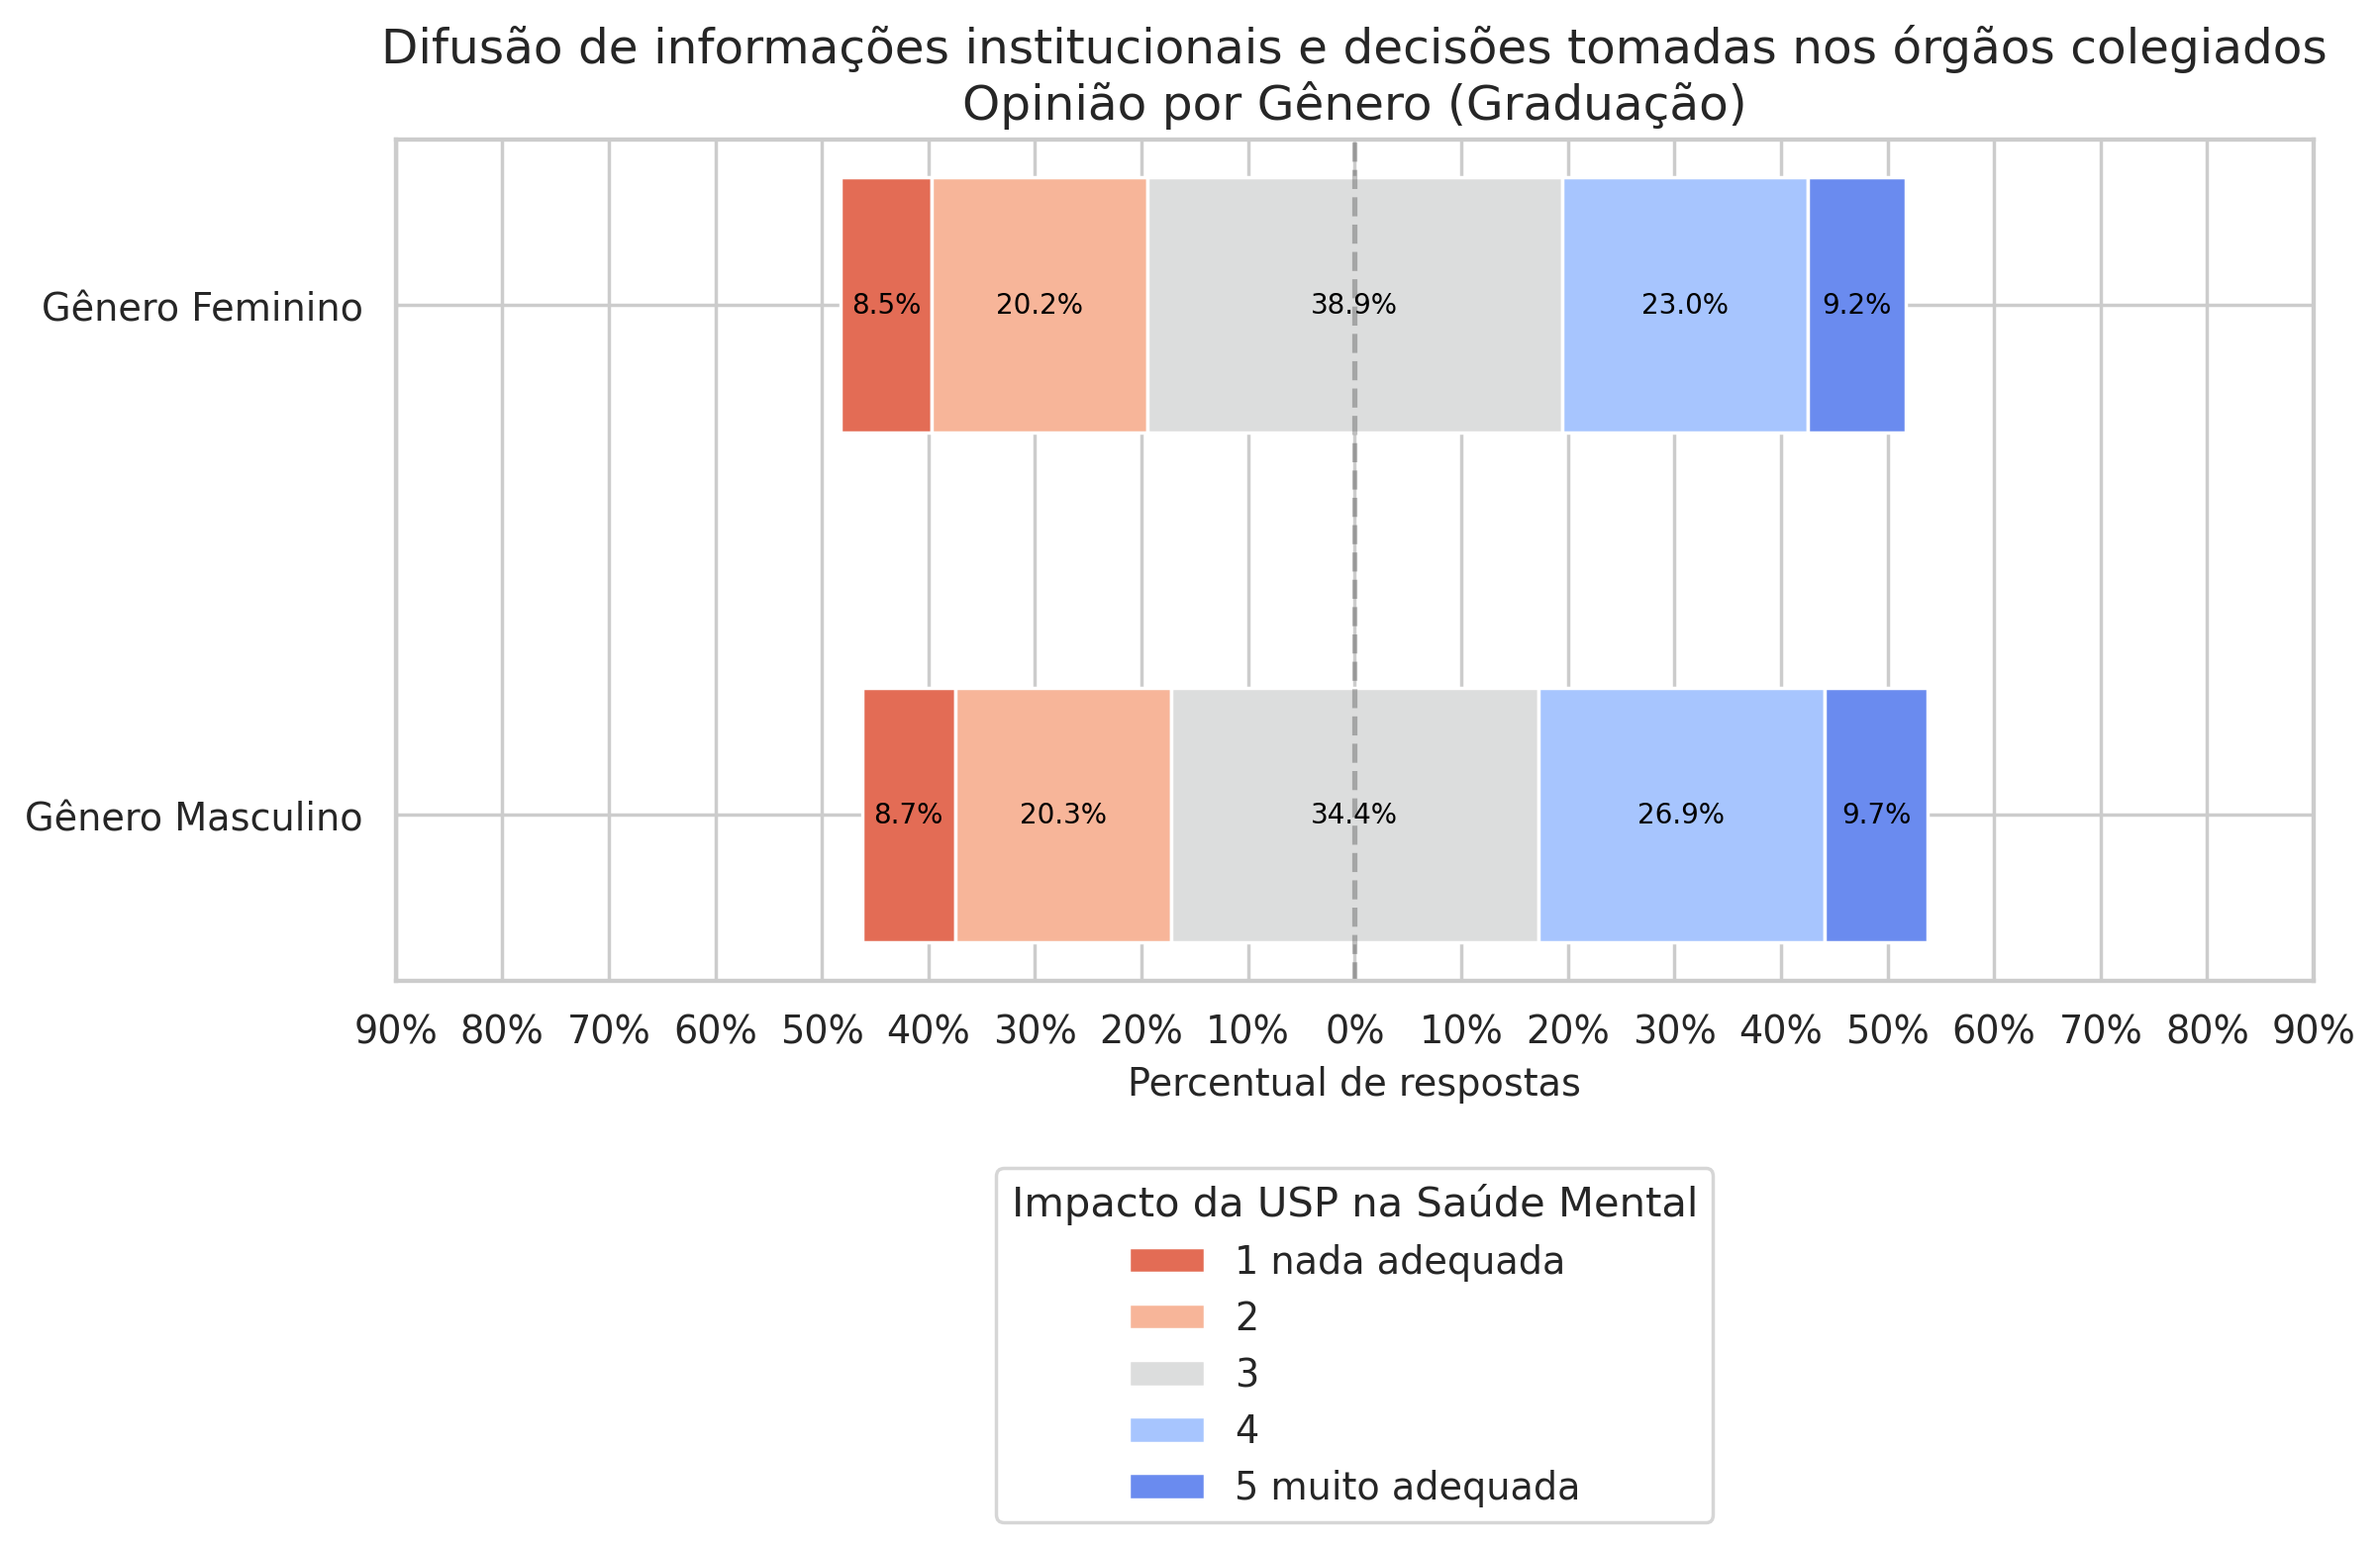

In [ ]:
df = tab_difusao_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Gênero Feminino', 'Gênero Masculino'].index(x[0])))


category_names = ['1 nada adequada', '2','3', '4', '5 muito adequada']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['Black']+['Black']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Difusão de informações institucionais e decisões tomadas nos órgãos colegiados\nOpinião por Gênero (Graduação)', fontsize=14)

ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

## Análise 15. Clareza nas decisões tomadas pela USP

In [ ]:
tab_clareza_grad1 = pd.crosstab(df_graduacao['Clareza nas decisões tomadas pela USP'], df_graduacao['Qual é sua identidade de gênero?'])

tab_clareza_grad1

Qual é sua identidade de gênero?       Gênero Feminino  Gênero Masculino
Clareza nas decisões tomadas pela USP                                   
1 nada adequada                                    190               163
2                                                  430               296
3                                                  536               426
4                                                  340               270
5 muito adequada                                   119               106

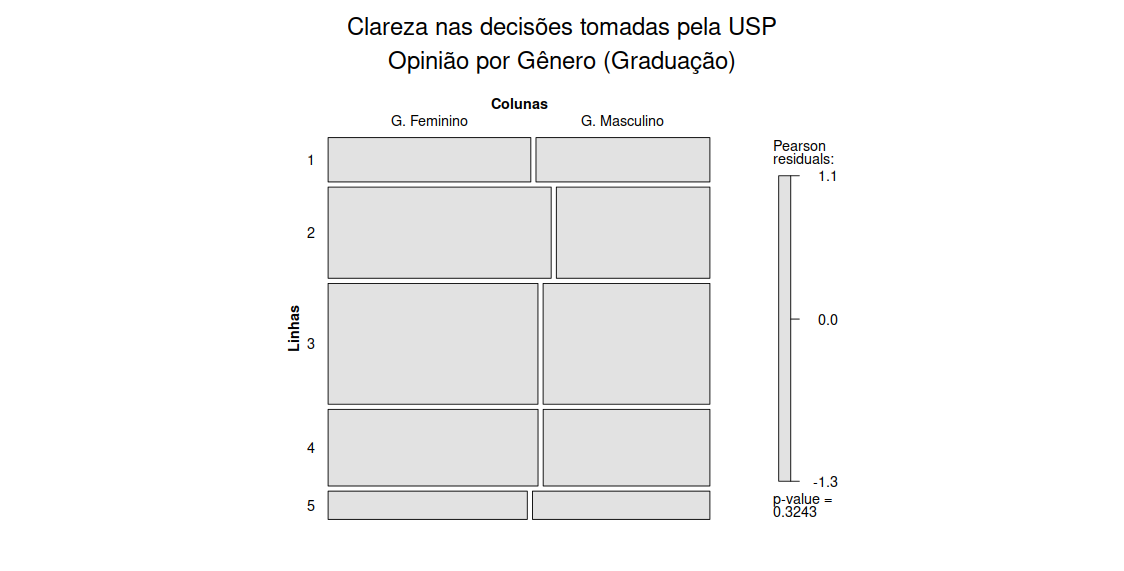

In [ ]:
tab_clareza_grad = pd.crosstab(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Clareza nas decisões tomadas pela USP'], normalize = 'index')
tab_clareza_grad = tab_clareza_grad.astype(float)

tab_clareza_grad

Clareza nas decisões tomadas pela USP  1 nada adequada         2         3  \
Qual é sua identidade de gênero?                                             
Gênero Feminino                               0.117647  0.266254  0.331889   
Gênero Masculino                              0.129262  0.234734  0.337827   

Clareza nas decisões tomadas pela USP         4  5 muito adequada  
Qual é sua identidade de gênero?                                   
Gênero Feminino                        0.210526          0.073684  
Gênero Masculino                       0.214116          0.084060

/tmp/ipykernel_12033/2223808885.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])


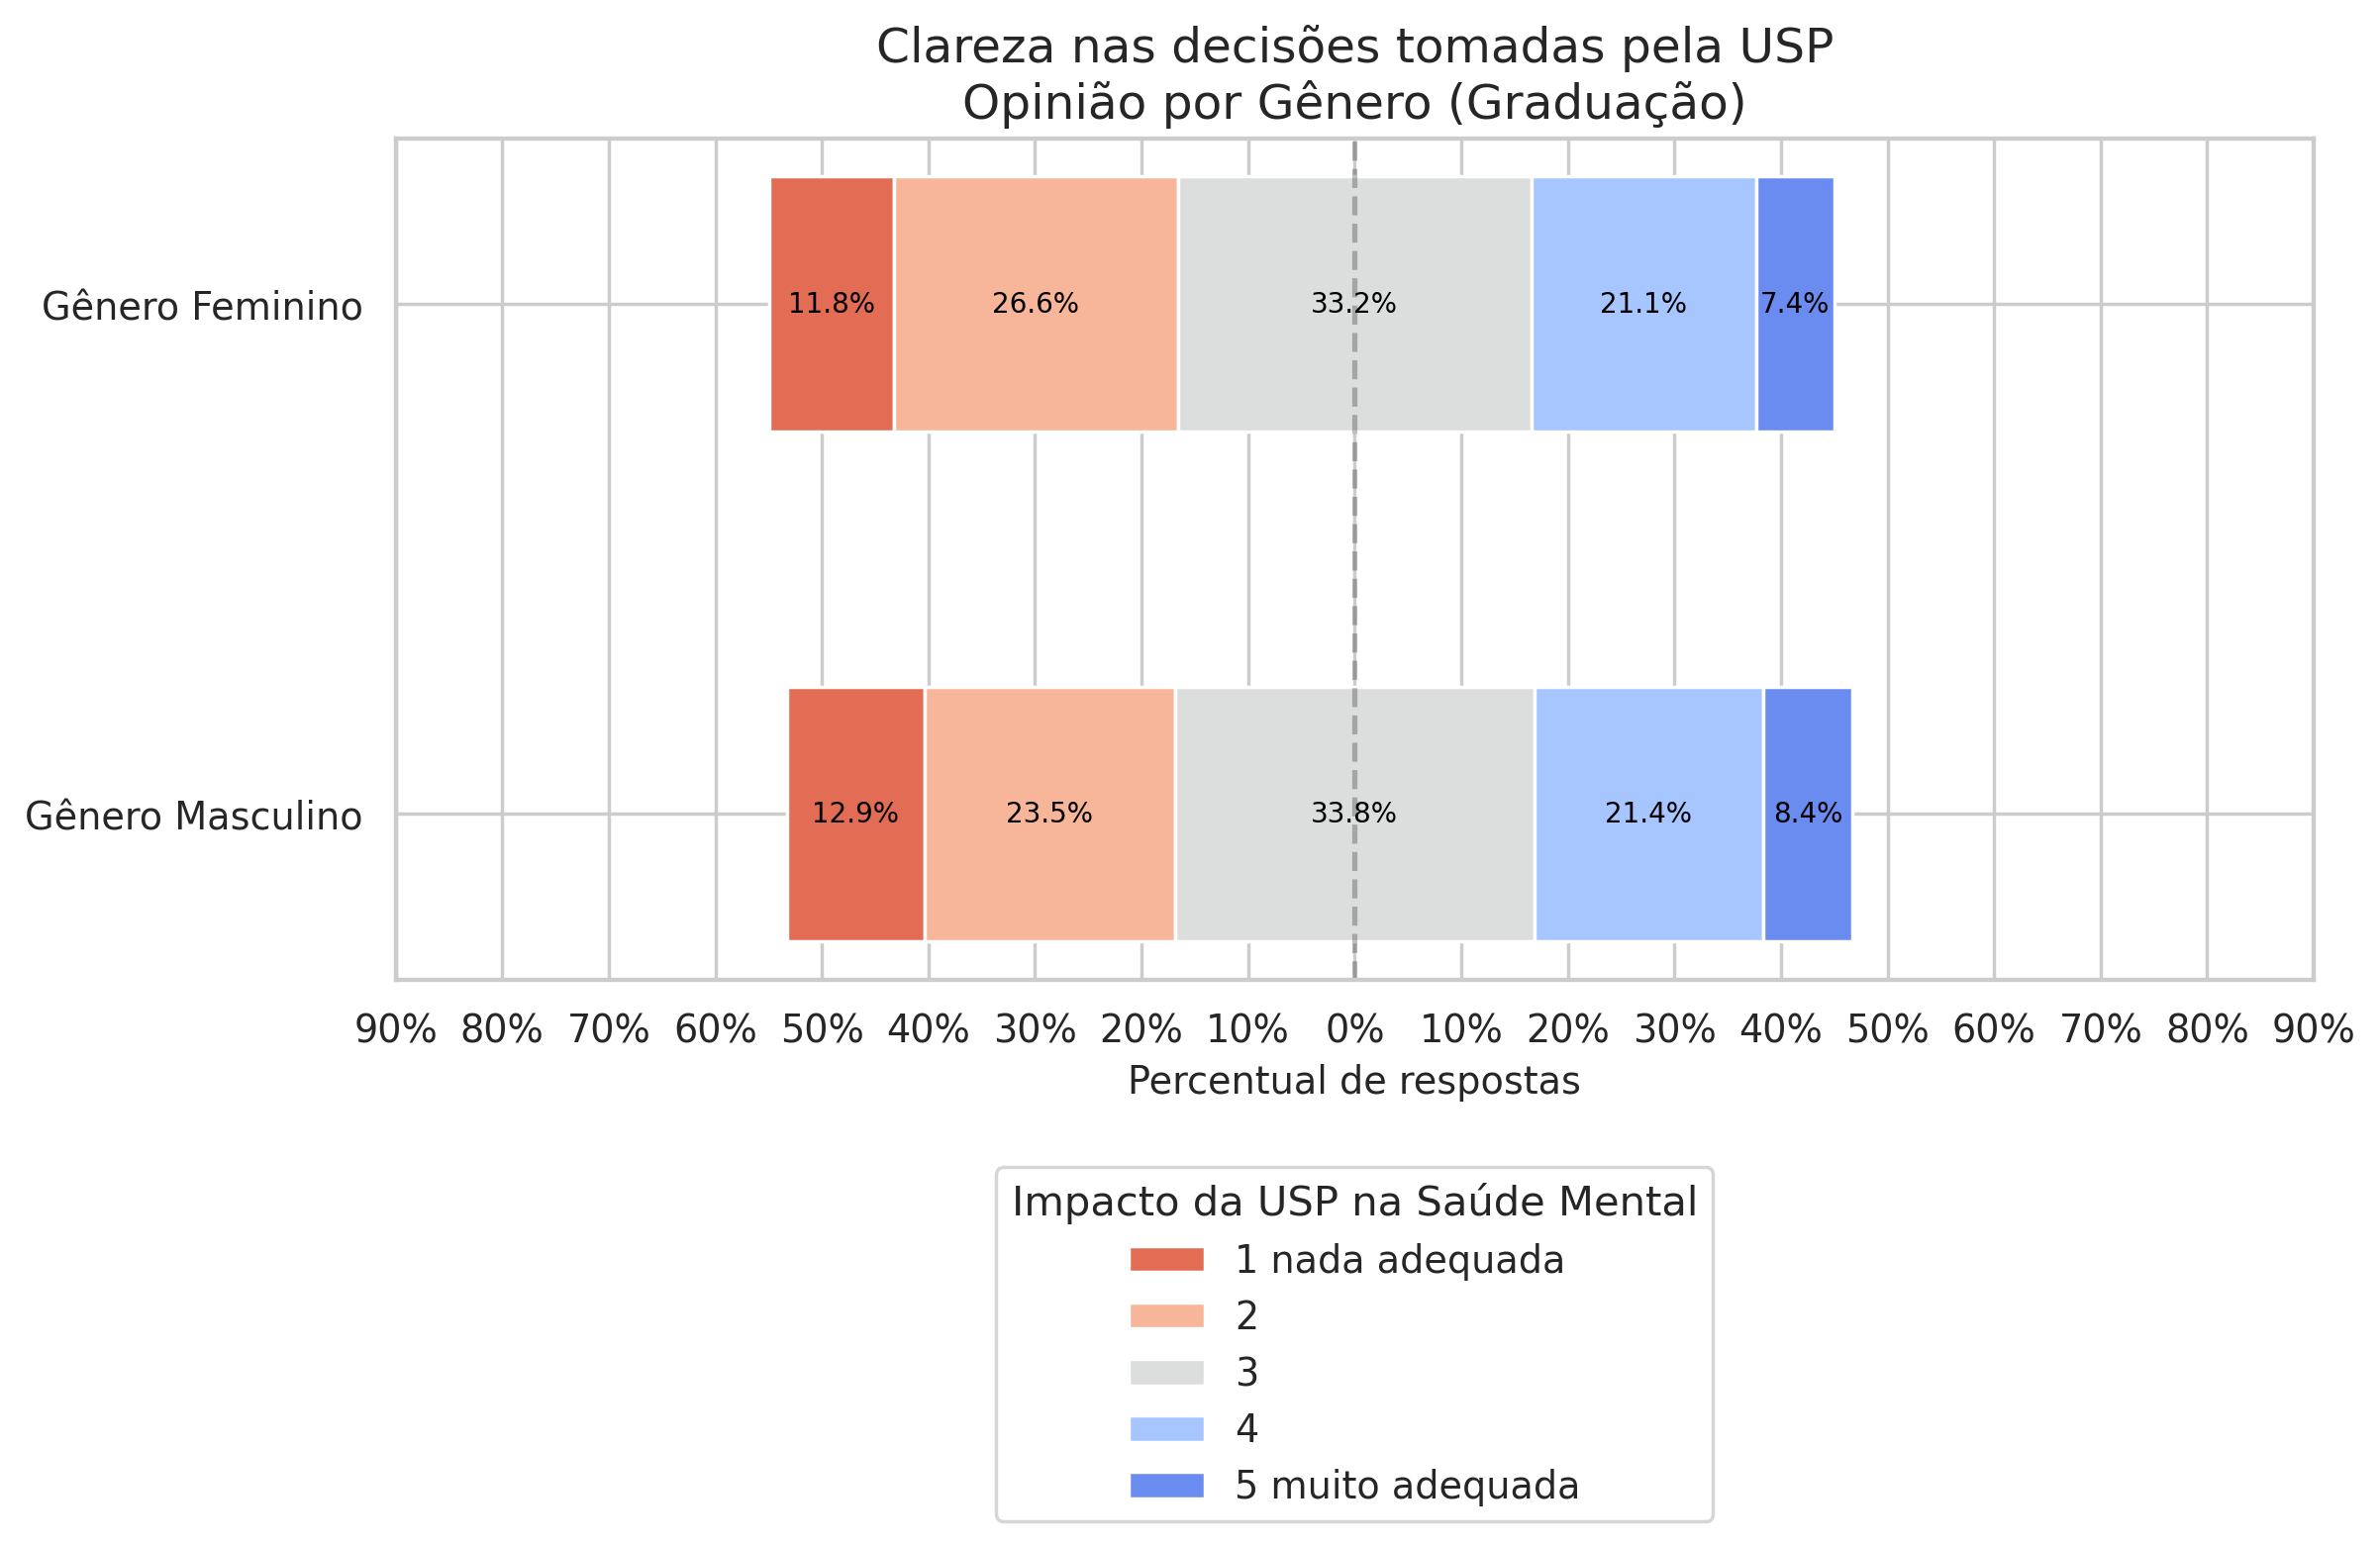

In [ ]:
df = tab_clareza_grad.copy()
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Gênero Feminino', 'Gênero Masculino'].index(x[0])))


category_names = ['1 nada adequada', '2','3', '4', '5 muito adequada']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['Black']+['Black']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)
ax.set_title('Clareza nas decisões tomadas pela USP\nOpinião por Gênero (Graduação)', fontsize=14)

ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()


In [ ]:
qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Clareza nas decisões tomadas pela USP'])

Qui2   p-Valor
Clareza nas decisões tomadas pela USP  4.657342  0.324296

## Análise 16: Clareza nas comunicações internas da USP

In [ ]:
tab_clarezacomunicacao_grad1 = pd.crosstab(df_graduacao['Clareza nas comunicações internas da USP'], df_graduacao['Qual é sua identidade de gênero?'])


tab_clarezacomunicacao_grad1

Qual é sua identidade de gênero?          Gênero Feminino  Gênero Masculino
Clareza nas comunicações internas da USP                                   
1 nada adequada                                       154               133
2                                                     408               241
3                                                     521               424
4                                                     400               329
5 muito adequada                                      132               134

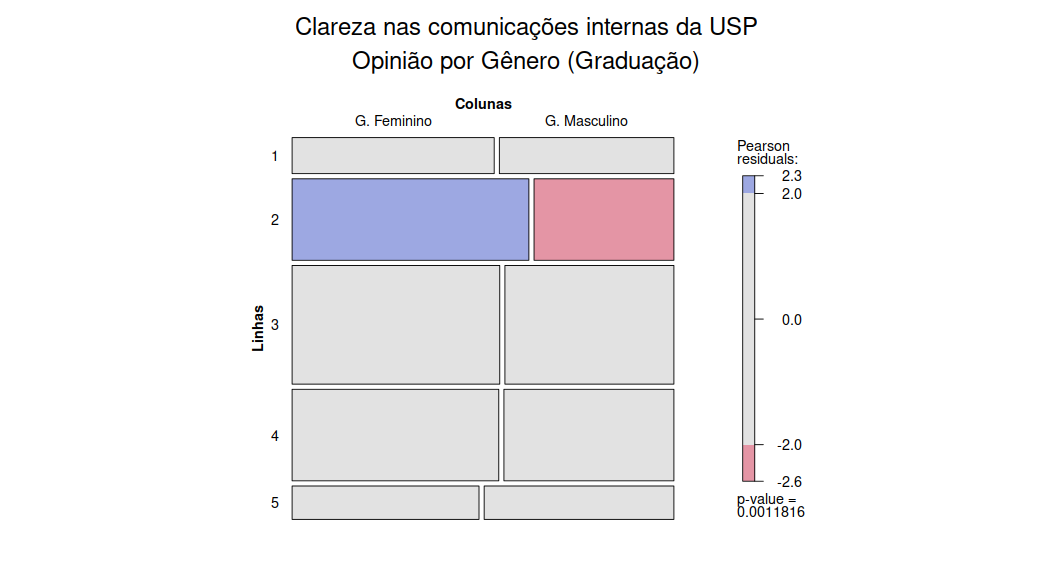

In [ ]:
tab_clarezacomunicacao_grad = pd.crosstab(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Clareza nas comunicações internas da USP'], normalize = 'index')
tab_clarezacomunicacao_grad = tab_clarezacomunicacao_grad.astype(float)

tab_clarezacomunicacao_grad

Clareza nas comunicações internas da USP  1 nada adequada         2         3  \
Qual é sua identidade de gênero?                                                
Gênero Feminino                                  0.095356  0.252632  0.322601   
Gênero Masculino                                 0.105472  0.191118  0.336241   

Clareza nas comunicações internas da USP         4  5 muito adequada  
Qual é sua identidade de gênero?                                      
Gênero Feminino                           0.247678          0.081734  
Gênero Masculino                          0.260904          0.106265

/tmp/ipykernel_12033/2064544626.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])


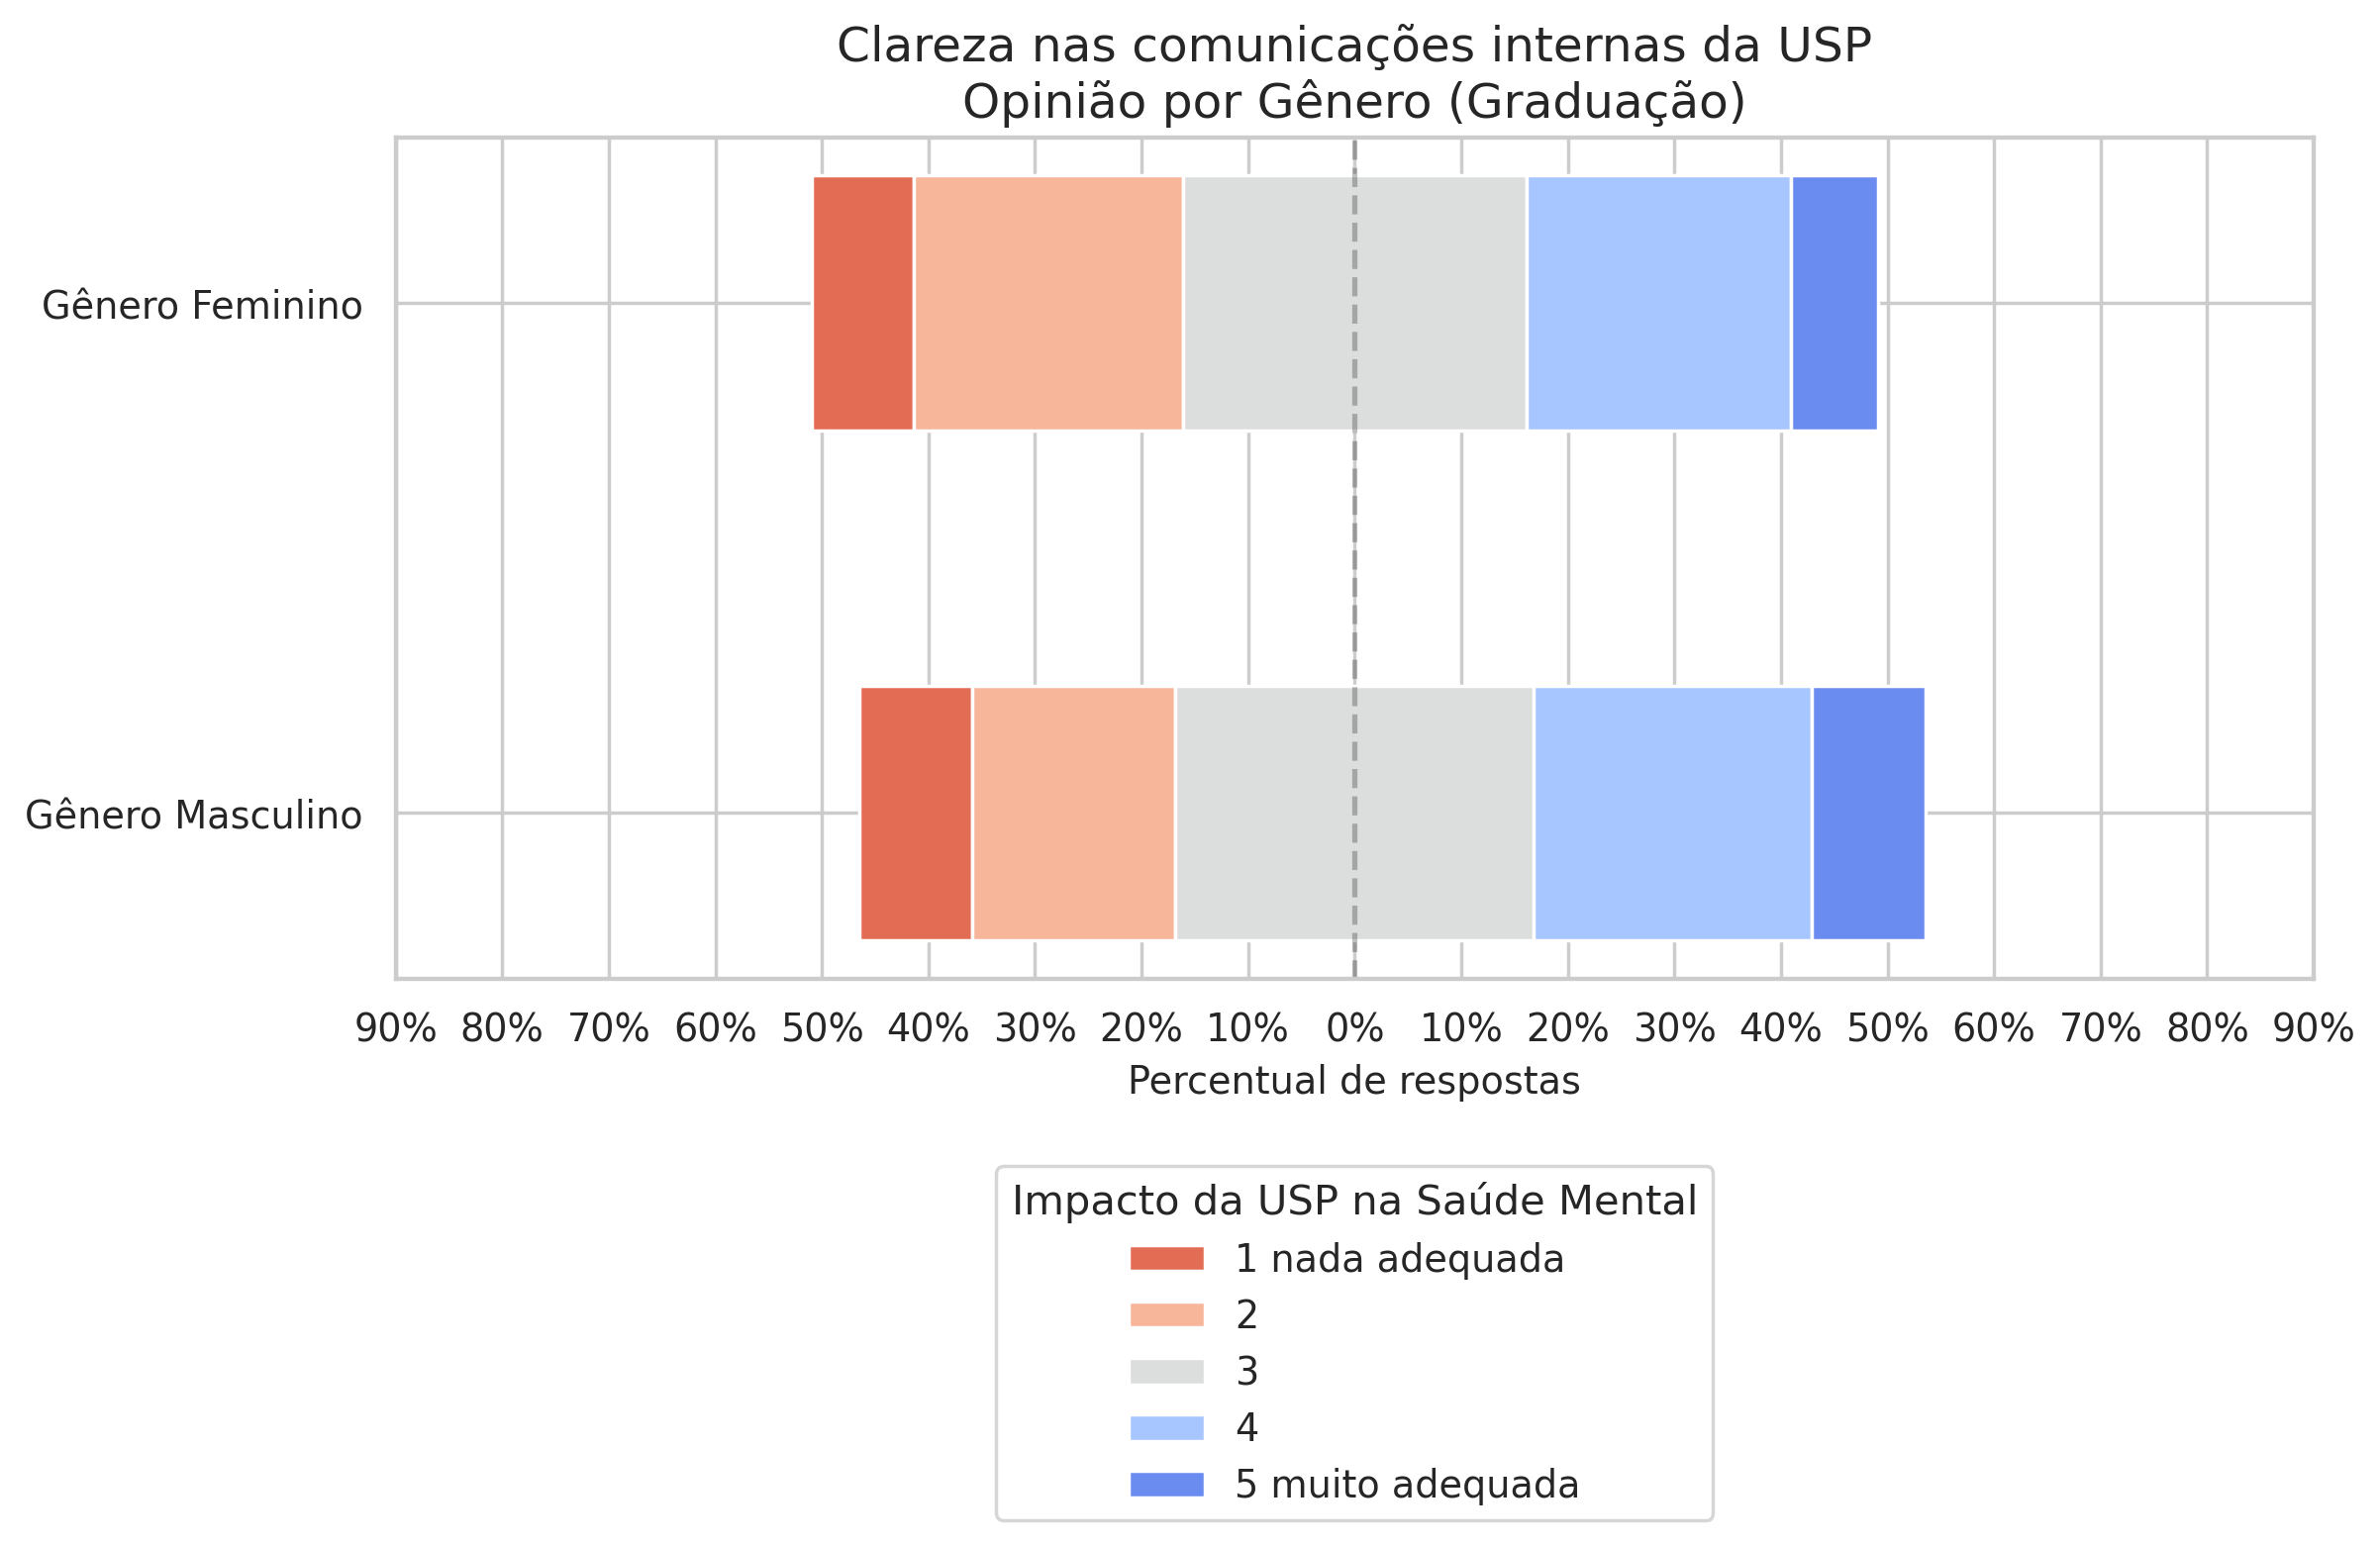

In [ ]:

df = tab_clarezacomunicacao_grad
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Gênero Feminino', 'Gênero Masculino'].index(x[0])))


category_names = ['1 nada adequada', '2','3', '4', '5 muito adequada']

fig, ax = survey(results, category_names)

ax.set_title('Clareza nas comunicações internas da USP\nOpinião por Gênero (Graduação)', fontsize=14)

ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Clareza nas comunicações internas da USP'])

Qui2   p-Valor
Clareza nas comunicações internas da USP  18.096609  0.001182

## Análise 17: Abertura das instâncias de participação e decisão de sua unidade

In [ ]:
ordem_abertura = ['1 nada aberta à participação', '2','3','4', '5 muito aberta à participação']

In [ ]:
tab_intancias_grad1 = pd.crosstab(df_graduacao['Abertura das instâncias de participação e decisão de sua unidade'], df_graduacao['Qual é sua identidade de gênero?'])

tab_intancias_grad1

Qual é sua identidade de gênero?                    Gênero Feminino  \
Abertura das instâncias de participação e decis...                    
1 nada aberta à participação                                    154   
2                                                               370   
3                                                               645   
4                                                               336   
5 muito aberta à participação                                   110   

Qual é sua identidade de gênero?                    Gênero Masculino  
Abertura das instâncias de participação e decis...                    
1 nada aberta à participação                                     131  
2                                                                296  
3                                                                475  
4                                                                249  
5 muito aberta à participação                                    110

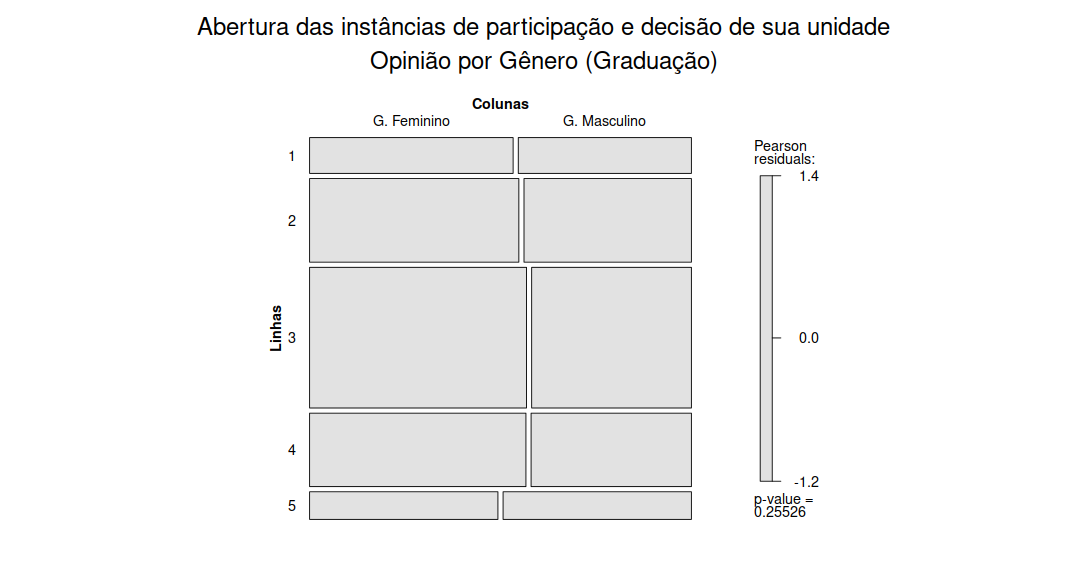

In [ ]:
tab_intancias_grad = pd.crosstab(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Abertura das instâncias de participação e decisão de sua unidade'], normalize = 'index')
tab_intancias_grad = tab_intancias_grad.astype(float)

tab_intancias_grad

Abertura das instâncias de participação e decisão de sua unidade  1 nada aberta à participação  \
Qual é sua identidade de gênero?                                                                 
Gênero Feminino                                                                       0.095356   
Gênero Masculino                                                                      0.103886   

Abertura das instâncias de participação e decisão de sua unidade         2  \
Qual é sua identidade de gênero?                                             
Gênero Feminino                                                   0.229102   
Gênero Masculino                                                  0.234734   

Abertura das instâncias de participação e decisão de sua unidade         3  \
Qual é sua identidade de gênero?                                             
Gênero Feminino                                                   0.399381   
Gênero Masculino                                                  0.376685   

Abertura das instâncias de participação e decisão de sua unidade         4  \
Qual é sua identidade de gênero?                                             
Gênero Feminino                                                   0.208050   
Gênero Masculino                                                  0.197462   

Abertura das instâncias de participação e decisão de sua unidade  5 muito aberta à participação  
Qual é sua identidade de gênero?                                                                 
Gênero Feminino                                                                        0.068111  
Gênero Masculino                                                                       0.087232

/tmp/ipykernel_12033/2087586823.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])


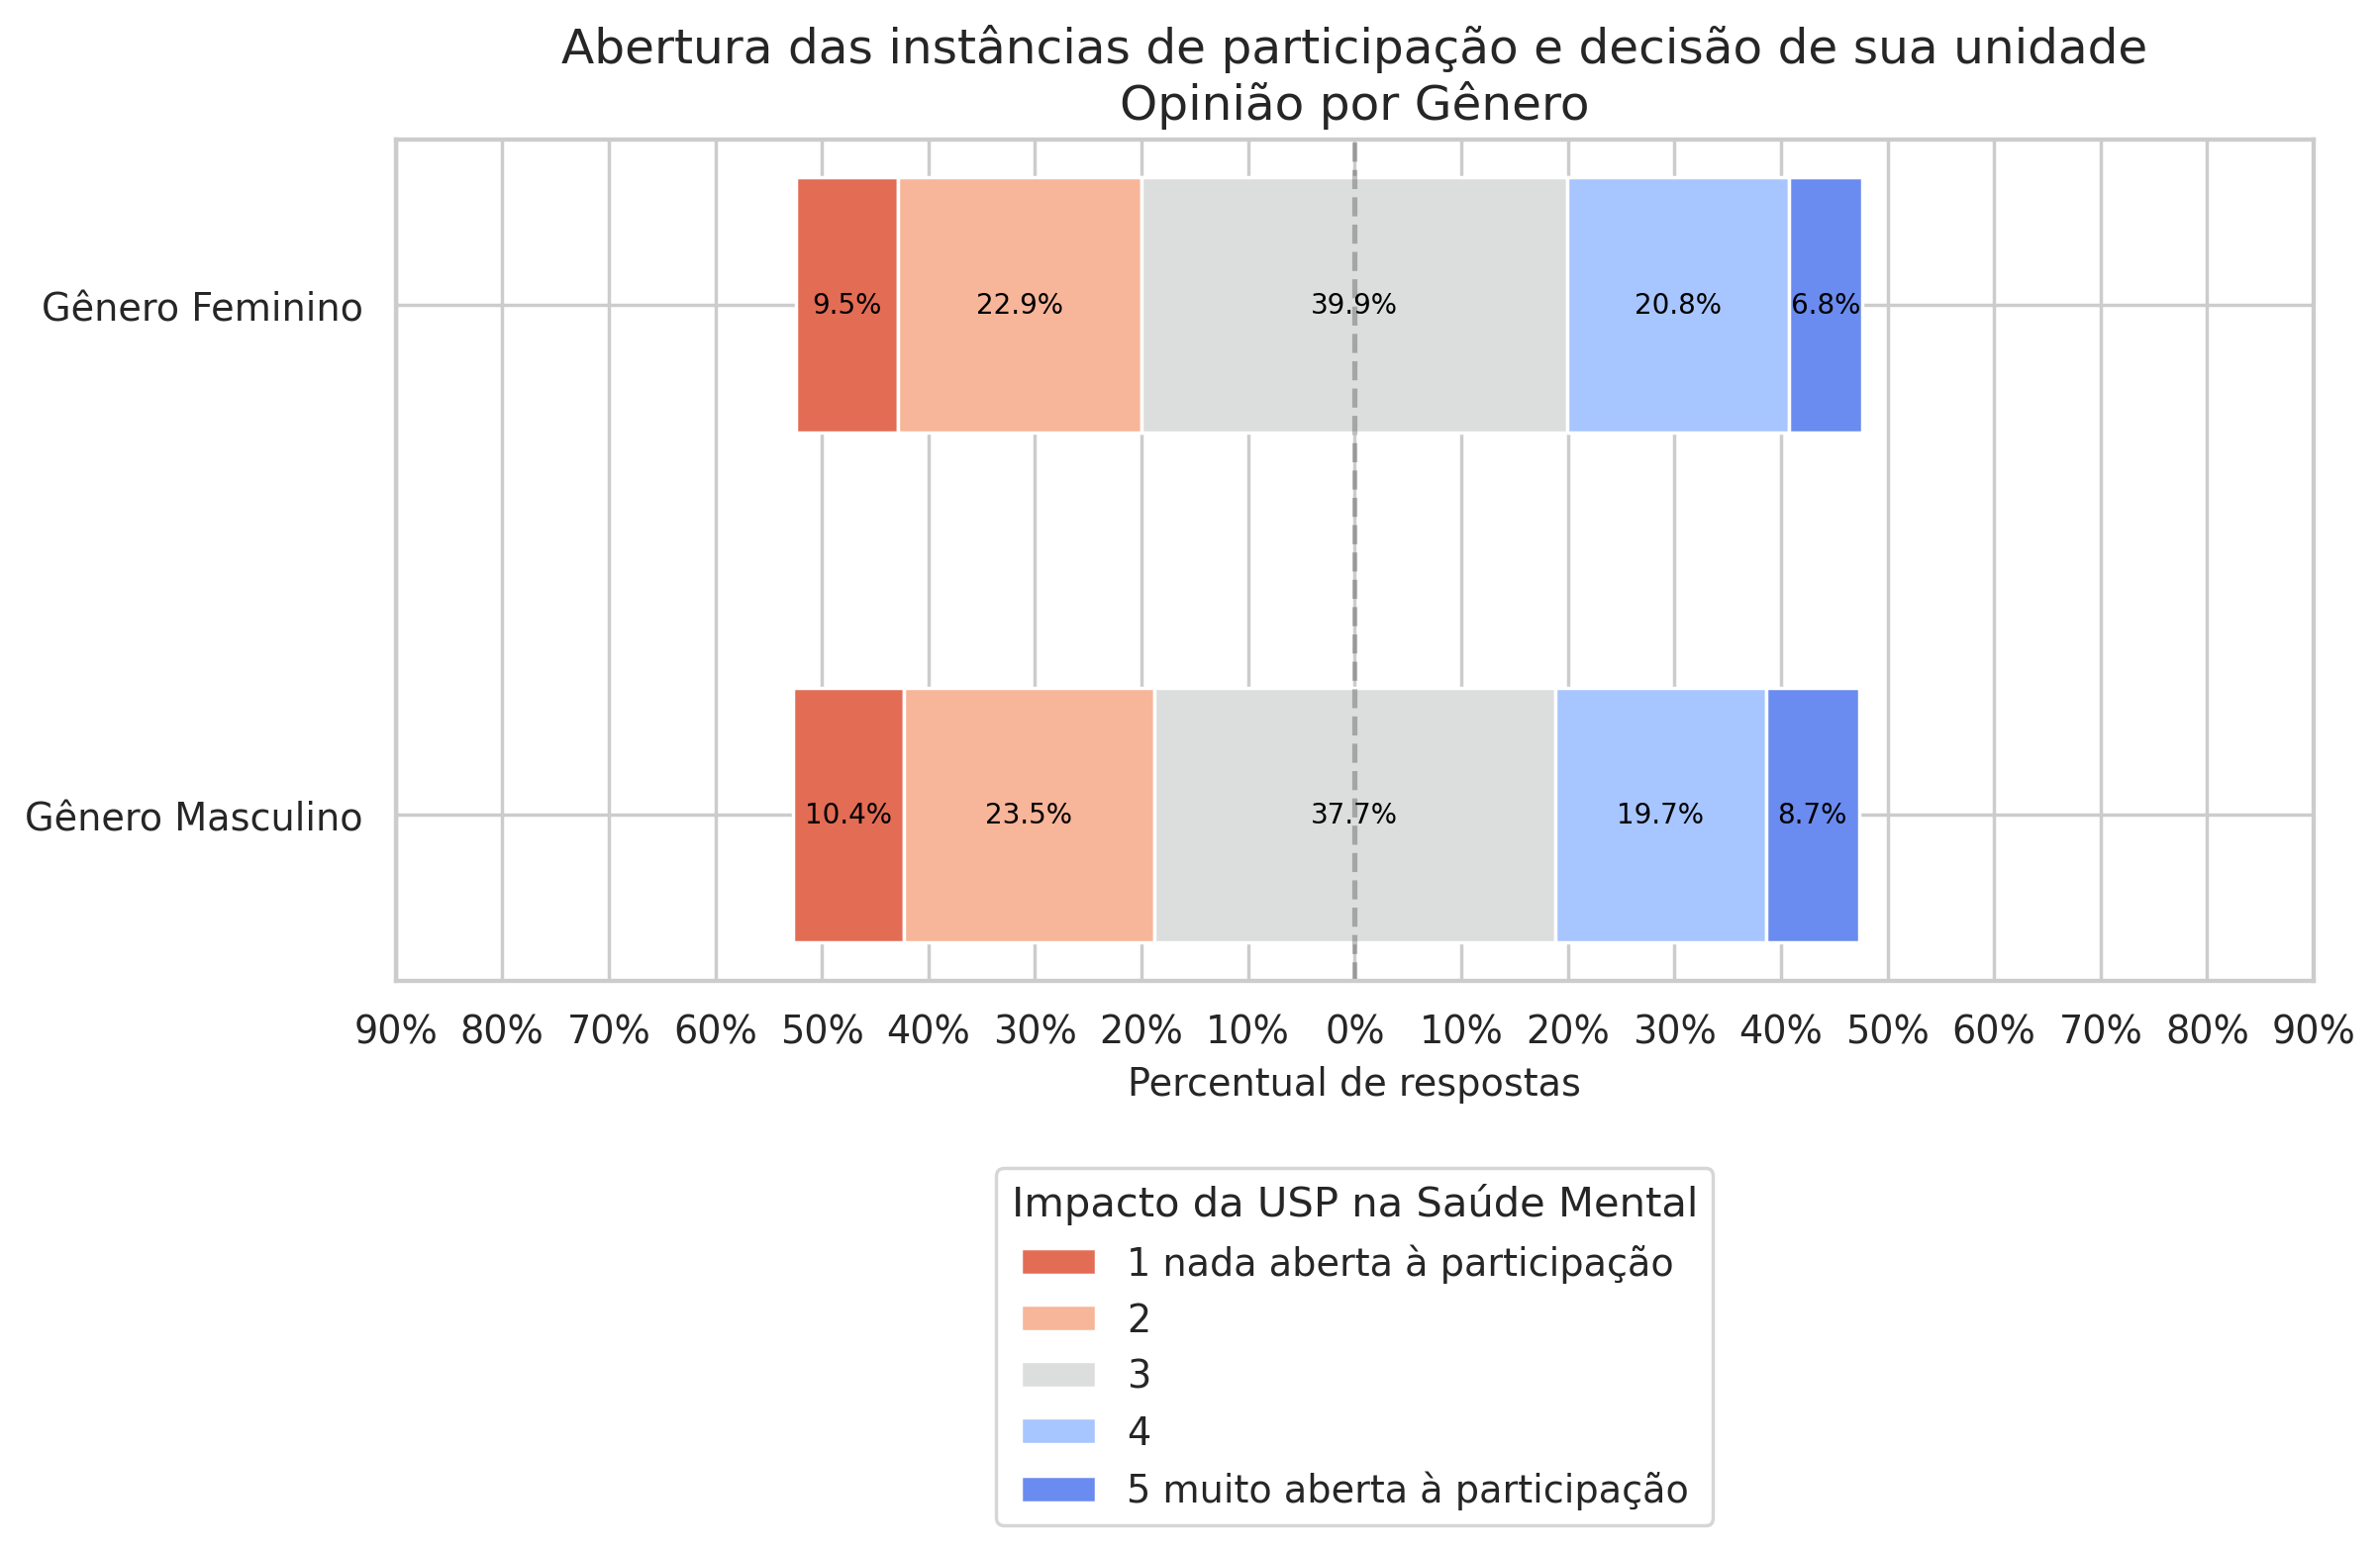

In [ ]:
df = tab_intancias_grad
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Gênero Feminino', 'Gênero Masculino'].index(x[0])))


category_names =  ['1 nada aberta à participação', '2','3','4', '5 muito aberta à participação']

fig, ax = survey(results, category_names)
for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['Black']+['Black']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Abertura das instâncias de participação e decisão de sua unidade\nOpinião por Gênero', fontsize=14)

ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Abertura das instâncias de participação e decisão de sua unidade'])

Qui2   p-Valor
Abertura das instâncias de participação e decis...  5.328101  0.255258

## Análise 18: Abertura das instâncias de participação e decisão da Universidade

In [ ]:
tab_universidade_grad1 = pd.crosstab(df_graduacao['Abertura das instâncias de participação e decisão da Universidade'],df_graduacao['Qual é sua identidade de gênero?'])

tab_universidade_grad1

Qual é sua identidade de gênero?                    Gênero Feminino  \
Abertura das instâncias de participação e decis...                    
1 nada aberta à participação                                    217   
2                                                               424   
3                                                               651   
4                                                               244   
5 muito aberta à participação                                    79   

Qual é sua identidade de gênero?                    Gênero Masculino  
Abertura das instâncias de participação e decis...                    
1 nada aberta à participação                                     170  
2                                                                325  
3                                                                488  
4                                                                195  
5 muito aberta à participação                                     83

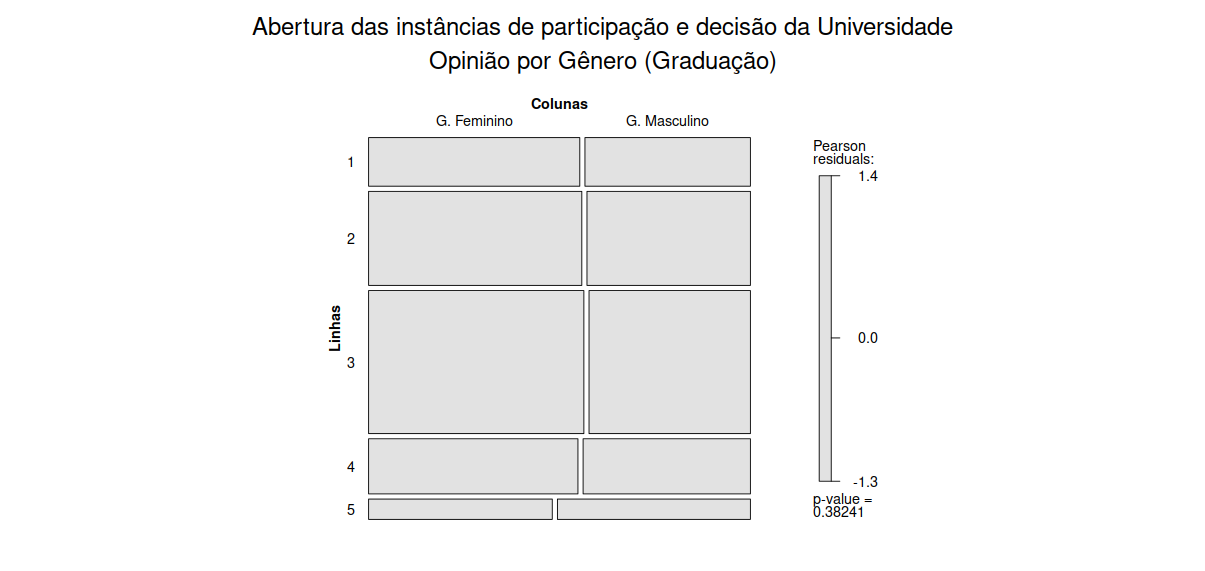

In [ ]:
tab_universidade_grad = pd.crosstab(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Abertura das instâncias de participação e decisão da Universidade'], normalize = 'index')
tab_universidade_grad = tab_universidade_grad.astype(float)
#tabcruzada_a33 = tabcruzada_a33 .reindex(index)#, columns=ordem_saude_mental)

tab_universidade_grad

Abertura das instâncias de participação e decisão da Universidade  1 nada aberta à participação  \
Qual é sua identidade de gênero?                                                                  
Gênero Feminino                                                                        0.134365   
Gênero Masculino                                                                       0.134814   

Abertura das instâncias de participação e decisão da Universidade         2  \
Qual é sua identidade de gênero?                                              
Gênero Feminino                                                    0.262539   
Gênero Masculino                                                   0.257732   

Abertura das instâncias de participação e decisão da Universidade         3  \
Qual é sua identidade de gênero?                                              
Gênero Feminino                                                    0.403096   
Gênero Masculino                                                   0.386994   

Abertura das instâncias de participação e decisão da Universidade         4  \
Qual é sua identidade de gênero?                                              
Gênero Feminino                                                    0.151084   
Gênero Masculino                                                   0.154639   

Abertura das instâncias de participação e decisão da Universidade  5 muito aberta à participação  
Qual é sua identidade de gênero?                                                                  
Gênero Feminino                                                                         0.048916  
Gênero Masculino                                                                        0.065821

/tmp/ipykernel_12033/440124169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])


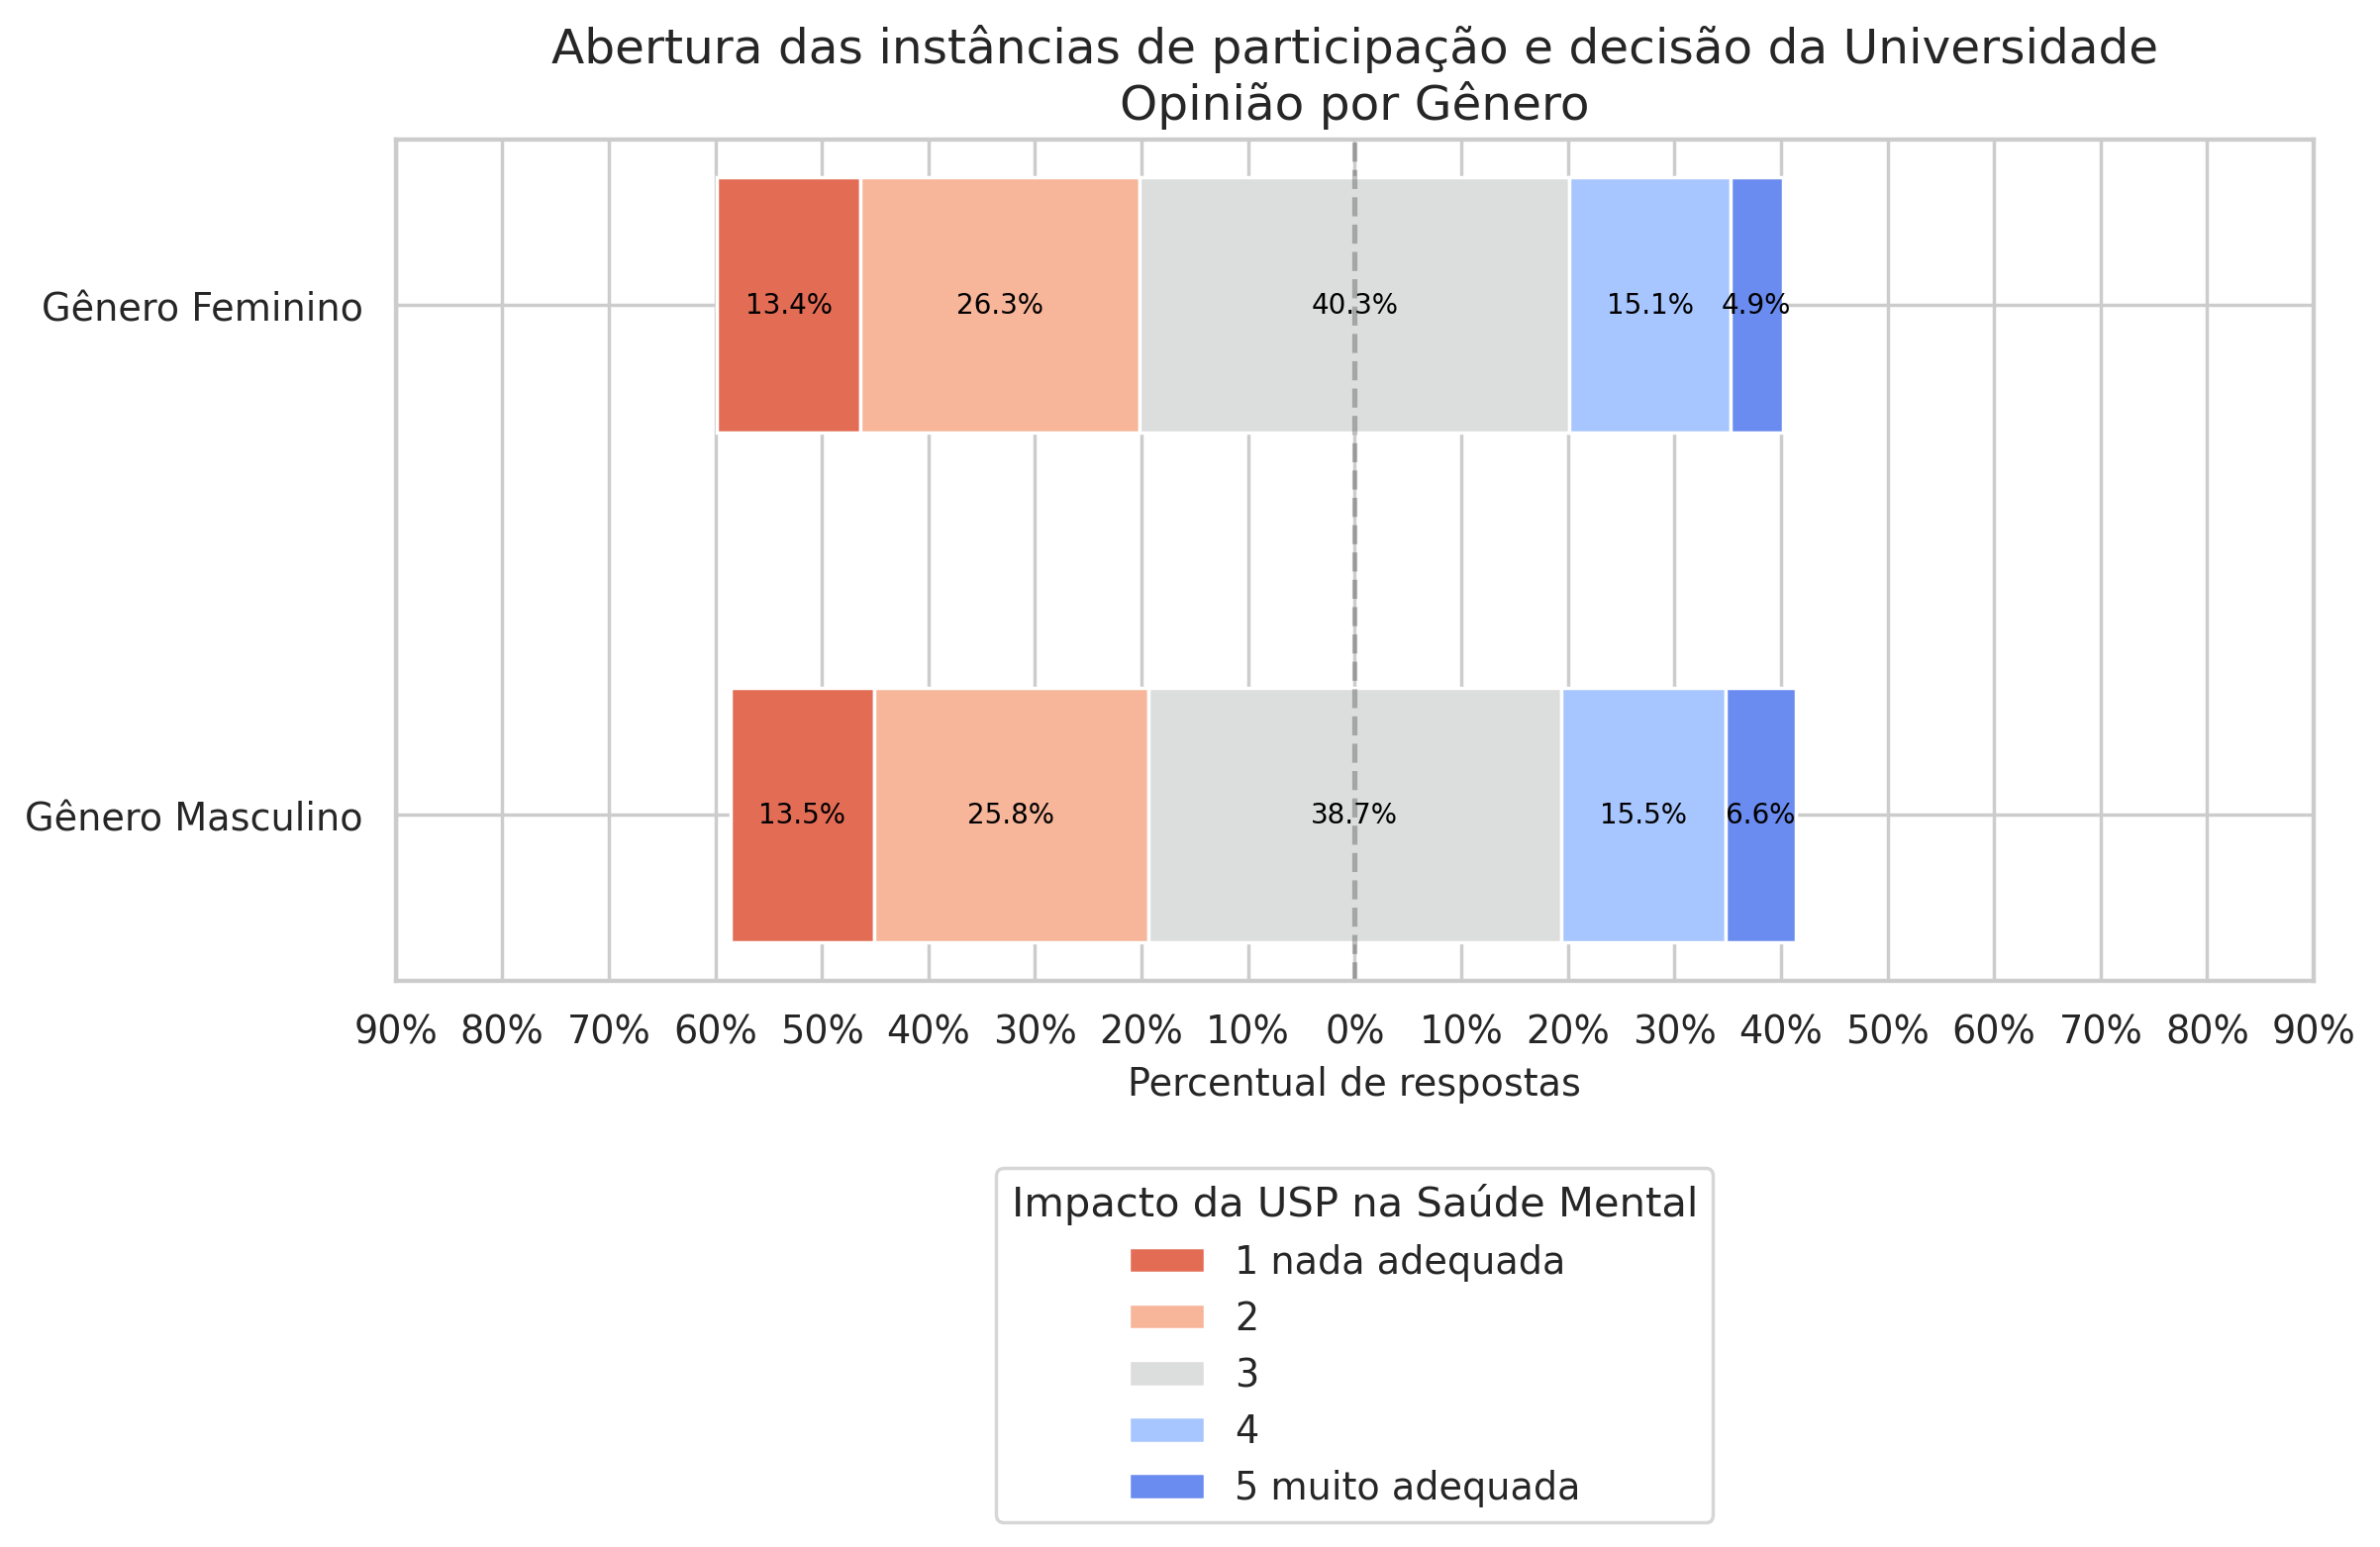

In [ ]:
df = tab_universidade_grad
stacked_df = df.stack(level=-1)

# Convertendo o DataFrame resultante para um dicionário
dic = stacked_df.groupby(level=0).apply(lambda x: x.droplevel(0).tolist()).to_dict()
results = dict(sorted(dic.items(), key=lambda x: ['Gênero Feminino', 'Gênero Masculino'].index(x[0])))


category_names = ['1 nada adequada', '2','3', '4', '5 muito adequada']

fig, ax = survey(results, category_names)

for bars, color in zip(ax.containers[:],['Black']+['Black']+['Black']+['Black']+['Black']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_title('Abertura das instâncias de participação e decisão da Universidade\nOpinião por Gênero', fontsize=14)

ax.set_yticklabels(['Gênero Feminino', 'Gênero Masculino'])
ax.set_xlabel('Percentual de respostas\n', fontsize=11)
plt.show()


In [ ]:

qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Abertura das instâncias de participação e decisão da Universidade'])

Qui2   p-Valor
Abertura das instâncias de participação e decis...  4.17836  0.382405

## Análise 19: Considerando a inclusão e o pertencimento, que nota você atribui para a USP?

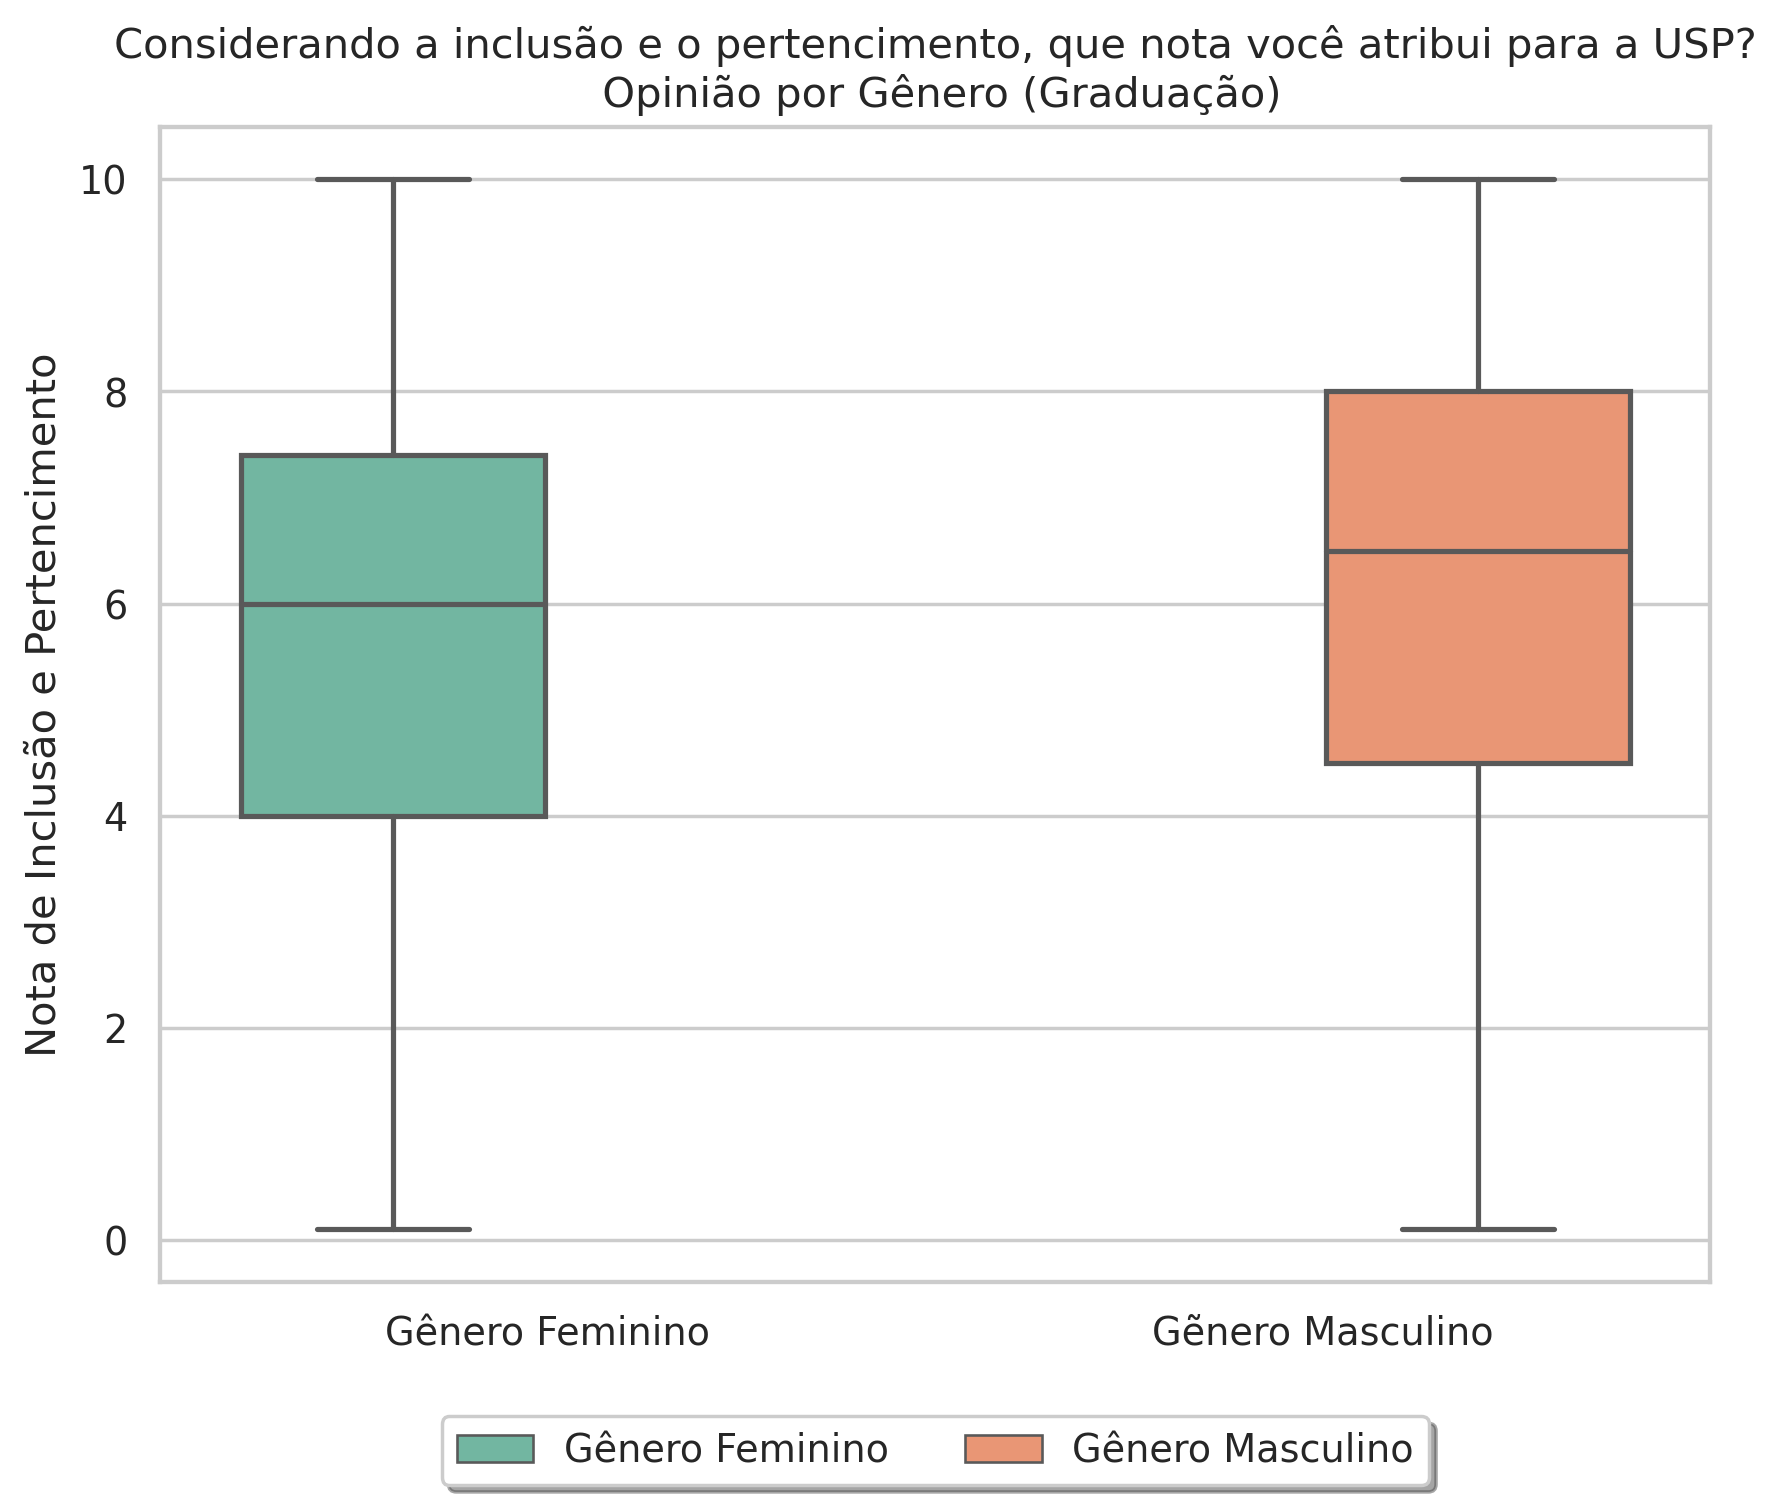

In [ ]:

df_selecionado = df_graduacao[df_graduacao['Qual é sua identidade de gênero?'].isin(['Gênero Feminino', 'Gênero Masculino'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Qual é sua identidade de gênero?', y='Considerando a inclusão e o pertencimento, que nota você atribui para a USP?', data=df_selecionado, hue='Qual é sua identidade de gênero?', palette='Set2')

plt.title('Considerando a inclusão e o pertencimento, que nota você atribui para a USP?\n Opinião por Gênero (Graduação)')
plt.ylabel('Nota de Inclusão e Pertencimento')
plt.xlabel('')
plt.xticks([0, 1], ['Gênero Feminino', 'Gẽnero Masculino'])


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=2)


plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Considerando a inclusão e o pertencimento, que nota você atribui para a USP?'])

Qui2   p-Valor
Considerando a inclusão e o pertencimento, que ...  175.831402  0.000002

In [ ]:
df_graduacao

Unnamed: 0.1  Unnamed: 0         Submitted At  \
0                0           0  23-08-2022 18:46:11   
1                1           1  30-08-2022 23:06:25   
2                2           2  31-08-2022 16:39:46   
3                3           3  01-09-2022 18:03:43   
4                4           4  30-08-2022 15:55:48   
...            ...         ...                  ...   
2996          2996        2996  23-08-2022 15:18:07   
2997          2997        2997  30-08-2022 18:01:34   
2998          2998        2998  14-09-2022 13:18:40   
2999          2999        2999  30-08-2022 16:33:13   
3000          3000        3000  30-08-2022 18:31:11   

     Qual a sua posição principal na USP hoje? Curso de pós-graduação  \
0                        Aluno(a) de graduação                    NaN   
1                        Aluno(a) de graduação                    NaN   
2                        Aluno(a) de graduação                    NaN   
3                        Aluno(a) de graduação                    NaN   
4                        Aluno(a) de graduação                    NaN   
...                                        ...                    ...   
2996                     Aluno(a) de graduação                    NaN   
2997                     Aluno(a) de graduação                    NaN   
2998                     Aluno(a) de graduação                    NaN   
2999                     Aluno(a) de graduação                    NaN   
3000                     Aluno(a) de graduação                    NaN   

      Qual o seu ano de ingresso como aluno(a) de graduação na USP?  \
0                                                2022.0               
1                                                2022.0               
2                                                2013.0               
3                                                2019.0               
4                                                2022.0               
...                                                 ...               
2996                                             2019.0               
2997                                             2020.0               
2998                                             2020.0               
2999                                             2019.0               
3000                                             2020.0               

      Qual o seu ano de ingresso como aluno(a) de pós-graduação na USP?  \
0                                                   NaN                   
1                                                   NaN                   
2                                                   NaN                   
3                                                   NaN                   
4                                                   NaN                   
...                                                 ...                   
2996                                                NaN                   
2997                                                NaN                   
2998                                                NaN                   
2999                                                NaN                   
3000                                                NaN                   

     Qual o seu campus e unidade principal?  \
0                       Campus de São Paulo   
1                       Campus de São Paulo   
2                       Campus de São Paulo   
3                       EACH - campus leste   
4                            EACH USP LESTE   
...                                     ...   
2996                    Campus de São Paulo   
2997                    Campus de São Paulo   
2998                    Campus de São Paulo   
2999                    Campus de São Paulo   
3000                    Campus de São Paulo   

                                             Unidade  \
0     Escola de Artes, Ciências e Humanidades (EACH)   
1     Escola de Artes, Ciências e Hum

## Análise 20. Vivências discriminatórias por gênero

In [ ]:
tabcruzada_grad_a1 = pd.crosstab(df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], df_graduacao['Qual é sua identidade de gênero?'])
#tabcruzada_grad_a1 = tabcruzada_grad_a1.astype(float)
tabcruzada_grad_a1 = tabcruzada_grad_a1 .reindex(index=ordem_exp_hostis)#, columns=ordem_saude_mental)

tabcruzada_grad_a1


Qual é sua identidade de gênero?                    Gênero Feminino  \
Você já experimentou pessoalmente algum tipo de...                    
Sim, e afetou meu bem-estar e/ou minhas ativida...              354   
Sim, mas não afetou meu bem-estar ou minhas ati...              194   
Não                                                             999   

Qual é sua identidade de gênero?                    Gênero Masculino  
Você já experimentou pessoalmente algum tipo de...                    
Sim, e afetou meu bem-estar e/ou minhas ativida...               193  
Sim, mas não afetou meu bem-estar ou minhas ati...               145  
Não                                                              881

In [ ]:
tabcruzada_grad_a1 = pd.crosstab(df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], df_graduacao['Qual é sua identidade de gênero?'], normalize = 'index')
tabcruzada_grad_a1 = tabcruzada_grad_a1.astype(float)
tabcruzada_grad_a1 = tabcruzada_grad_a1 .reindex(index=ordem_exp_hostis)#, columns=ordem_saude_mental)

tabcruzada_grad_a1


Qual é sua identidade de gênero?                    Gênero Feminino  \
Você já experimentou pessoalmente algum tipo de...                    
Sim, e afetou meu bem-estar e/ou minhas ativida...         0.647166   
Sim, mas não afetou meu bem-estar ou minhas ati...         0.572271   
Não                                                        0.531383   

Qual é sua identidade de gênero?                    Gênero Masculino  
Você já experimentou pessoalmente algum tipo de...                    
Sim, e afetou meu bem-estar e/ou minhas ativida...          0.352834  
Sim, mas não afetou meu bem-estar ou minhas ati...          0.427729  
Não                                                         0.468617

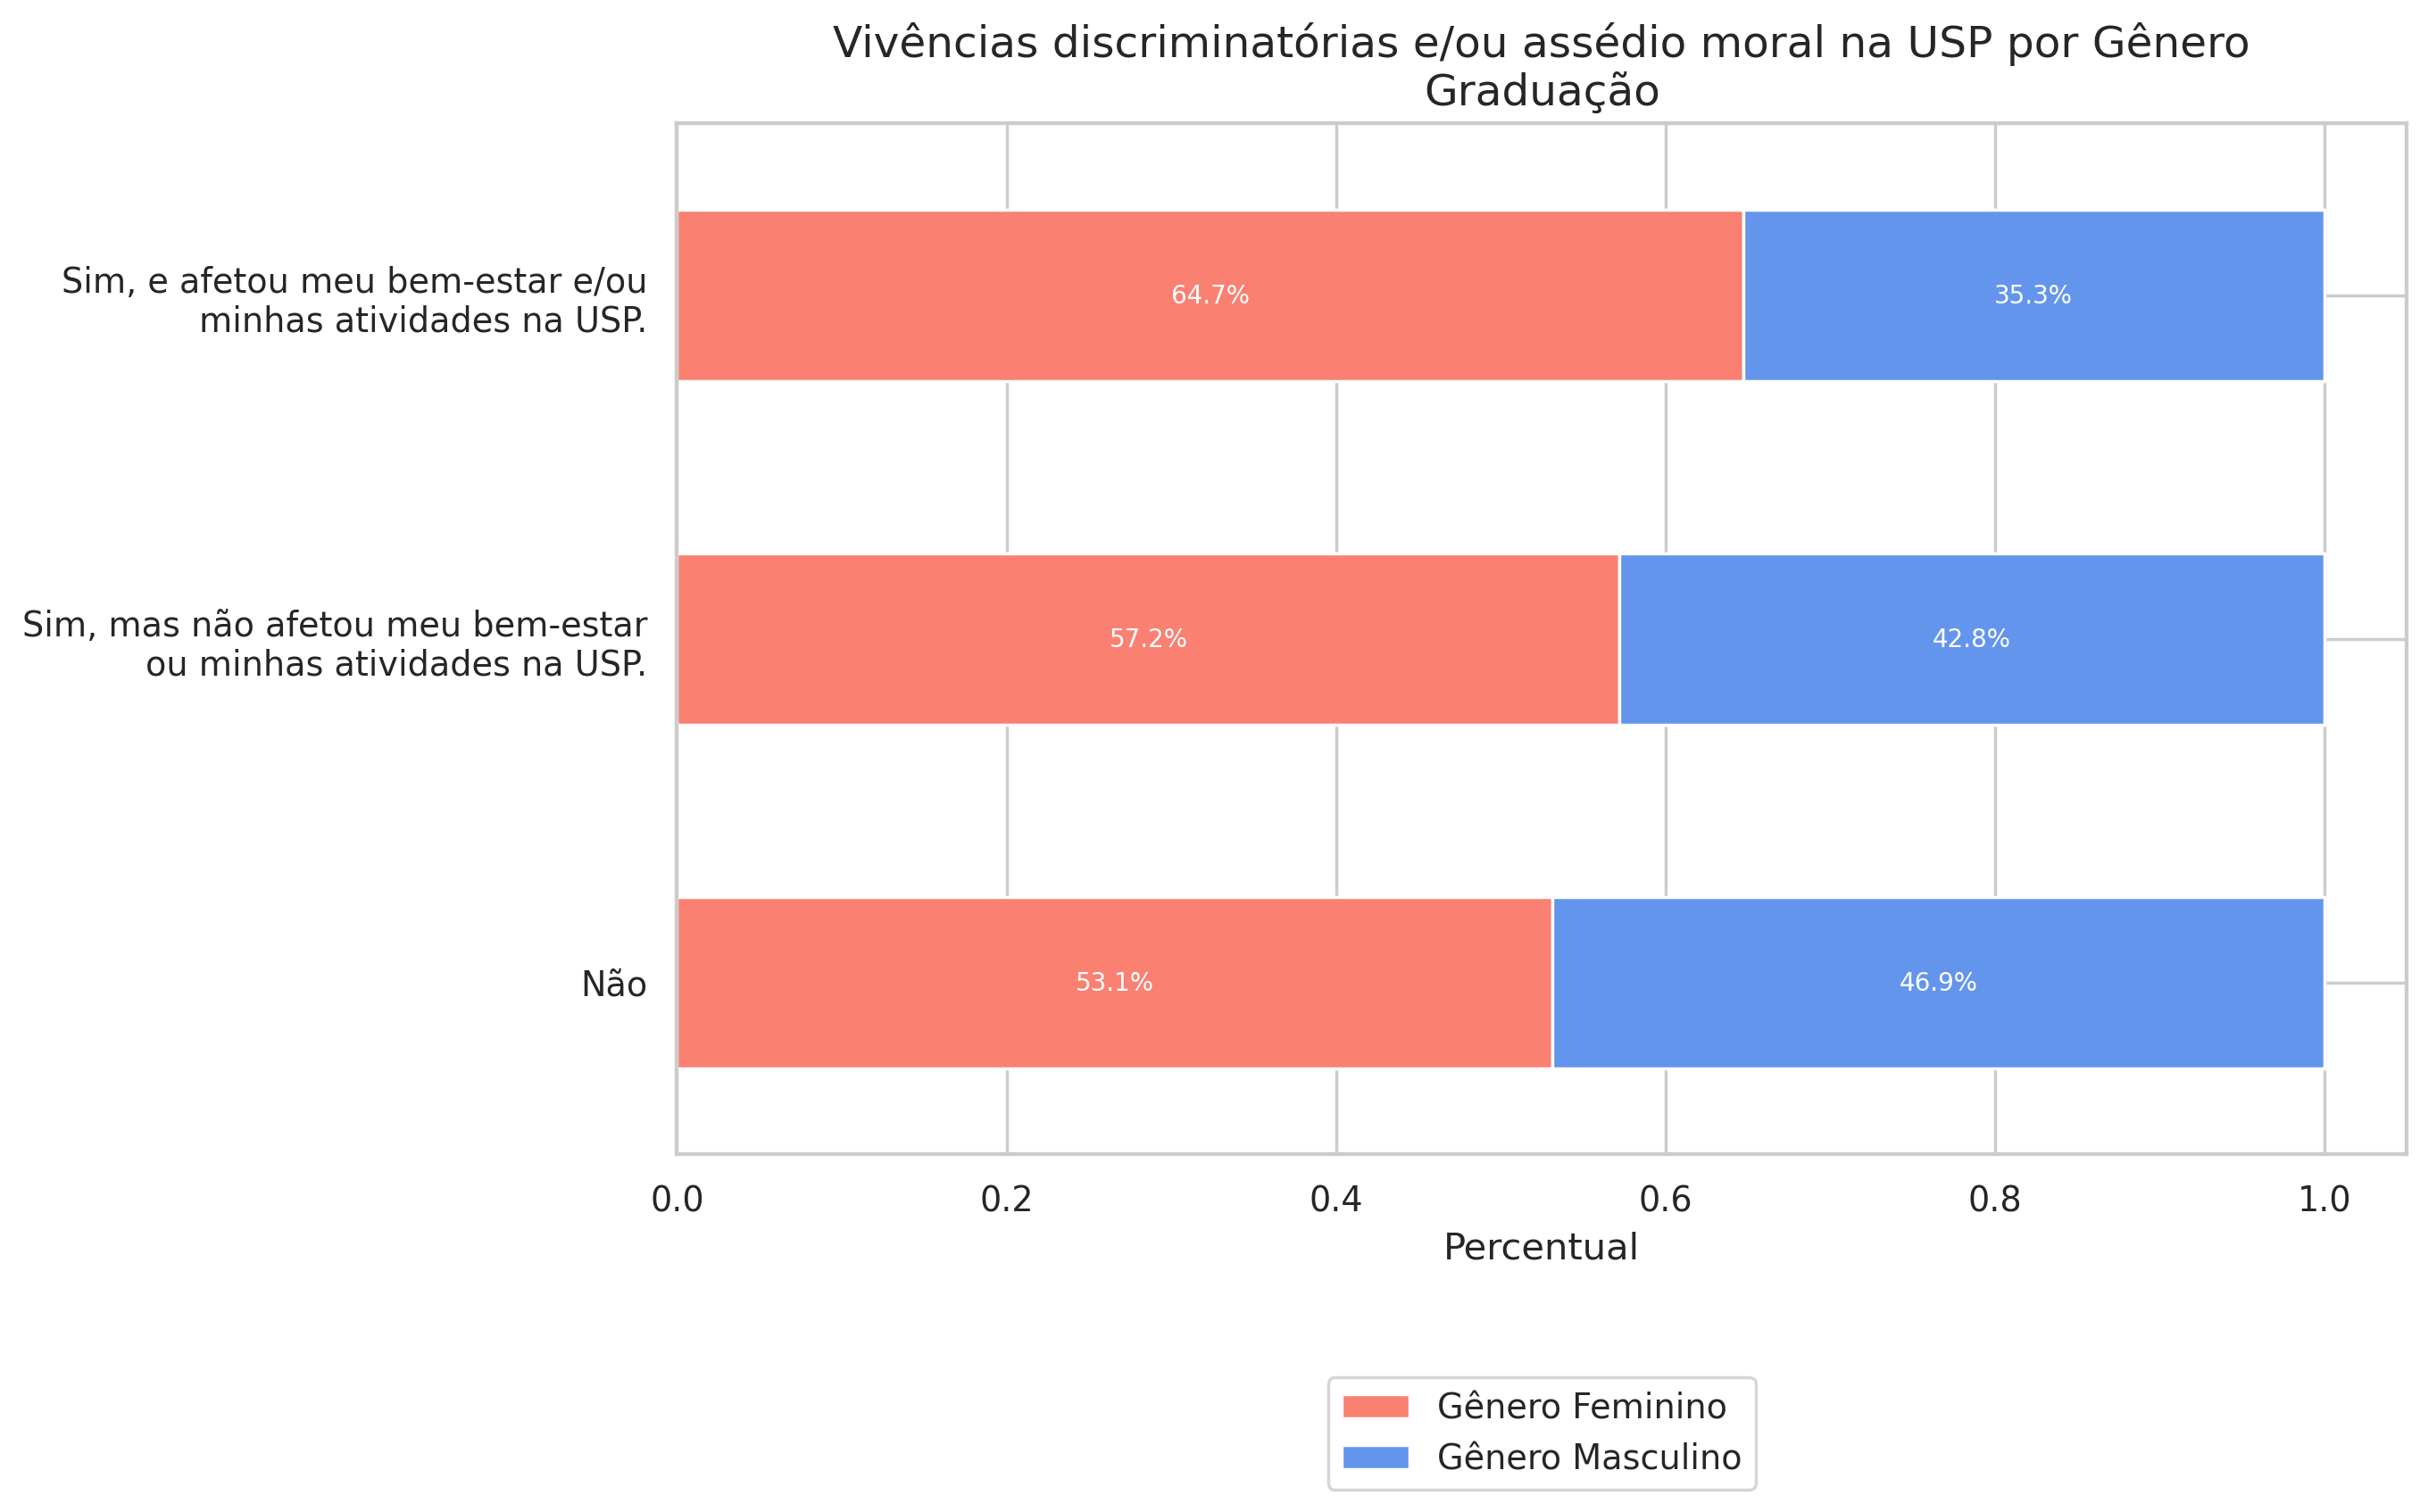

In [ ]:
# Filtrar a tabela cruzada excluindo a categoria "Prefiro não responder"
tabcruzada_filtrada = tabcruzada_grad_a1[tabcruzada_grad_a1.index != "Prefiro não responder"]

cores2 = ['salmon', 'cornflowerblue']
cmap = plt.cm.colors.ListedColormap(cores2)

ax = tabcruzada_filtrada.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.xlabel('Percentual')
plt.title('Vivências discriminatórias e/ou assédio moral na USP por Gênero\nGraduação', fontsize = 14)

ax.invert_yaxis()


for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_yticklabels(['Sim, e afetou meu bem-estar e/ou\nminhas atividades na USP.',
          'Sim, mas não afetou meu bem-estar\nou minhas atividades na USP.','Não'])
ax.set_ylabel('')
legenda = plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()


In [ ]:
qui_quadrado(df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'],df_graduacao['Qual é sua identidade de gênero?'])

Qui2   p-Valor
Qual é sua identidade de gênero?  24.825098  0.000017

## Análise 21: Recorrência das vivências hostis/discriminatórias

In [ ]:
ordem_recorrencia = ['Mais de dez vezes',
'Entre cinco e dez vezes',
'Entre duas e quatro vezes',
'Uma única vez']



In [ ]:

tabcruzada_grad_a2 = pd.crosstab(df_graduacao['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'], df_graduacao['Qual é sua identidade de gênero?'])
tabcruzada_grad_a2 = tabcruzada_grad_a2 .reindex(index=ordem_recorrencia)#, columns=ordem_saude_mental)

tabcruzada_grad_a2

Qual é sua identidade de gênero?                    Gênero Feminino  \
Quantas vezes ocorreram situações desse tipo, d...                    
Mais de dez vezes                                                81   
Entre cinco e dez vezes                                          92   
Entre duas e quatro vezes                                       246   
Uma única vez                                                   106   

Qual é sua identidade de gênero?                    Gênero Masculino  
Quantas vezes ocorreram situações desse tipo, d...                    
Mais de dez vezes                                                 56  
Entre cinco e dez vezes                                           63  
Entre duas e quatro vezes                                        142  
Uma única vez                                                     60

In [ ]:
ordem_recorrencia = ['Mais de dez vezes',
'Entre cinco e dez vezes',
'Entre duas e quatro vezes',
'Uma única vez']

tabcruzada_grad_a2 = pd.crosstab(df_graduacao['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'], df_graduacao['Qual é sua identidade de gênero?'], normalize = 'index')
tabcruzada_grad_a2 = tabcruzada_grad_a2.astype(float)
tabcruzada_grad_a2 = tabcruzada_grad_a2 .reindex(index=ordem_recorrencia)#, columns=ordem_saude_mental)

tabcruzada_grad_a2


Qual é sua identidade de gênero?                    Gênero Feminino  \
Quantas vezes ocorreram situações desse tipo, d...                    
Mais de dez vezes                                          0.591241   
Entre cinco e dez vezes                                    0.593548   
Entre duas e quatro vezes                                  0.634021   
Uma única vez                                              0.638554   

Qual é sua identidade de gênero?                    Gênero Masculino  
Quantas vezes ocorreram situações desse tipo, d...                    
Mais de dez vezes                                           0.408759  
Entre cinco e dez vezes                                     0.406452  
Entre duas e quatro vezes                                   0.365979  
Uma única vez                                               0.361446

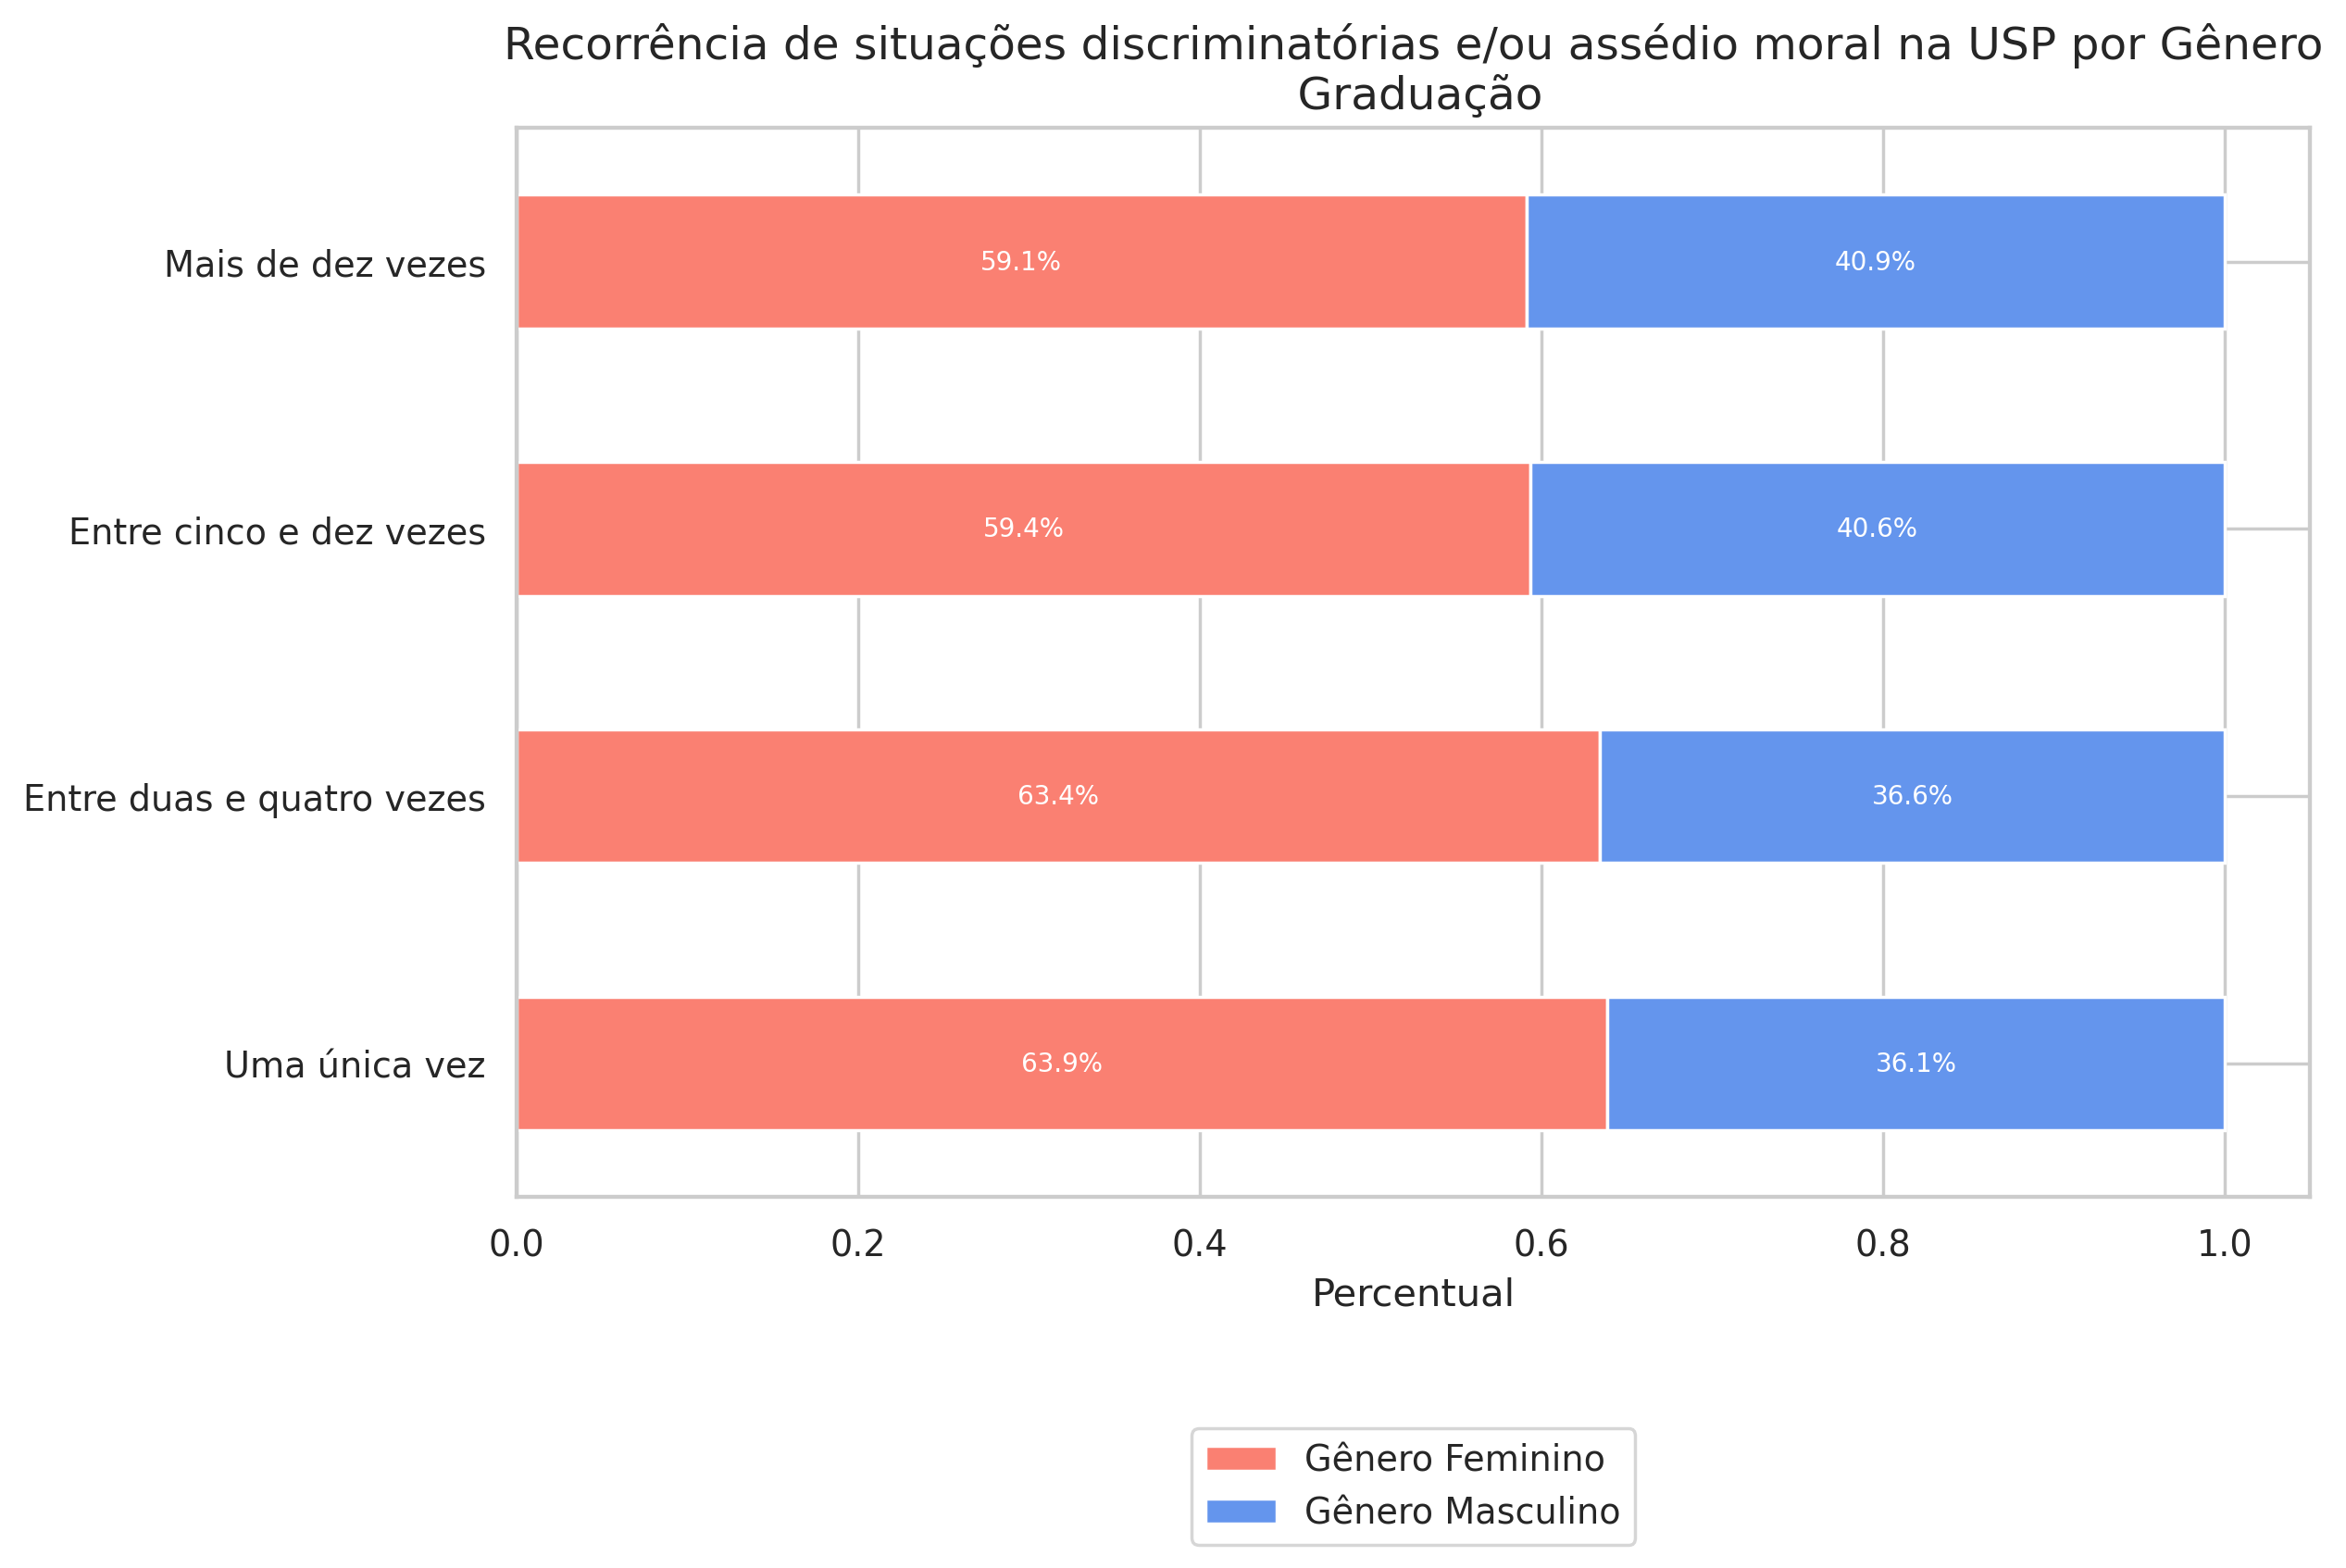

In [ ]:
tabcruzada_filtrada2 = tabcruzada_grad_a2[tabcruzada_grad_a2.index != "Prefiro não responder"]

ax = tabcruzada_filtrada2.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.xlabel('Percentual')
plt.title('Recorrência de situações discriminatórias e/ou assédio moral na USP por Gênero\n Graduação', fontsize = 14)

ax.invert_yaxis()
for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_yticklabels(['Mais de dez vezes',
'Entre cinco e dez vezes',
'Entre duas e quatro vezes',
'Uma única vez'])
ax.set_ylabel('')
legenda = plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()


In [ ]:
qui_quadrado(df_graduacao['Quantas vezes ocorreram situações desse tipo, desde a sua chegada à USP?'],df_graduacao['Qual é sua identidade de gênero?'])

Qui2   p-Valor
Qual é sua identidade de gênero?  26.012701  0.000089

## Análise 22: Recebeu ou recebe bolsa de pesquisa por gênero

In [ ]:
tabcruzada_grad_a4 = pd.crosstab(df_graduacao['Recebeu ou recebe bolsa de pesquisa?'], df_graduacao['Qual é sua identidade de gênero?'], normalize = 'index')
tabcruzada_grad_a4 = tabcruzada_grad_a4.astype(float)
tabcruzada_grad_a4 = tabcruzada_grad_a4 .reindex(index=['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])#, columns=ordem_saude_mental)

tabcruzada_grad_a4


Qual é sua identidade de gênero?      Gênero Feminino  Gênero Masculino
Recebeu ou recebe bolsa de pesquisa?                                   
Solicitei e não fui contemplado(a)           0.617284          0.382716
Solicitei e fui contemplado(a)               0.608209          0.391791
Não                                          0.537173          0.462827

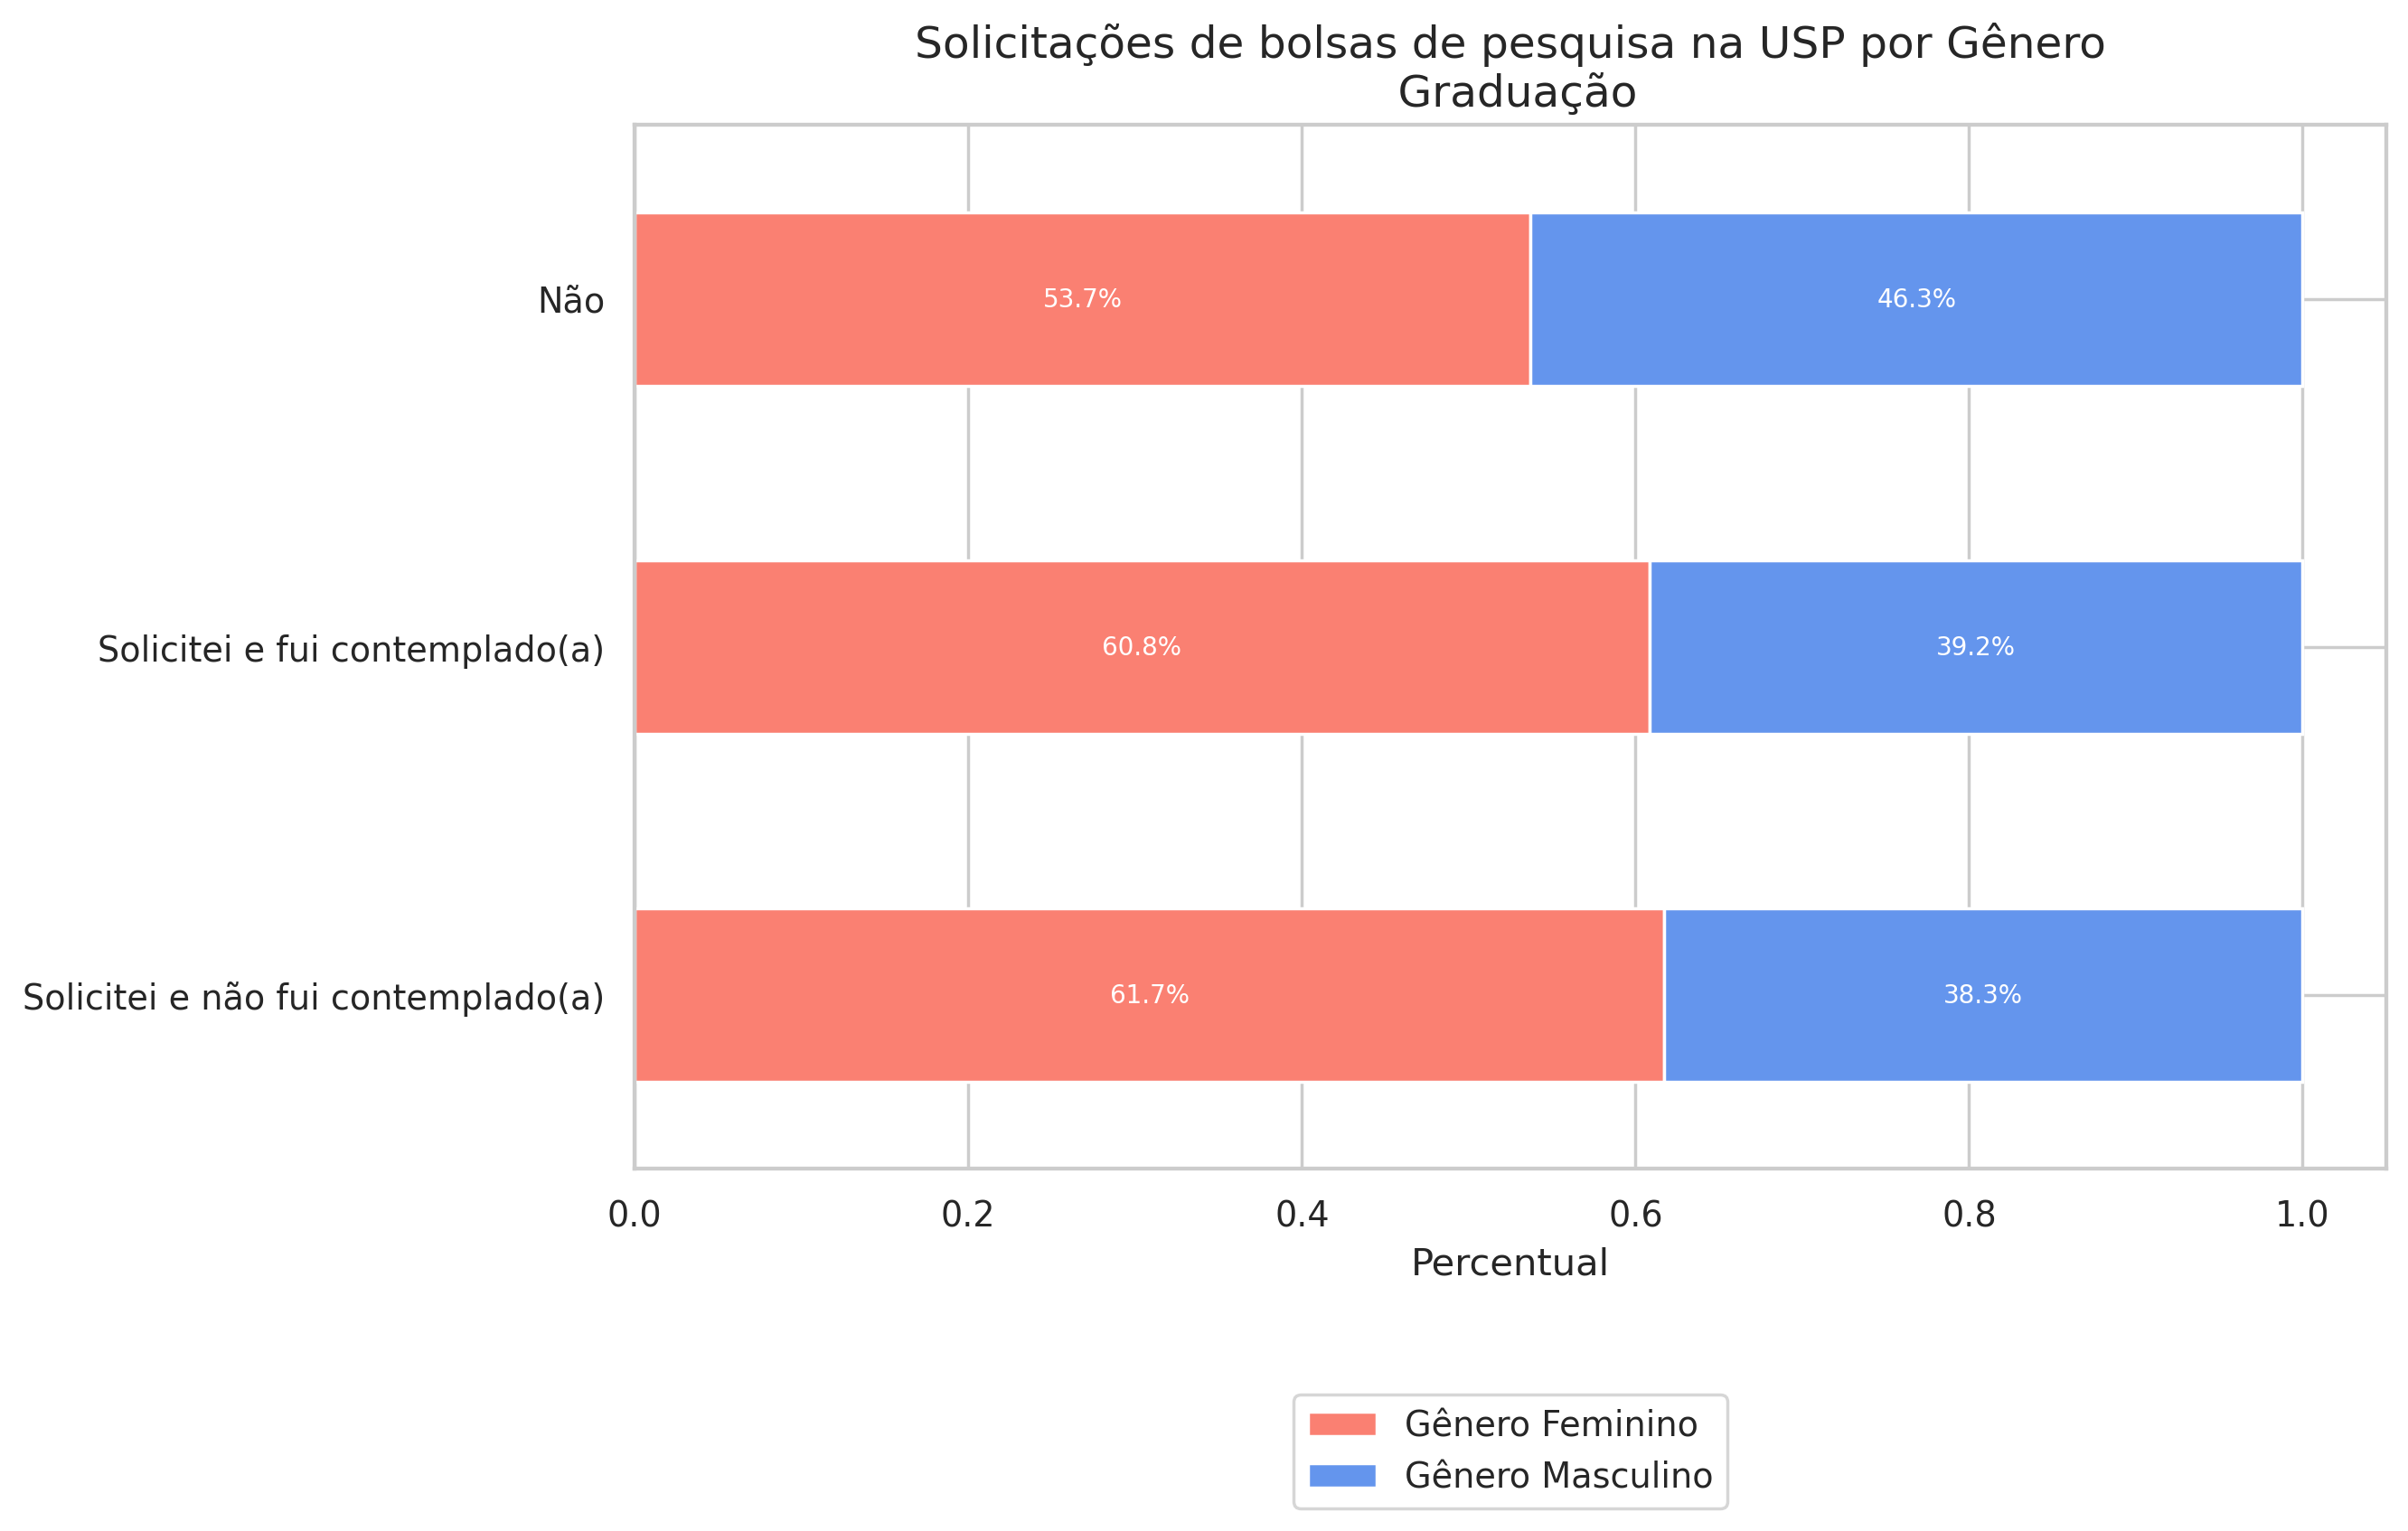

In [ ]:
tabcruzada_filtrada4 = tabcruzada_grad_a4[tabcruzada_grad_a4.index != "Prefiro não responder"]

ax = tabcruzada_filtrada4.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.xlabel('Percentual')
plt.title('Solicitações de bolsas de pesquisa na USP por Gênero\n Graduação', fontsize = 14)

ax.invert_yaxis()
for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)


ax.invert_yaxis()

ax.set_yticklabels(['Solicitei e não fui contemplado(a)', 'Solicitei e fui contemplado(a)','Não'])
ax.set_ylabel('')
legenda = plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()

## Análise 23. Evasão por Gênero

In [ ]:
tabcruzada_grad_a5m = pd.crosstab(df_graduacao['Em algum momento você pensou em deixar a USP?'], df_graduacao['Qual é sua identidade de gênero?'], normalize = 'index')
tabcruzada_grad_a5m = tabcruzada_grad_a5m.astype(float)
tabcruzada_grad_a5m = tabcruzada_grad_a5m.reindex(index=['Sim', 'Não'])

tabcruzada_grad_a5m

Qual é sua identidade de gênero?               Gênero Feminino  \
Em algum momento você pensou em deixar a USP?                    
Sim                                                   0.587201   
Não                                                   0.531655   

Qual é sua identidade de gênero?               Gênero Masculino  
Em algum momento você pensou em deixar a USP?                    
Sim                                                    0.412799  
Não                                                    0.468345

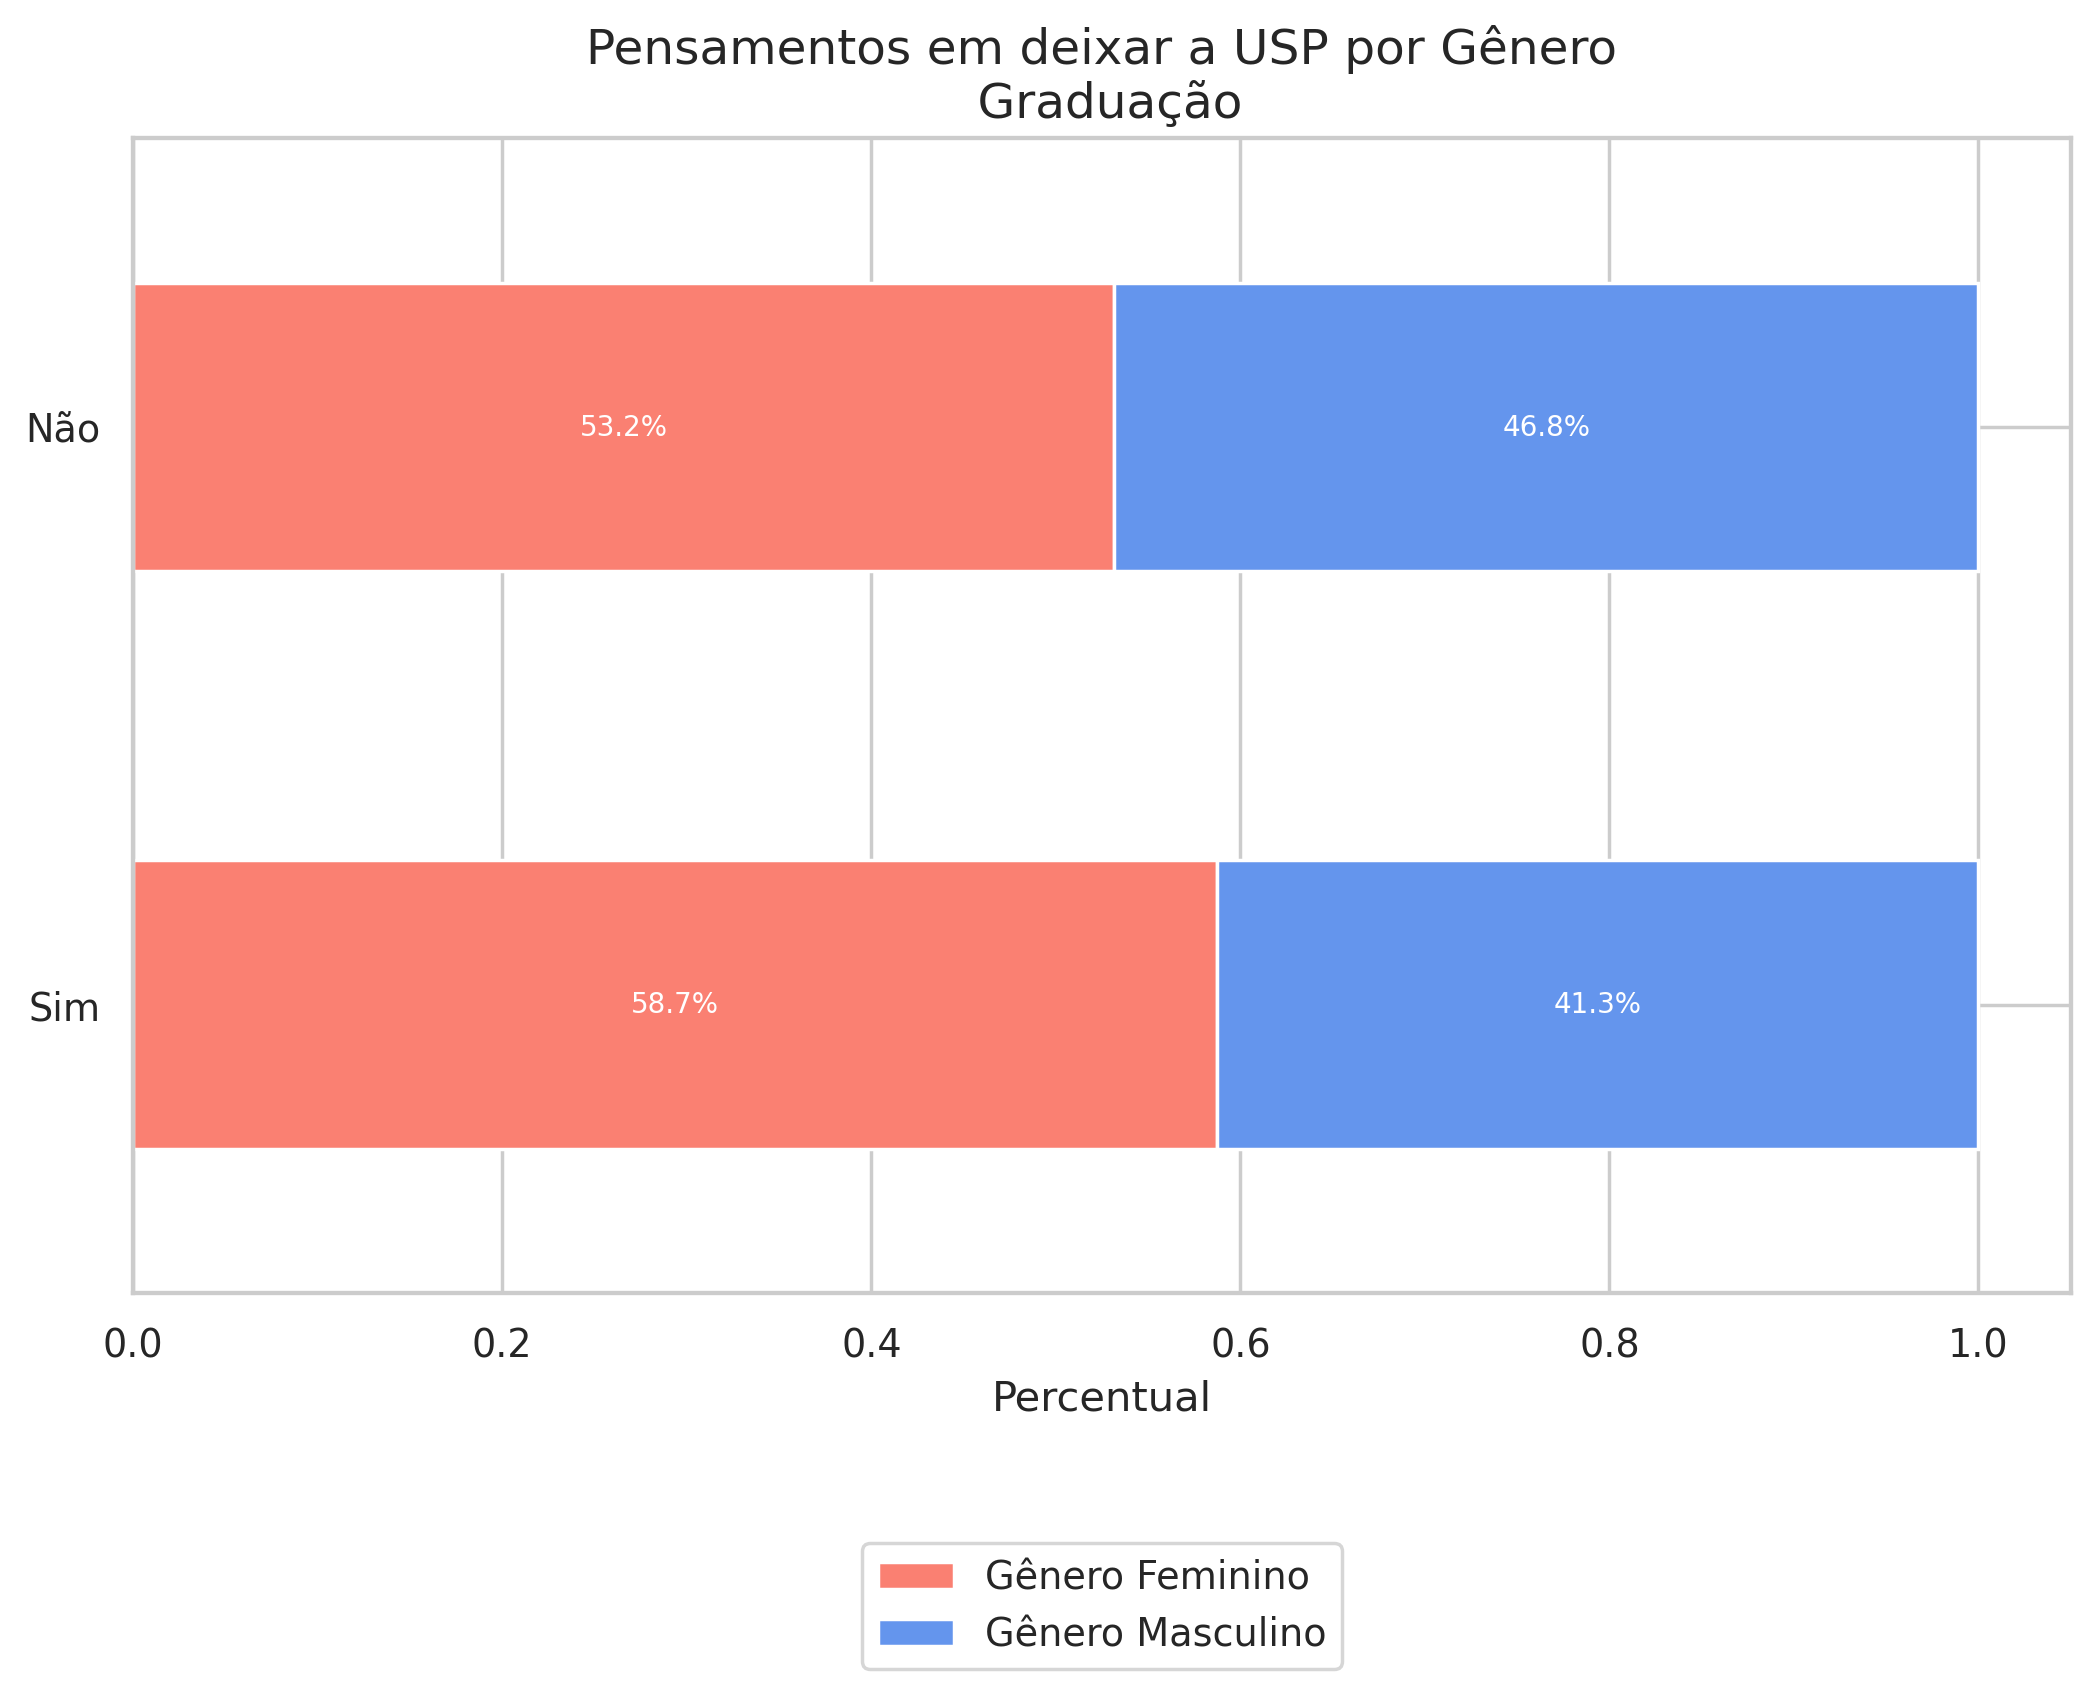

In [ ]:
tabcruzada_filtrada5 = tabcruzada_grad_a5m[tabcruzada_grad_a5m.index != "Prefiro não responder"]

ax = tabcruzada_filtrada5.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.xlabel('Percentual')
plt.title('Pensamentos em deixar a USP por Gênero\n Graduação', fontsize = 14)

ax.invert_yaxis()
for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)


ax.invert_yaxis()

ax.set_yticklabels(['Sim','Não'])
ax.set_ylabel('')
legenda = plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Em algum momento você pensou em deixar a USP?'], df_graduacao['Qual é sua identidade de gênero?'])

Qui2   p-Valor
Qual é sua identidade de gênero?  10.471106  0.005324

## Análise 24.  Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)?


In [ ]:
tabcruzada_grad_a6 = pd.crosstab(df_graduacao['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'], df_graduacao['Qual é sua identidade de gênero?'], normalize = 'index')
tabcruzada_grad_a6 = tabcruzada_grad_a6.astype(float)
tabcruzada_grad_a6 = tabcruzada_grad_a6 .reindex(index=['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])#, columns=ordem_saude_mental)

tabcruzada_grad_a6

Qual é sua identidade de gênero?                    Gênero Feminino  \
Nos últimos dois anos, você se inscreveu para a...                    
Sim, e fui contemplado                                     0.600750   
Sim, mas não fui contemplado                               0.619792   
Não                                                        0.528757   

Qual é sua identidade de gênero?                    Gênero Masculino  
Nos últimos dois anos, você se inscreveu para a...                    
Sim, e fui contemplado                                      0.399250  
Sim, mas não fui contemplado                                0.380208  
Não                                                         0.471243

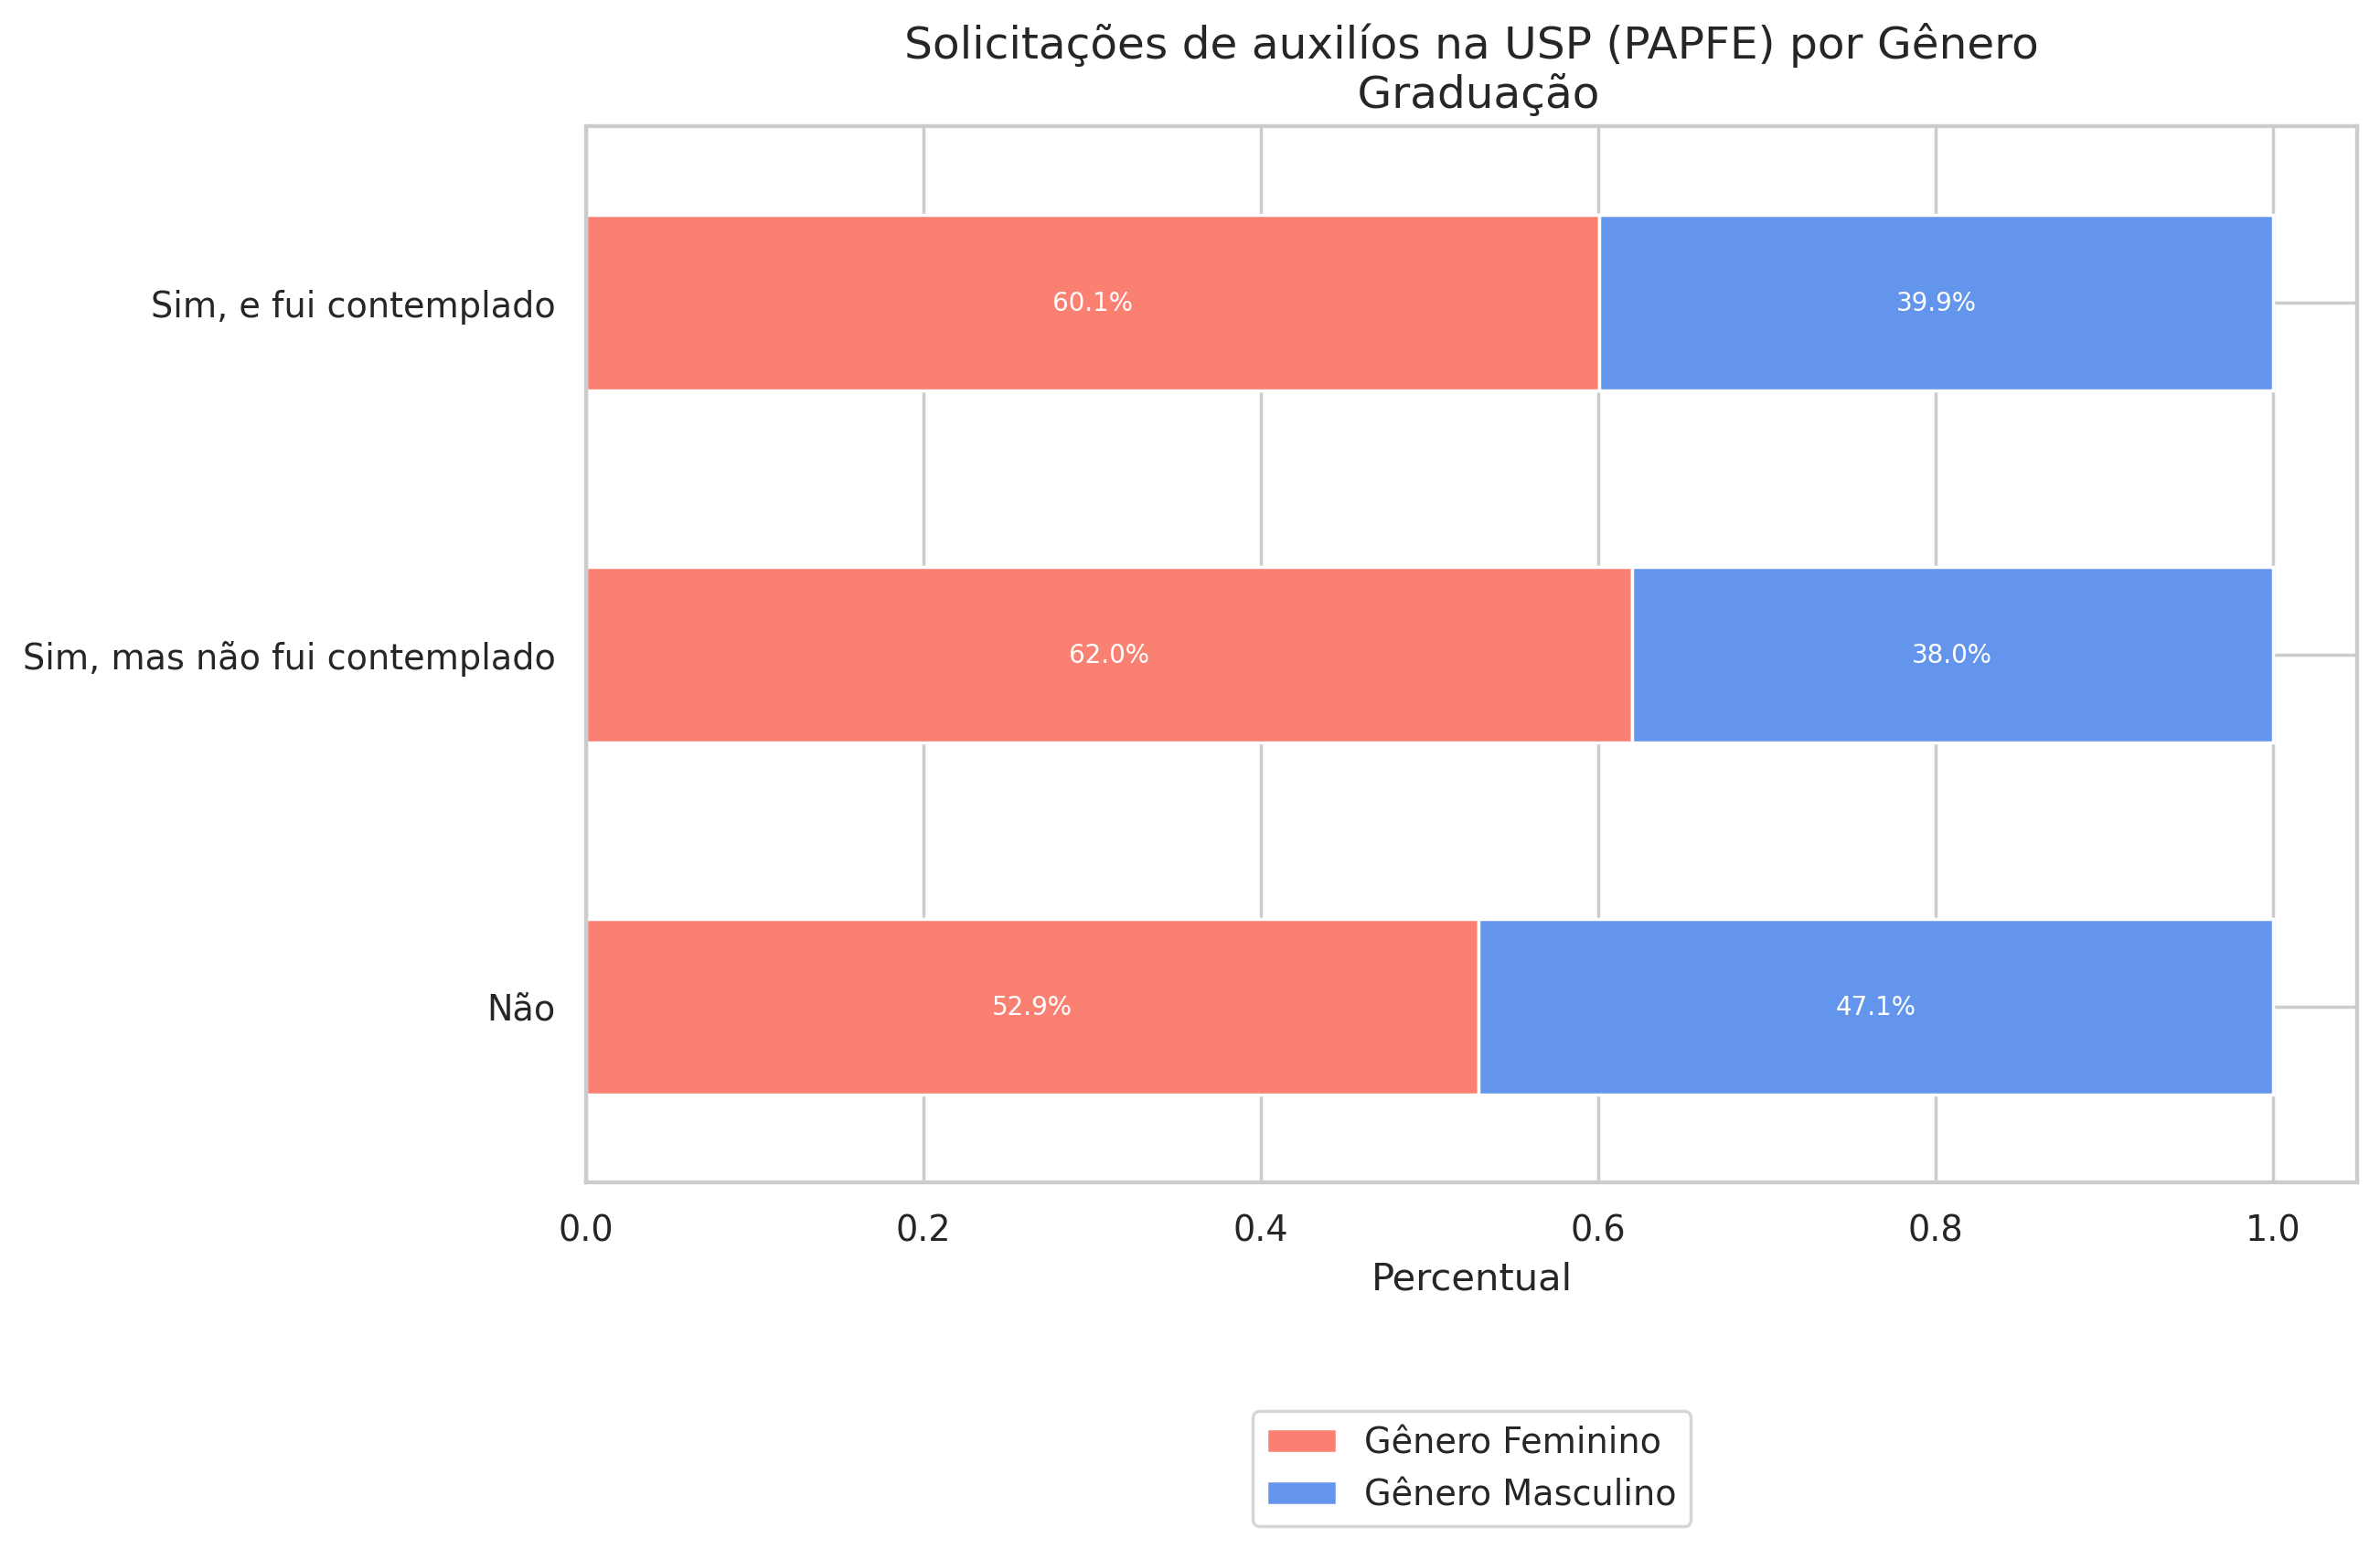

In [ ]:
tabcruzada_filtrada6 = tabcruzada_grad_a6[tabcruzada_grad_a6.index != "Prefiro não responder"]

ax = tabcruzada_filtrada6.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.xlabel('Percentual')
plt.title('Solicitações de auxilíos na USP (PAPFE) por Gênero\n Graduação', fontsize = 14)

for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)
ax.invert_yaxis()

ax.set_yticklabels(['Sim, e fui contemplado','Sim, mas não fui contemplado','Não'])
ax.set_ylabel('')
legenda = plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Nos últimos dois anos, você se inscreveu para algum auxílio na USP (PAPFE)'])

Qui2   p-Valor
Nos últimos dois anos, você se inscreveu para a...  16.366977  0.000279

## Análise 27. Raça/cor


In [ ]:
tabcruzada_grad_a11 = pd.crosstab(df_graduacao['Qual sua cor/raça (critério IBGE)'], df_graduacao['Qual é sua identidade de gênero?'])
tabcruzada_grad_a11 = tabcruzada_grad_a11.reindex(index=['preta', 'parda', 'indígena', 'amarela', 'branca'])#, columns=ordem_saude_mental)

tabcruzada_grad_a11

Qual é sua identidade de gênero?   Gênero Feminino  Gênero Masculino
Qual sua cor/raça (critério IBGE)                                   
preta                                          177               139
parda                                          356               262
indígena                                         4                 0
amarela                                         76                50
branca                                         981               793

In [ ]:
tabcruzada_grad_a11 = pd.crosstab(df_graduacao['Qual sua cor/raça (critério IBGE)'], df_graduacao['Qual é sua identidade de gênero?'], normalize = 'index')
tabcruzada_grad_a11 = tabcruzada_grad_a11.astype(float)
tabcruzada_grad_a11 = tabcruzada_grad_a11.reindex(index=['preta', 'parda', 'indígena', 'amarela', 'branca'])#, columns=ordem_saude_mental)

tabcruzada_grad_a11

Qual é sua identidade de gênero?   Gênero Feminino  Gênero Masculino
Qual sua cor/raça (critério IBGE)                                   
preta                                     0.560127          0.439873
parda                                     0.576052          0.423948
indígena                                  1.000000          0.000000
amarela                                   0.603175          0.396825
branca                                    0.552988          0.447012

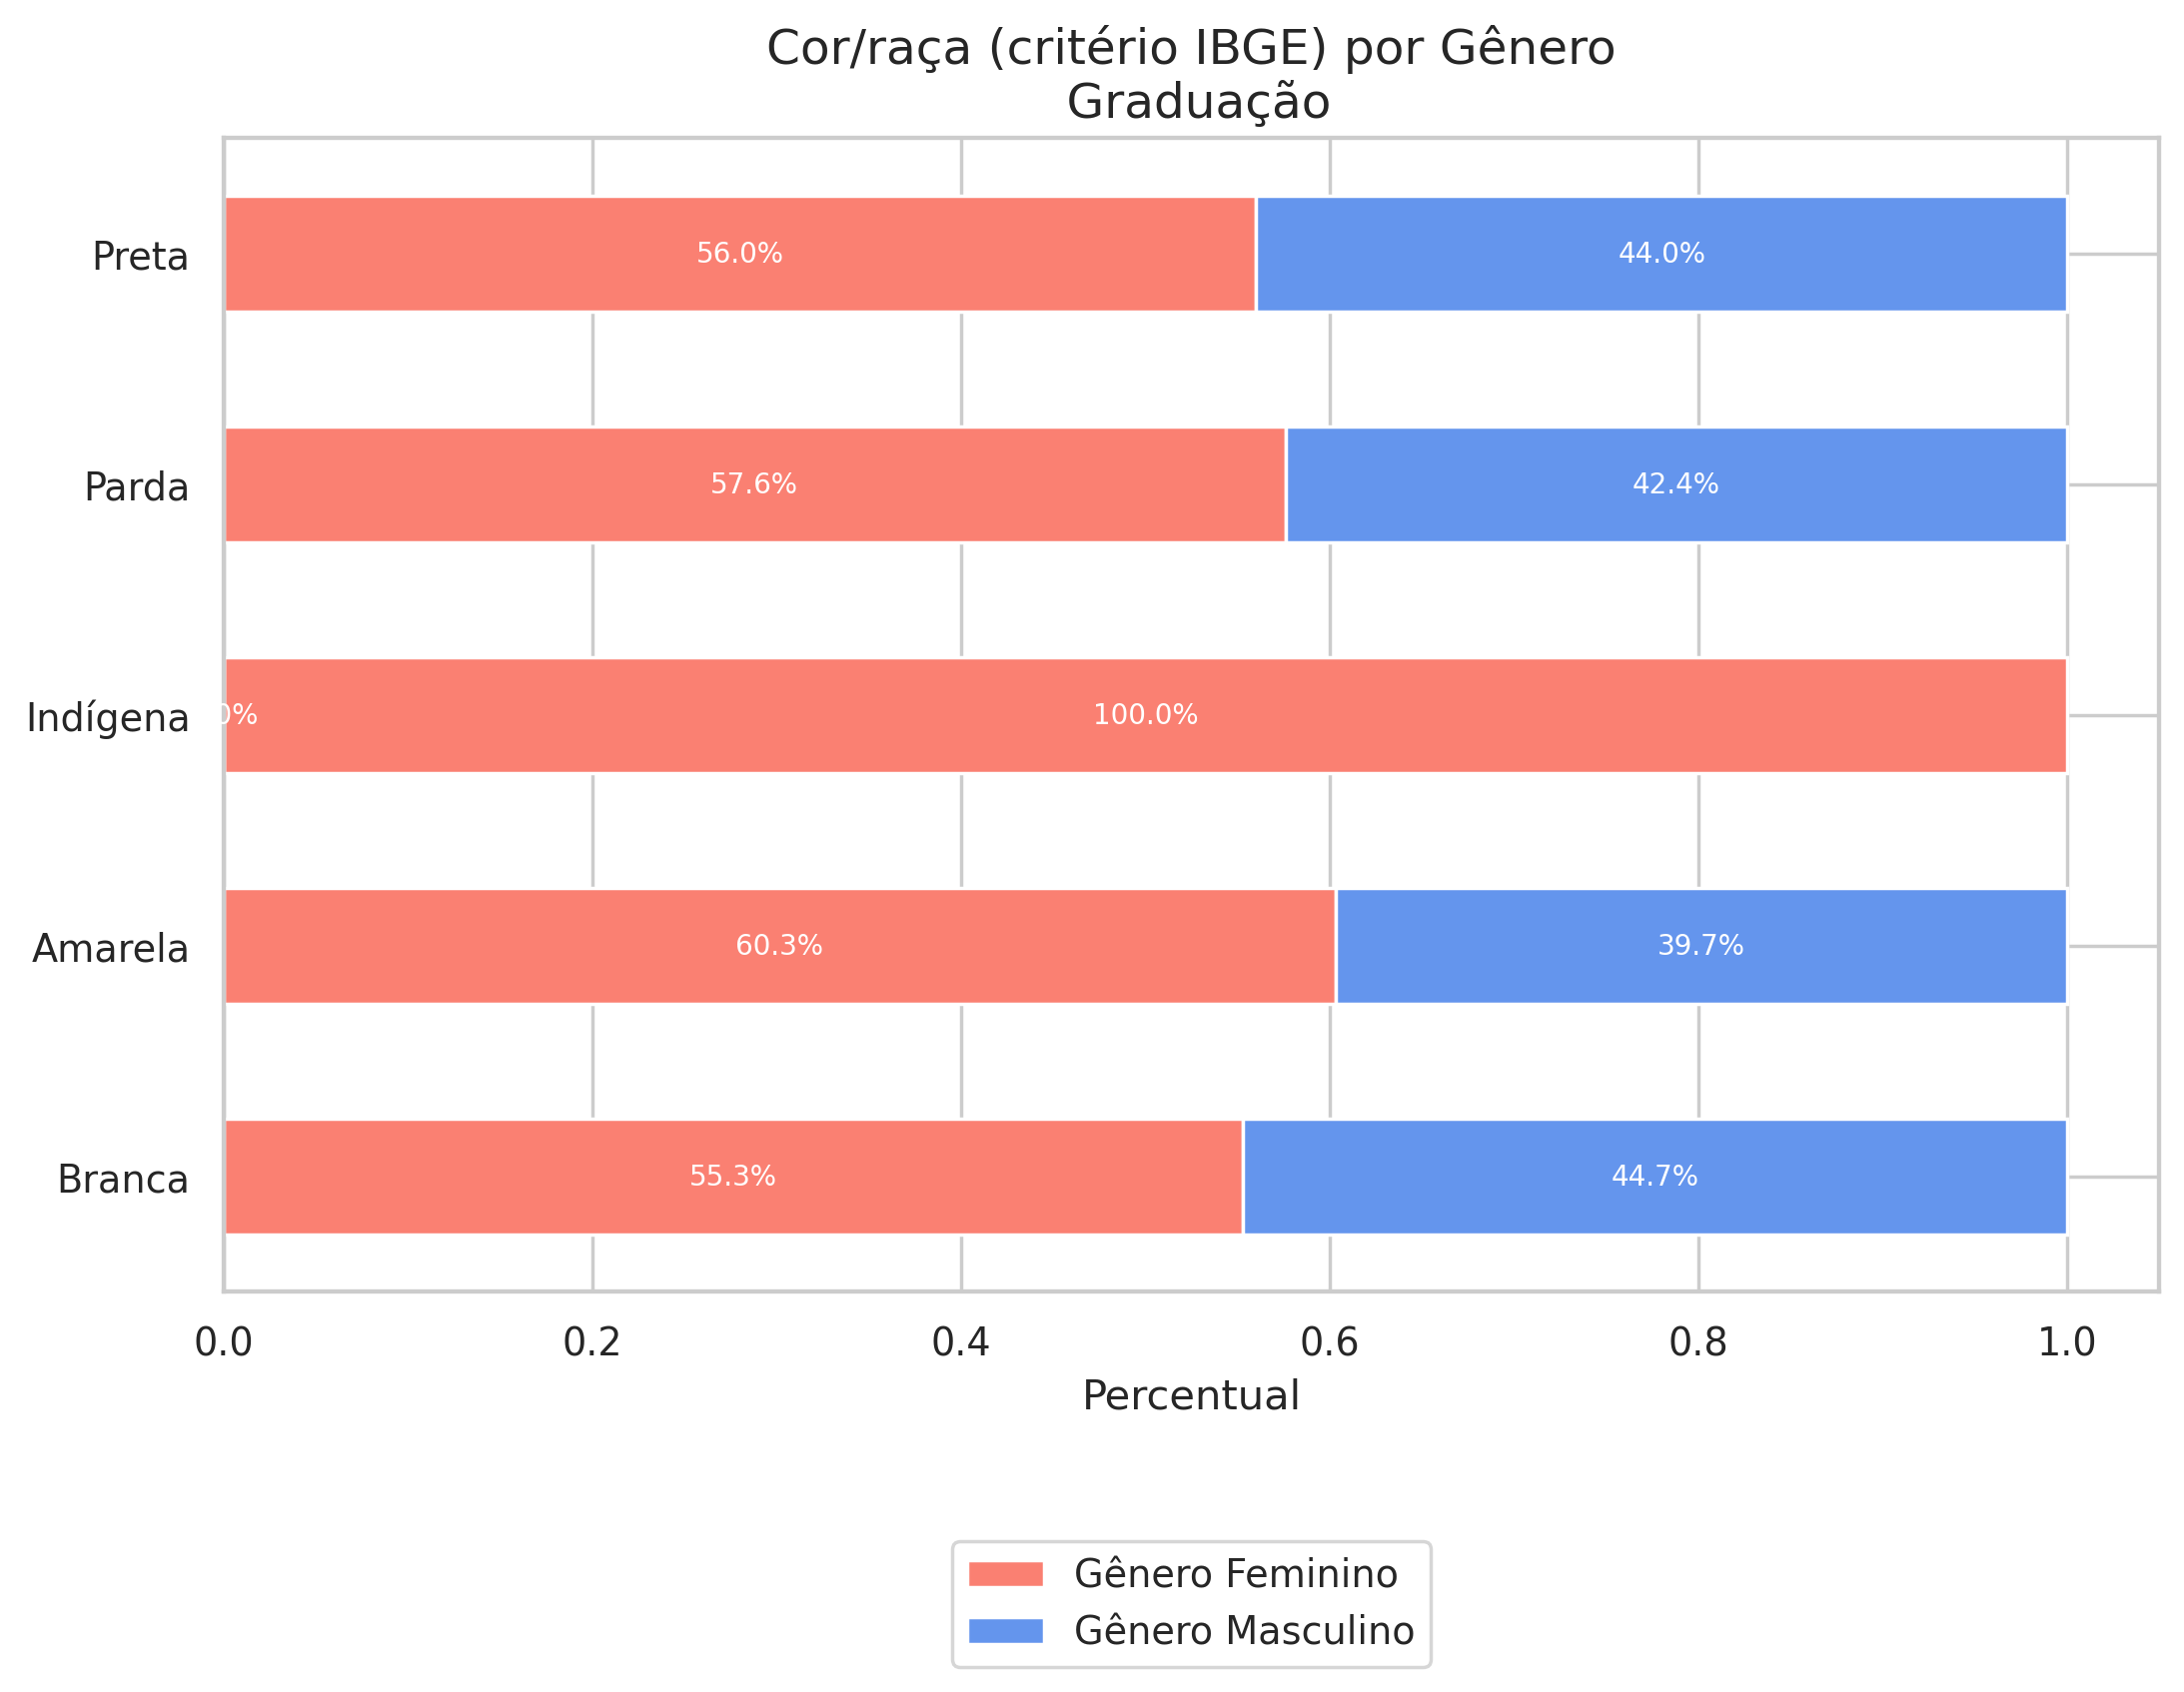

In [ ]:

tabcruzada_filtrada11 = tabcruzada_grad_a11[tabcruzada_grad_a11.index != "Prefiro não responder"]

ax = tabcruzada_filtrada11.plot(kind='barh', stacked=True, figsize=(10, 6), colormap=cmap)

plt.xlabel('Percentual')
plt.title('Cor/raça (critério IBGE) por Gênero\n Graduação', fontsize = 14)

ax.invert_yaxis()


for bars, color in zip(ax.containers[:],['White']+['White']):
    ax.bar_label(bars, label_type='center', fmt = lambda x: f"{x*100:.1f}%", color=color, fontsize=8)

ax.set_yticklabels(['Preta', 'Parda', 'Indígena', 'Amarela', 'Branca'])
ax.set_ylabel('')
legenda = plt.legend(title='', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()

In [ ]:
qui_quadrado(df_graduacao['Qual é sua identidade de gênero?'],df_graduacao['Qual sua cor/raça (critério IBGE)'])

Qui2   p-Valor
Qual sua cor/raça (critério IBGE)  7.960502  0.437338